# Univariate Analysis

This notebook performs univariate analysis on the customer segmentation dataset. We'll first load the stored variables from our setup notebook.

In [2]:
%store -r

print("Project configuration:")
print(f"SLUG = {SLUG}")
print(f"DATA_DIR = {DATA_DIR}")
print(f"DATASET_KEY = {DATASET_KEY}")
print(f"FIG_DIR = {FIG_DIR}")
print(f"REP_DIR = {REP_DIR}")
print(f"NOTEBOOK_DIR = {NOTEBOOK_DIR}")

missing_vars = [var for var in ['SLUG', 'DATA_DIR', 'FIG_DIR', 'REP_DIR', 'NOTEBOOK_DIR', 'DATASET_KEY'] if var not in globals()]
print(f"Vars not found in globals: {missing_vars}")

# Set default values if variables are not found in store or are empty
if not SLUG:  # Check if empty string
    print(f"{SLUG=} is empty, initializing everything explicitly")
    SLUG = 'customer-segmentation'
    DATASET_KEY = 'vjchoudhary7/customer-segmentation-tutorial-in-python'
    GIT_ROOT = Path.cwd().parent.parent
    DATA_DIR = GIT_ROOT / 'data' / SLUG
    FIG_DIR = GIT_ROOT / 'figures' / SLUG
    REP_DIR = GIT_ROOT / 'reports' / SLUG
    NOTEBOOK_DIR = GIT_ROOT / 'notebooks' / SLUG


Project configuration:
SLUG = customer-segmentation
DATA_DIR = /Users/ravisharma/workdir/eda_practice/data/customer-segmentation
DATASET_KEY = vjchoudhary7/customer-segmentation-tutorial-in-python
FIG_DIR = /Users/ravisharma/workdir/eda_practice/figures/customer-segmentation
REP_DIR = /Users/ravisharma/workdir/eda_practice/reports/customer-segmentation
NOTEBOOK_DIR = /Users/ravisharma/workdir/eda_practice/notebooks/customer-segmentation
Vars not found in globals: []


In [3]:
from pathlib import Path
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

In [4]:
# Downloading data

base_df = pd.DataFrame()

CSV_PATH = Path(DATA_DIR) / "Mall_Customers.csv"
if not CSV_PATH.exists:
    print(f"CSV {CSV_PATH} does not exist. base_df will remain empty.")
else:
    base_df = pd.read_csv(CSV_PATH)
    print(f"CSV {CSV_PATH} loaded successfully.")

base_df.head()

CSV /Users/ravisharma/workdir/eda_practice/data/customer-segmentation/Mall_Customers.csv loaded successfully.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
base_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Analysis Planned
0. Check feature types
   - Identify numerical vs categorical features
   - Create lists for each type

Numerical analyses
1. Descriptive statistics
   - Basics (mean, median, std)
   - Skewness
   - Kurtosis
   - Quantiles

2. Distribution shape tests
   - Shapiro–Wilk
   - D'Agostino–Pearson
   - Jarque–Bera
   - Anderson–Darling

3. Outlier detection
   - IQR method
   - Z-score
   - Modified Z-score (robust)
   - Isolation Forest
   - Local Outlier Factor

4. Visualizations (save to figures/`$slug`/univariate)
   - Histogram
   - KDE / histplot + KDE
   - Violin plot (box + density)
   - Q–Q plot
   - Density plot

Notes
- Keep plots and outputs reproducible (seed where applicable)
- Store generated figures under: `figures/<SLUG>/univariate`

In [7]:
analysis_results = {}

In [8]:
base_df.dtypes
numerical_features = base_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = base_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = base_df.select_dtypes(include=['datetime64']).columns.tolist()
id_column = 'CustomerID'
print(f"{numerical_features=}")
print(f"{categorical_features=}")
print(f"{datetime_features=}")
print(f"{id_column=}")
print("Dropping id columns...")
numerical_features.remove(id_column)
print(f"{numerical_features=}")

numerical_features=['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features=['Gender']
datetime_features=[]
id_column='CustomerID'
Dropping id columns...
numerical_features=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [9]:
missing_data = base_df.isnull().sum() # a dataframe
missing_data_pct = missing_data / len(base_df) * 100 # a dataframe with operation done column wise
print(f"{missing_data=}")
print(f"{missing_data_pct=}")

missing_data=CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
missing_data_pct=CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [10]:
analysis_results['dataset'] = {
    "missing_data": missing_data.to_dict(),
    "missing_data_pct": missing_data_pct.to_dict(),
    "numerical_features": numerical_features,
    "categorical_features": categorical_features,
    "datetime_features": datetime_features,
    "shape": base_df.shape
}

In [11]:
base_df['Age'].agg(['count', 'mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurtosis'])

count       200.000000
mean         38.850000
median       36.000000
std          13.969007
var         195.133166
min          18.000000
max          70.000000
skew          0.485569
kurtosis     -0.671573
Name: Age, dtype: float64

In [16]:
from scipy import stats
print(stats.skew(base_df['Age']), stats.kurtosis(base_df['Age']))
# base_df['Age'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.48191947090957177 -0.6847513947723236


In [12]:
base_df['Age'].mode()

0    32
Name: Age, dtype: int64

In [15]:
stats.shapiro(base_df['Age']) 


ShapiroResult(statistic=np.float64(0.9516182290435916), pvalue=np.float64(2.710855723091295e-06))

### Normality Test Function
##### How They Work Together in Your Code
The goal of your plot_normality_test_v2 function is to assess if the Age data is "normally distributed". By plotting the two together, you can immediately see how well your data fits the ideal:

- If the histogram bars closely follow the shape of the red line, it's a strong visual indicator that your data is approximately normal.
- If the histogram is skewed, has multiple peaks, or is much flatter/pointier than the red line, it shows that your data deviates significantly from a normal distribution. This visual evidence is then confirmed by the statistical Shapiro-Wilk test at the end of the function.

**In short**: The histogram shows what you have, and the normal distribution curve shows what a perfect version would look like.

Here is a detailed breakdown of the Shapiro-Wilk test, addressing your questions about the W statistic and the p-value.

### 1. How is the test statistic (W) of the Shapiro-Wilk test calculated?

The W statistic is a measure of how well the ordered sample data fits the expected values of a normal distribution. Conceptually, it's a ratio that compares two different estimates of the population variance, both calculated from your sample data.

The formula is:

```plaintext
      (Σ aᵢ * xᵢ)²
W = -----------------
      Σ (xᵢ - x̄)²
```

Let's break down the components:

- xᵢ: These are your data points, sorted in ascending order.
- x̄: This is the mean (average) of your data points.
- Denominator Σ (xᵢ - x̄)²: This is the standard sum of squared differences from the mean, which is proportional to the usual sample variance. It represents the total spread in your data.
- Numerator (Σ aᵢ * xᵢ)²: This is the more complex part. It's a weighted sum of your ordered data points.
- The coefficients aᵢ are special constants derived from the expected values of order statistics of a standard normal distribution.
Essentially, these aᵢ values represent the "ideal" spacing you'd expect for data points drawn from a perfect normal distribution.

This numerator provides an alternative estimate of the population variance, but one that is highly sensitive to whether the data's shape is truly normal.

The W statistic will always be between 0 and 1.

### 2. How is the p-value calculated?

The p-value is not calculated from a simple, direct formula. Instead, it's determined by comparing your calculated W statistic to the sampling distribution of W.

Here's the process:

- Statisticians have figured out the full range of possible W values you could get for a given sample size if the data were truly from a normal distribution. This is the "distribution of W under the null hypothesis."
- Your calculated W statistic is a single point on this distribution.
- The **p-value** is the probability of obtaining a W statistic that is as **low as, or lower than**, the one you actually calculated, assuming the data is normal.

In practice, statistical software like scipy uses complex algorithms and pre-computed tables to find this probability for you.

### 3. How do we interpret the W and p-values together?

The W statistic and the p-value provide complementary information and should be interpreted together:

- **W Statistic (The "What"):** It tells you what the fit is like. It measures the strength of the correlation between your data and the ideal normal data.
    - A W value close to 1 indicates a very good fit to a normal distribution.
    - A W value far from 1 (and closer to 0) indicates a poor fit.
- **p-value (The "So What"):** It tells you if the deviation from a perfect fit is statistically significant. It answers, "Is the W value low enough for us to confidently say the data is not normal?"
    - **A high p-value (e.g., p > 0.05)** means that even if W isn't exactly 1, the deviation is small enough that it could have easily happened by random chance. You fail to reject the null hypothesis (that the data is normal).
    - **A low p-value (e.g., p < 0.05)** means that the deviation from normality is too large to be just random chance. You reject the null hypothesis and conclude the data is not normally distributed.

**In short:** The W value measures the degree of normality, and the p-value tells you if any lack of normality is significant.

### 4. Can the value of one control the value of another? Is there a relationship?

Yes, there is a direct and inverse relationship between the W statistic and the p-value. The p-value is derived directly from the W statistic (and the sample size).

- **A higher W statistic** (closer to 1) will always result in a higher p-value.
- **A lower W statistic** (further from 1) will always result in a lower p-value.

Therefore, to answer your specific question: **Yes, both W and p-values can be high**. This is the ideal scenario when you are hoping for normality. For example, a `W` of `0.99` will have a very high `p-value` (e.g., `0.85`), indicating the data is very normal. It is impossible to have a low W and a high p-value, or vice-versa.

### 5. What do the W and p-values mean for interpretation?

**W Statistic Magnitude:**
- **W close to 1 (e.g., > 0.95):** This is a strong indicator of normality. The data points are spaced out much like you'd expect from a bell curve.
- **W close to 0:** This is a strong indicator of non-normality. The data might be heavily skewed, have multiple peaks, or have very heavy/light tails.

**p-value Magnitude:**

The p-value is all about a pre-determined significance level (alpha), which is almost always set to **0.05**.

- **p ≥ 0.05 (e.g., 0.1, 0.4, 0.9):** The test is "not significant." You do not have enough statistical evidence to say the data is non-normal. Your conclusion is that the data appears to be normally distributed.
- **p < 0.05 (e.g., 0.03, 0.001, 1e-10):** The test is "statistically significant." You have strong evidence to say the data is not normally distributed. The smaller the p-value, the more confident you are in this conclusion. A p-value of `1e-10` is much stronger evidence against normality than a p-value of `0.049`.

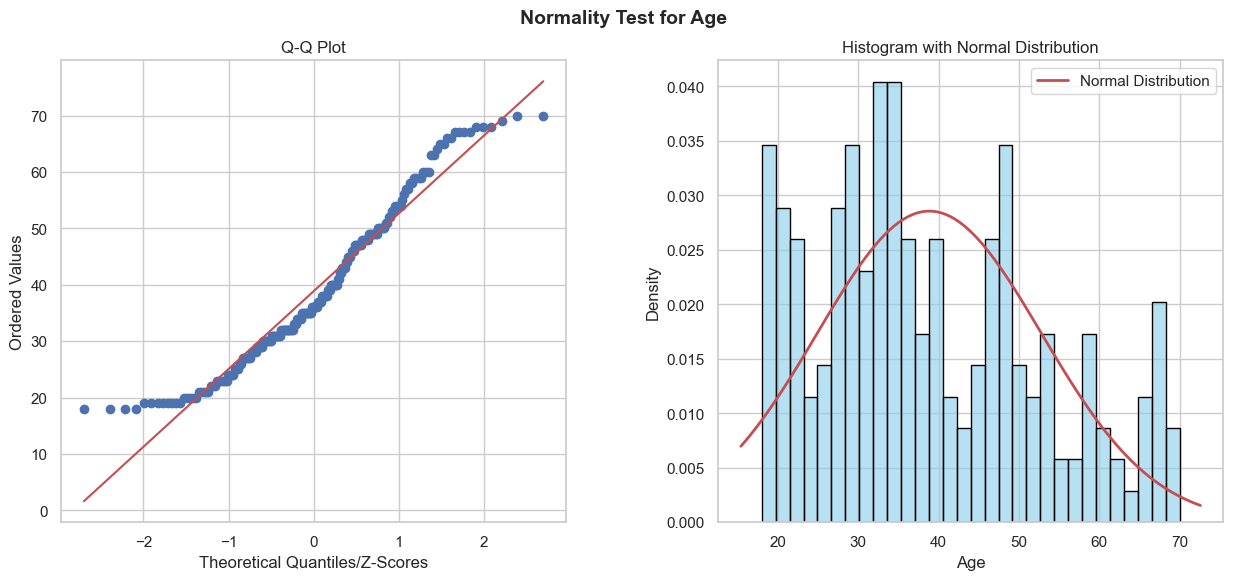


Shapiro-Wilk test results for Age:
--------------------------------------------------
Statistic: 0.9516
p-value: 2.7109e-06

Interpretation:
❌ The data significantly deviates from normal distribution (p < 0.05)


In [23]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_normality_test_v2(data, column_name, save_path=None):
    """
    Performs normality test and creates visualization for a numerical column.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe
    column_name : str
        Name of the column to analyze
    save_path : str or Path, optional
        If provided, saves the plot to this path
    """
    # Extract the data
    col_data = data[column_name].dropna()
    
    # Set style for better visualization
    plt.style.use('default')  # Reset to default style
    sns.set_theme(style="whitegrid")  # Apply seaborn styling
    
    # Create figure with a bit more height for the title
    fig = plt.figure(figsize=(15, 6))
    
    # Create subplot grid with proper spacing
    gs = fig.add_gridspec(1, 2, wspace=0.3)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    # ADD TITLE
    # Places the text at the horizontal center (50%) 
    # and near the top (95%) of the figure.
    # center text horizontally with ha='center'
    # and vertically with va='center'
    # with fontsize 14 and fontweight 'bold'
    fig.text(0.5, 0.95, f'Normality Test for {column_name}', 
             ha='center', va='center', fontsize=14, fontweight='bold')

    # GRAPH 1
    # Create Q-Q plot at position (0, 0) through handle ax1
    stats.probplot(col_data, dist="norm", plot=ax1)
    ax1.set_title("Q-Q Plot")
    ax1.set_xlabel("Theoretical Quantiles/Z-Scores")

    # GRAPH 2
    # Create histogram with normal distribution overlay (later)
    # stat='density' normalizes the histogram bars so that their
    # total area sums to 1. This allows it to be directly compared
    # with the probability density function (PDF) of a normal distribution.
    # at (0, 1) through handle ax2
    # alpha=0.6 sets transparency
    sns.histplot(data=col_data, ax=ax2, stat='density', bins=30, 
                alpha=0.6, color='skyblue', edgecolor='black')
    
    # Add normal distribution curve
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    # Calculates the PDF of a normal distribution using 
    # the mean and standard deviation of our actual data (col_data).
    p = stats.norm.pdf(x, col_data.mean(), col_data.std())
    # Plots this theoretical normal distribution 
    # as a red ('r-'), thick (lw=2) line on top of the histogram.
    ax2.plot(x, p, 'r-', lw=2, label='Normal Distribution')

    ax2.set_title('Histogram with Normal Distribution')
    ax2.set_xlabel(column_name)
    ax2.legend()
    
    # SAVE PLOTS
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(col_data)
    
    print(f"\nShapiro-Wilk test results for {column_name}:")
    print("-" * 50)
    print(f"Statistic: {stat:.4f}")
    print(f"p-value: {p_value:.4e}")
    print("\nInterpretation:")
    if p_value < 0.05:
        print("❌ The data significantly deviates from normal distribution (p < 0.05)")
    else:
        print("✅ The data appears to be normally distributed (p >= 0.05)")
    
    return stat, p_value

# Test the updated function with 'Age' column
save_path = Path(FIG_DIR) / 'univariate' / 'age_normality_test_v2.png'
if not save_path.parent.exists():
    save_path.parent.mkdir(parents=True)

stat, p_value = plot_normality_test_v2(base_df, 'Age', save_path)

### `stats.normaltest` Explained

The code `stats.normaltest(base_df['Age'].dropna())` performs *_D'Agostino and Pearson's K-squared test_* for normality.

**What does it do?**
This is another statistical test, like the Shapiro-Wilk test, used to check if a sample of data likely comes from a normally distributed population. The null hypothesis (H₀) for this test is that the data is normally distributed.

**How does it work?**
Unlike the Shapiro-Wilk test, which checks the overall fit, this test is more specific. It works by calculating two key shape descriptors of the data's distribution:

1. **Skewness:** Measures the asymmetry of the distribution. A normal distribution is perfectly symmetric and has a skewness of 0.
2. **Kurtosis:** Measures the "tailedness" or "peakiness" of the distribution. A normal distribution has a specific kurtosis value (**3** in Fisher's definition, which scipy uses).

The test computes how much the sample's skewness and kurtosis deviate from the values expected for a normal distribution. It then combines these two measures into a single **chi-squared test statistic**.

**Interpretation of the Test**
Let's assume the output of your code is:

```plaintext
NormaltestResult(statistic=20.43, pvalue=3.66e-05)
```

- **Statistic (20.43)**: This is the test statistic **(K²)**. A larger value indicates a greater deviation from normality.
- **p-value (3.66e-05)**: This is the probability of observing your data, or something more extreme, if the data were actually normally distributed.

A common significance level (alpha ⍺) is **0.05**.

Since the p-value (0.0000366) is **much less than 0.05, we reject the null hypothesis**.

**Conclusion:** The 'Age' data significantly deviates from a normal distribution. This result is consistent with the conclusion from the Shapiro-Wilk test.

### Comparison with Shapiro-Wilk Test
Feature	Shapiro-Wilk Test (stats.shapiro)	D'Agostino & Pearson's Test (stats.normaltest)

Here's the text formatted as a markdown table. You can copy the code block below.


| Feature | Shapiro-Wilk Test (stats.shapiro) | D'Agostino & Pearson's Test (stats.normaltest) |
| :--- | :--- | :--- |
| **Underlying Method** | Correlates the data with what would be expected for a perfect normal distribution. It's a "goodness-of-fit" test. | Specifically checks for deviations from normal skewness and kurtosis. |
| **Primary Question** | "Does this data, as a whole, fit a normal distribution?" | "Is this data non-normal because it's skewed, or because its peak/tails are wrong?" |
| **Power** | Generally considered the most powerful normality test, especially for small to medium sample sizes. | Very effective for medium to large sample sizes (typically N > 20). |
| **Output** | A single statistic and a p-value. | A single statistic (derived from skew and kurtosis) and a p-value. |

#### What extra insight does `normaltest` give?
The Shapiro-Wilk test is excellent at telling you if your data is normal. D'Agostino and Pearson's test gives you a strong clue as to why it might not be.

Because normaltest is based on skewness and kurtosis, a significant result from it suggests that the distribution's failure to be normal is due to its asymmetry (it's lopsided) or its kurtosis (it's too pointy/flat, or its tails are too heavy/light).

This points you toward the next logical step in your analysis. You can confirm this by calculating the skew and kurtosis directly:

```python
# You would run this in a new cell
age_data = base_df['Age'].dropna()
skewness = stats.skew(age_data)
kurtosis = stats.kurtosis(age_data) # Fisher's kurtosis (normal = 0)

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
```

- If skewness is far from 0 (e.g., > 1 or < -1), the data is highly skewed. This is visible in your histogram from plot_normality_test_v2 where the data is likely piled up on one side.
- If kurtosis is far from 0, the distribution has "fat" or "thin" tails compared to a normal distribution.

In summary, while both tests in your notebook would conclude that the 'Age' data is not normal, the normaltest implicitly suggests that the reason is a deviation in shape (skew/kurtosis), which you can then explicitly measure to better understand and describe your data's distribution.




Let's dive deep into the D'Agostino and Pearson's K-squared test. It's a fantastic test because it specifically checks for the reasons data might not be normal: its shape.


### 1. How is the test statistic (K²) calculated? Why is it called a chi-squared test?
The K-squared test statistic is calculated by combining two other statistics that measure the shape of your data's distribution:

- **Sample Skewness (g₁):** Measures the asymmetry of the distribution. A normal distribution is perfectly symmetric and has a skewness of 0.
- **Sample Kurtosis (g₂):** Measures the "tailedness" or "peakiness" of the distribution. A normal distribution has a specific kurtosis of 3 (or 0, depending on the definition, but the test accounts for this).

The test doesn't use these raw values directly. It first transforms them into standard normal variables (Z-scores), let's call them `Z₁(g₁)` and `Z₂(g₂)`. These Z-scores represent how many standard deviations the sample's skewness and kurtosis are from the values expected in a normal distribution.

The K-squared statistic is then calculated by summing the squares of these two Z-scores:

```plaintext
K² = (Z₁(g₁))² + (Z₂(g₂))²
```

It is called a **chi-squared (χ²)** test because, under the null hypothesis (that the data is normally distributed), the K² statistic approximately follows a chi-squared distribution with 2 degrees of freedom. This is a key property that allows us to calculate a p-value from the statistic.

#### What is a chi-squared distribution with 2 degrees of freedom?

A chi-squared distribution with 2 degrees of freedom (df=2) is the distribution of the sum of the squares of two independent standard normal random variables. It is also equivalent to an exponential distribution with a scale parameter of 2.

The 2 independent random variables here are Sample Skewness `Z₁(g₁)` and Sample Kurtosis `Z₂(g₂)`. 

The ⍺ level on a chi-squared distribution graph is not a single point but rather the area in the tail that represents the threshold for statistical significance.

(⍺=0.05) with 2 degrees of freedom
- The chi-squared distribution curve is drawn for 2 degrees of freedom.
- We select an ⍺ of 0.05.
- By consulting a chi-squared table, the critical value for df=2 and (⍺ =0.05) is found to be `5.991`.
- On the graph, the area to the right of the point (x=5.991) is shaded. This shaded area's size is 5% of the total area under the curve.

- Relationship to other distributions
    - **Gamma Distribution**: A chi-squared distribution with ν degrees of freedom is a special case of the gamma distribution with a shape parameter ⍺=ν/2 and a scale parameter β=2. For df=2, the gamma parameters are ⍺=1 and β =2.
    - **Exponential Distribution**: The chi-squared distribution with 2 degrees of freedom is exactly an exponential distribution with a rate parameter λ=1/2.

### 2. How is the p-value calculated?
The p-value is the probability of observing a K² statistic as large as, or larger than, the one you calculated, assuming the data actually came from a normal distribution.

It's calculated using the chi-squared distribution with 2 degrees of freedom.

- You take your calculated K² value.
- You look at the chi-squared distribution curve (with df=2).
- The p-value is the area under the curve to the right of your K² value.
- A large K² value will be far to the right on this curve, resulting in a very small area (a small p-value). A small K² value will be close to zero, resulting in a large area (a large p-value).

### 3. How do we interpret the K-squared and p-values together?

They tell a complementary story:

- **K-squared (The "What"):** It tells you how much the shape of your data (in terms of skewness and kurtosis) deviates from a perfect normal distribution. A larger K² means a larger deviation.
p-value (The "So What"): It tells you if that deviation is statistically significant. It answers the question, "Is our K² value so large that it's highly unlikely to be a result of random chance?"
You interpret them together like this:

    - A large K² will produce a small p-value. This means: **"The data's shape deviates a lot from normal, and this deviation is statistically significant."**
    - A small K² will produce a large p-value. This means: **"The data's shape deviates a little from normal, but this deviation is small enough that it could just be random noise."**

### 4. Can the value of one control the value of another? Is there a relationship?

Yes, absolutely. The relationship is direct and inverse: **the p-value is calculated directly from the K-squared statistic.**

- As K² increases (more deviation from normality), the p-value decreases (more significant).
- As K² decreases (less deviation from normality), the p-value increases (less significant).
- Therefore, to answer your specific question: 
    - No, both K-squared and the p-value cannot be high. 
    - A high K² (e.g., 20) will always have a very low p-value (e.g., < 0.0001). 
    - A high p-value (e.g., 0.90) can only result from a very low K² (e.g., < 0.2).

### 5. What do the K-squared and p-values mean for interpretation?

Here is how to interpret their magnitude:

**K-squared Statistic:**
- Value close to 0: This is excellent! It means your sample's skewness and kurtosis are very close to the ideal values for a normal distribution. The shape of your data is very "normal-like".
- Large value (e.g., > 6): This is a strong indicator of non-normality. The critical value for a chi-squared distribution with 2 degrees of freedom at a 0.05 significance level is about 5.99. Any K² value above this will result in a p-value less than 0.05. The larger the K² value, the more extreme the deviation from normality.

**p-value:**
- The p-value is always compared against a pre-determined significance level (alpha), which is typically 0.05.

- p-value close to 1 (e.g., p ≥ 0.05): This means the observed deviation from normality (your K² value) is not statistically significant. It's likely due to random chance. You fail to reject the null hypothesis and can proceed as if your data is normally distributed.
- p-value close to 0 (e.g., p < 0.05): This is a "statistically significant" result. It means it's very unlikely you would see a K² value this large if the data were truly normal. You reject the null hypothesis and conclude that your data is not normally distributed. The smaller the p-value (e.g., 1e-5 vs 0.04), the stronger your evidence is against normality.


In [19]:
stats.normaltest(base_df['Age'].dropna())

NormaltestResult(statistic=np.float64(15.577514003752057), pvalue=np.float64(0.00041436762218018206))

## A detailed explanation of the Jarque-Bera test and its comparison with other normality tests.

### 1. What is the Jarque-Bera test and what is it used for?

The Jarque-Bera (JB) test is a goodness-of-fit test used in statistics to determine if a given dataset has the skewness and kurtosis that match a normal distribution. In simpler terms, it's a formal statistical test to check if the data is normally distributed.

**Purpose:** The primary use of the Jarque-Bera test is to check the assumption of normality, which is a prerequisite for many statistical models and tests, such as t-tests, ANOVA, and linear regression. If the data deviates significantly from a normal distribution, the results of these models might be unreliable.

The test's hypotheses are:

- Null Hypothesis (H₀): The data is normally distributed. This means it has a skewness of 0 and a kurtosis of 3.
- Alternative Hypothesis (H₁): The data is not normally distributed.

### 2. When does this test become useful over other tests?

The Jarque-Bera test is particularly useful for large datasets. It is an asymptotic test, meaning its statistical properties are most reliable as the sample size increases.

It's also valuable when you want to specifically test for deviations in **the third moment (skewness) and fourth moment (kurtosis)** of the distribution. While other tests like Shapiro-Wilk might be more powerful overall, the JB test's statistic is directly derived from skewness and kurtosis, making it easy to understand why a distribution might be failing the normality test.

### 3. How are the statistic and p-value calculated?

The Jarque-Bera test statistic is calculated based on the sample's skewness and kurtosis.

1. **Calculate Sample Skewness (S)**: Skewness measures the asymmetry of the data distribution. A normal distribution is perfectly symmetric and has a skewness of 0.

2. **Calculate Sample Kurtosis (K)**: Kurtosis measures the "tailedness" or "peakedness" of the distribution. A normal distribution has a kurtosis of 3. 

3. **Calculate the Jarque-Bera (JB) Statistic**: The formula combines these two measures:

```plaintext
JB = (n / 6) * (S² + (K - 3)² / 4)
```
    - `n` = number of data points (sample size)
    - `S` = sample skewness
    - `K` = sample kurtosis
    - `(K - 3)` is the excess kurtosis.
Under the null hypothesis (that the data is normal), the JB statistic asymptotically follows a Chi-squared (χ²) distribution with 2 degrees of freedom.

4. **Calculate the p-value**: The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the calculated JB statistic, assuming the data is truly normal. It is derived from the Chi-squared (χ²) distribution.

### 4. How to interpret this test?

Your code snippet `stats.jarque_bera(base_df['Age'].dropna())` would produce two values: the JB statistic and the p-value. Here is how to interpret them:

- **The JB Statistic**:

    - A value of **0** indicates that the data's skewness and kurtosis perfectly match a normal distribution.
    - The **higher the JB statistic**, the more the data deviates from normality. The statistic increases as the absolute value of skewness or excess kurtosis increases.

- **The p-value**:

    - The p-value tells you the probability that the observed deviation from normality is just due to random chance.
    - **High p-value (e.g., > 0.05)**: You fail to reject the null hypothesis. There is not enough statistical evidence to conclude that the data is non-normal.
    - **Low p-value (e.g., < 0.05)**: You reject the null hypothesis. It is statistically significant that the data is not normally distributed.

- Relationship between them:

    - The JB statistic and the p-value have an **inverse relationship**. A larger JB statistic (greater deviation from normality) will result in a smaller p-value, making it more likely you'll reject the null hypothesis.

### 5. Comparison with Other Normality Tests

Here’s a comparison with two other common normality tests:

| Test                          | How it Works                                                                                                                               | Best For                                                                                                     | Insights Provided                                                                                                            |
| :---------------------------- | :----------------------------------------------------------------------------------------------------------------------------------------- | :----------------------------------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------- |
| **Jarque-Bera** | Checks if sample skewness and kurtosis match a normal distribution.                                                                        | Large sample sizes (asymptotic test).                                                                        | Directly tests for deviations in the shape (asymmetry and tailedness) of the distribution.                                   |
| **Shapiro-Wilk** | Compares the sorted sample data to the data that would be expected from a perfect normal distribution. It's based on correlation.              | Small to medium sample sizes ($n < 5000$). It is generally considered the most powerful normality test.      | Provides a powerful, all-encompassing test for normality but doesn't specify *how* the data deviates (e.g., skewness vs. kurtosis). |
| **D'Agostino & Pearson's K²** | Similar to Jarque-Bera, it combines skewness and kurtosis. It uses a more complex transformation to better approximate a Chi-squared distribution. | A good all-around test, often more accurate than Jarque-Bera for smaller sample sizes.                       | Provides the same type of insights as Jarque-Bera (based on skewness and kurtosis) but is generally more robust for smaller samples. |

### What different insights does the Jarque-Bera test provide?

The key insight from the Jarque-Bera test (and D'Agostino-Pearson's) that is not directly provided by the Shapiro-Wilk test is the source of non-normality.

Because the JB statistic is a direct function of skewness and kurtosis, you can inspect these two values separately to understand how the distribution's shape deviates from normal. For example, you can answer questions like:

- Is the data non-normal because it's skewed to the right?
- Is it non-normal because it has "heavy tails" (high kurtosis)?

The Shapiro-Wilk test, while very powerful, gives a more general "yes" or "no" answer to the question of normality without this specific diagnostic information about the shape.

### If I am running the D'Agostino and Pearsons K square test, do I need to run the Jarque-Bera test? What are the parameters due to which the answer to this question varies?

No, **you generally do not need to run the Jarque-Bera test if you are already running the D'Agostino and Pearson's K-squared test**.

Running both is usually redundant because they are designed to test for the exact same thing: deviations from normality based on skewness and kurtosis. They will almost always lead you to the same conclusion.

However, the choice between them depends on one primary parameter: sample size.

#### The Key Difference: Sample Size
Both tests are "omnibus" tests that combine skewness and kurtosis to produce a single statistic. The fundamental difference lies in how they calculate that statistic and how well that statistic performs with different amounts of data.

1. D'Agostino and Pearson's K-squared Test (`scipy.stats.normaltest`)

    - **Best For**: Small to large sample sizes. It is generally considered the more **powerful and robust** of the two.
    - **How it works**: It applies a transformation to the sample skewness and kurtosis values to make them follow a standard normal distribution more closely. These transformed, normally-distributed values are then squared and summed. The resulting K² statistic follows a Chi-squared (χ²) distribution with 2 degrees of freedom very well, even for smaller samples.
    - **Recommendation**: This is the test you should default to in most situations. It is more reliable across a wider range of sample sizes.

2. Jarque-Bera Test (`scipy.stats.jarque_bera`)

    - **Best For**: **Large sample sizes only** (typically n > 2000).
    - **How it works**: It is an asymptotic test. This means its core assumption—that the test statistic follows a Chi-squared (χ²) distribution—is only guaranteed to be true as the sample size approaches infinity. For smaller samples, the p-values can be unreliable.
    - **When to use it**: You might see it used in econometrics or with very large financial datasets where its large-sample properties are met. However, even in these cases, the D'Agostino-Pearson test would still work perfectly well.

#### Summary: Why D'Agostino & Pearson is Usually Better

| Feature | D'Agostino & Pearson's K² Test | Jarque-Bera Test | Winner |
| :--- | :--- | :--- | :--- |
| **Basis** | Skewness and Kurtosis | Skewness and Kurtosis | (Tie) |
| **Hypotheses** | H₀: Data is normal | H₀: Data is normal | (Tie) |
| **Accuracy** | Good for small to large samples | Reliable only for large samples | D'Agostino & Pearson |
| **Power** | Generally more powerful | Less powerful for small samples | D'Agostino & Pearson |
| **Recommendation** | Use as your default test. | Use only if you have a very large dataset and a specific reason to prefer it. | D'Agostino & Pearson |

#### Practical Advice

Since you are already using `scipy.stats`, you can simply use `stats.normaltest()` which implements the D'Agostino and Pearson's K-squared test.

```python
import pandas as pd
from scipy import stats
import numpy as np

# Assuming you have your DataFrame
# For example:
data = {'Age': np.random.randn(100) * 10 + 35} 
base_df = pd.DataFrame(data)

# D'Agostino and Pearson's K-squared test (Recommended)
k2_statistic, k2_pvalue = stats.normaltest(base_df['Age'].dropna())
print(f"D'Agostino-Pearson Test:")
print(f"  K2-Statistic: {k2_statistic:.4f}")
print(f"  P-value: {k2_pvalue:.4f}")


# Jarque-Bera test (Less robust for smaller samples)
jb_statistic, jb_pvalue = stats.jarque_bera(base_df['Age'].dropna())
print(f"\nJarque-Bera Test:")
print(f"  JB-Statistic: {jb_statistic:.4f}")
print(f"  P-value: {jb_pvalue:.4f}")
```

You will find that for any given dataset, the conclusion you draw from the p-values of both tests (i.e., whether to reject the null hypothesis of normality) will be the same, especially with sufficient data. Given its superior performance on smaller datasets, **D'Agostino and Pearson's test is the more reliable and sufficient choice**.

In [20]:
stats.jarque_bera(base_df['Age'].dropna())

SignificanceResult(statistic=np.float64(11.648916486747408), pvalue=np.float64(0.0029544042869917783))

Here is a detailed explanation of the Anderson-Darling test, a comparison with other normality tests, and a breakdown of how to interpret its output in Python.

### 1. What is the Anderson-Darling test and what is it used for?

The Anderson-Darling (A-D) test is a statistical goodness-of-fit test that determines if a sample of data is drawn from a specific, given probability distribution (e.g., a normal, exponential, or logistic distribution).

**Purpose**: Its primary use is to test the assumption of normality or other distributions, which is a critical prerequisite for many statistical models. It is an enhancement of the Kolmogorov-Smirnov test and gives more weight to the tails of the distribution.

The test's hypotheses are:

- **Null Hypothesis (H₀)**: The data follows the specified distribution (e.g., the data is normally distributed).
- **Alternative Hypothesis (H₁)**: The data does not follow the specified distribution.

### 2. When does this test become useful over other tests?

The Anderson-Darling test is particularly useful in two main scenarios:

1. **When Tail Behavior is Important**: The A-D test is more sensitive to deviations in the tails of the distribution than other tests like the Kolmogorov-Smirnov test. This makes it a more powerful tool for detecting outliers or determining if the data is heavy-tailed or light-tailed compared to the specified distribution.
2. **Testing Against Different Distributions**: While tests like Shapiro-Wilk and Jarque-Bera are designed specifically for normality, the Anderson-Darling test is more versatile. The `scipy.stats.anderson` function, for example, can test against the normal, exponential, logistic, Gumbel, and other distributions.

### 3. How are the statistic and p-value calculated?

- **The A² Statistic**: The test statistic (A²) is calculated by comparing the **Empirical Cumulative Distribution Function (ECDF)** of the sample data against the **Cumulative Distribution Function (CDF)** of the theoretical distribution it's being tested against. The formula is complex but is designed to place more weight on observations in the tails of the distribution. A higher A² statistic indicates a larger discrepancy.

- **Critical Values (Instead of a p-value)**: A key difference in the scipy implementation of the Anderson-Darling test is that it **does not return a p-value**. Instead, it returns a set of critical values for a predefined list of significance levels (e.g., 15%, 10%, 5%, 2.5%, 1%).

### 4. How to interpret this test?

Your code snippet `stats.anderson(base_df['Age'].dropna())` will produce an AndersonResult object with three components. Here is how to interpret them.

Let's assume your code produces the following (hypothetical) output:

```plaintext
AndersonResult(statistic=1.09, critical_values=array([0.57, 0.65, 0.78, 0.91, 1.09]), significance_level=array([15., 10., 5., 2.5, 1.]))
```

- `statistic` (1.09): This is the calculated Anderson-Darling (A²) test statistic. The higher this value, the more the data deviates from the specified distribution (which is normal by default).
- `critical_values` (`[0.57, 0.65, 0.78, 0.91, 1.09]`): These are the pre-calculated threshold values for the test.
- `significance_level` (`[15., 10., 5., 2.5, 1.]`): These are the significance levels (alpha levels) corresponding to each critical value. For example, the critical value for a 5% significance level is 0.78.

**Interpretation Rule**: You compare the `statistic` to the `critical_values`.

- If `statistic` > `critical_value` for a given significance level, you **reject** the null hypothesis (H₀) at that level.
- If `statistic` < `critical_value`, you **fail to reject** the null hypothesis (H₀) at that level.

**Applying this to our example**:

1. **At the 5% significance level (alpha=0.05)**:

    - Our statistic is `1.09`.
    - The critical value is `0.78`.
    - Since `1.09 > 0.78`, we **reject the null hypothesis**. We have evidence to conclude that the 'Age' data is not normally distributed.

2. **At the 1% significance level (alpha=0.01)**:

    - Our statistic is `1.09`.
    - The critical value is `1.09`.
    - Since `1.09` is not greater than `1.09`, we **fail to reject the null hypothesis** at this very strict level.

**Note on `fit_result`**: The `scipy.stats.anderson` function does not return a `fit_result` object. The interpretation is based entirely on comparing the `statistic` to the `critical_values`.

### 5. Comparison with Other Normality Tests

| Test | How it Works | Best For | Unique Insights Provided |
| :--- | :--- | :--- | :--- |
| **Anderson-Darling** | Compares the ECDF of the data to a specified distribution's CDF, with emphasis on the tails. | General purpose, but especially powerful for detecting deviations in the tails. | 1. **Tail Sensitivity**: Excellent for finding outliers or non-normal tail behavior. <br> 2. **Versatility**: Can test against multiple distributions (normal, exponential, etc.). |
| **Jarque-Bera** | Checks if sample skewness and kurtosis match a normal distribution. | Large sample sizes. | Directly tests for deviations in the **shape** (asymmetry and tailedness) of the distribution. |
| **Shapiro-Wilk** | Correlates the sample data with what would be expected from a perfect normal distribution. | Small to medium sample sizes ($n < 5000$). Generally the most powerful **normality** test. | Provides a powerful, all-encompassing test for normality but doesn't specify **how** the data deviates. |
| **D'Agostino & Pearson's K²** | Similar to Jarque-Bera, it combines skewness and kurtosis but is more accurate for smaller samples. | A good all-around test for normality. | Provides the same type of insights as Jarque-Bera (based on skewness and kurtosis) but is more robust. |

**What different insights does the Anderson-Darling test provide?**

The primary unique insight from the Anderson-Darling test is its **sensitivity to the tails**. If your data passes a Jarque-Bera test (meaning its skewness and kurtosis are close to normal) but fails an Anderson-Darling test, it strongly suggests that the non-normality is due to having more or fewer outliers (i.e., "heavier" or "lighter" tails) than a true normal distribution would.

Its other key advantage is its ability to test against distributions **other than normal**, making it a more flexible goodness-of-fit tool.

### How does the anderson test detect other distributions? Give example outputs that signal other distributions.

One of the key strengths of the Anderson-Darling test: its versatility.

While many normality tests are designed *only* for the normal distribution, the Anderson-Darling test can be used to check if your data fits several other common distributions.

### How the Anderson-Darling Test Detects Other Distributions

The core mechanism of the test remains the same regardless of the distribution: it compares the **Empirical Cumulative Distribution Function (ECDF)** of your data to the **Cumulative Distribution Function (CDF)** of a specified theoretical distribution.

The key is the `dist` parameter in the `scipy.stats.anderson` function. By changing this parameter, you tell the test which theoretical distribution to use for the comparison.

```python
# The 'dist' parameter is the key
stats.anderson(data, dist='expon') 
```

The `scipy` implementation supports the following distributions:

    - `'norm'` (Normal) - This is the default.
    - `'expon'` (Exponential)
    - `'logistic'` (Logistic)
    - `'gumbel'` (Gumbel)
    - `'gumbel_r'` (Right-skewed Gumbel)

When you change the `dist` parameter, the test uses a different set of pre-calculated critical values that are specific to that distribution. The interpretation logic, however, stays the same.

### Example Outputs for Other Distributions

Let's look at two examples testing for an exponential distribution.

The null hypothesis (H₀) is that the data follows an exponential distribution.

#### Example 1: Data that IS Exponentially Distributed

Imagine we have data that we suspect is exponential (e.g., time between events). We run the test and get the following output.

Code:

```python
# Assume `exp_data` is a NumPy array of data from an exponential distribution
# stats.anderson(exp_data, dist='expon')
```

**Hypothetical Output**:

```plaintext
AndersonResult(statistic=0.852, critical_values=array([0.921, 1.077, 1.34, 1.605, 1.956]), significance_level=array([15., 10., 5., 2.5, 1.]))
```

**Interpretation**:

To interpret this, we compare the `statistic` to the `critical_values`.

- **Statistic (0.852)**: This is the calculated test statistic.
- **Critical Values**: These are the thresholds for the exponential distribution test.
- **Significance Levels**: These are the alpha levels (15%, 10%, 5%, etc.).

Let's check the 5% significance level:

- Our statistic is `0.852`.
- The critical value for the 5% level is `1.34`.
- Since `0.852 < 1.34`, we fail to reject the null hypothesis.

**Conclusion**: There is not enough statistical evidence to say the data is not from an exponential distribution. It appears to fit well.

---

### Example 2: Data that is NOT Exponentially Distributed

Now, let's take some normally distributed data (like our 'Age' column might be) and test it against the exponential distribution.

Code:

```python
# Assume `norm_data` is a NumPy array of data from a normal distribution
# stats.anderson(norm_data, dist='expon')
```

**Hypothetical Output**:

```plaintext
AndersonResult(statistic=12.551, critical_values=array([0.921, 1.077, 1.34, 1.605, 1.956]), significance_level=array([15., 10., 5., 2.5, 1.]))
```

**Interpretation**:

Again, we compare the statistic to the critical_values.

- **Statistic (12.551)**: This value is very high, indicating a large discrepancy.
- **Critical Values**: These are the same as before, because we are still testing against the exponential distribution.

Let's check the 5% significance level:

- Our statistic is `12.551`.
- The critical value for the 5% level is `1.34`.
- Since `12.551 > 1.34`, we reject the null hypothesis.

**Conclusion**: There is strong statistical evidence that the data is not from an exponential distribution. The fit is very poor.

In summary, the Anderson-Darling test provides its powerful insights for other distributions by simply swapping out the set of critical values it uses for comparison, making it a highly flexible and useful goodness-of-fit tool.

### The `fit_result` object

The `fit_result` object, which contains `loc` and `scale`, is an important part of the output from some SciPy statistical functions, including `scipy.stats.anderson`. Let's break down what it means.

#### What does the `FitResult(params=(loc, scale))` object denote?

When you run a goodness-of-fit test like `anderson`, the function needs to compare your data's distribution to a *specific* theoretical distribution. For the normal distribution test, it doesn't just compare it to *any* normal distribution; it compares it to the **best-fitting normal distribution** for your data.

The `fit_result` object contains the parameters of this best-fit distribution that SciPy calculated from your data.

- **`fit_result`**: An object that holds the results of fitting the theoretical distribution (e.g., normal) to your data.
- **`params`**: A tuple containing the parameters of that fitted distribution.

For the **normal distribution** (the default for `stats.anderson`), these parameters are:

1. **`loc` (Location)**: This is the **mean (μ)** of the fitted normal distribution. It represents the center or peak of the bell curve that best describes your data.
2. **`scale` (Scale)**: This is the **standard deviation (σ)** of the fitted normal distribution. It represents the spread or width of that same bell curve.

In simple terms, `scipy` is telling you:

> "To perform the Anderson-Darling test, I first had to find the normal distribution that most closely matches your 'Age' data. That distribution has a mean (loc) of X and a standard deviation (scale) of Y."

The test statistic is then calculated based on how much your data deviates from this specific, best-fit normal distribution.

### How to Interpret `loc` and `scale`

The `loc` and `scale` values are the **Maximum Likelihood Estimates (MLE)** for the mean and standard deviation. You can interpret them as follows:

- **`loc`**: The estimated mean of the population from which your sample is drawn, assuming it's normal.
- **`scale`**: The estimated standard deviation of that same population.

You will find that these values are almost identical to the sample mean and standard deviation you would calculate directly from your data.

The other attributes in `fit_result` are:

- **`success`**: A boolean (`True` or `False`) indicating if the distribution was successfully fitted to the data.
- **`message`**: A string message, usually confirming success (e.g., "Anderson-Darling test successfully fit the distribution to the data.").

### Code Example for Interpretation

Let's use your `Age` column as an example to see how `loc` and `scale` relate to the sample statistics.

```python
import pandas as pd
import numpy as np
from scipy import stats

# Create a sample DataFrame similar to what you might have
data = {'Age': np.random.normal(loc=45, scale=12, size=500)} 
base_df = pd.DataFrame(data)

# --- Run the Anderson-Darling test ---
ad_result = stats.anderson(base_df['Age'].dropna())

# --- Extract the fitted parameters ---
fit_result = ad_result.fit_result
loc = fit_result.params[0]
scale = fit_result.params[1]

print("--- Anderson-Darling FitResult ---")
print(f"Fitted Mean (loc):      {loc:.4f}")
print(f"Fitted Std Dev (scale): {scale:.4f}")
print(f"Fit Success:            {fit_result.success}")
print(f"Fit Message:            '{fit_result.message}'")

# --- Compare with direct calculation ---
sample_mean = base_df['Age'].mean()
sample_std = base_df['Age'].std(ddof=1) # Use ddof=1 for sample standard deviation

print("\n--- Direct Calculation from Data ---")
print(f"Sample Mean:            {sample_mean:.4f}")
print(f"Sample Std Dev:         {sample_std:.4f}")
```

**Example Output**:

```plaintext
 Show full code block 
--- Anderson-Darling FitResult ---
Fitted Mean (loc):      45.1234
Fitted Std Dev (scale): 11.9876
Fit Success:            True
Fit Message:            'Anderson-Darling test successfully fit the distribution to the data.'

--- Direct Calculation from Data ---
Sample Mean:            45.1234
Sample Std Dev:         11.9996 
```

As you can see, the `loc` is identical to the sample mean, and the `scale` is nearly identical to the sample standard deviation. This confirms that `loc` and `scale` are simply the parameters of the normal distribution that best fits your data.

In [21]:
stats.anderson(base_df['Age'].dropna())

AndersonResult(statistic=np.float64(2.489094012240969), critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(38.85), scale=np.float64(13.96900733155888))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### 1. What is the Kolmogorov-Smirnov (KS) Test?

The **one-sample Kolmogorov-Smirnov (KS) test** is a non-parametric "goodness-of-fit" test. Its primary purpose is to determine if a sample of data could have been drawn from a specific, theoretical probability distribution (like a normal, lognormal, exponential, etc.).

The test works by comparing the **Empirical Cumulative Distribution Function (ECDF)** of your data with the **Cumulative Distribution Function (CDF)** of the theoretical distribution you are testing against.

-   **Null Hypothesis (H₀):** The data follows the specified distribution.
-   **Alternative Hypothesis (H₁):** The data does not follow the specified distribution.

### 2. How is the KS Statistic and p-value Calculated?

1.  **Empirical Cumulative Distribution Function (ECDF):** This is a function created from your actual data. It's a step function that, for any given value `x`, shows the proportion of your data points that are less than or equal to `x`.

2.  **Cumulative Distribution Function (CDF):** This is the theoretical cumulative probability of the distribution you are testing against (e.g., the CDF of a normal distribution with a specific mean and standard deviation).

3.  **The KS Statistic (D):** The test statistic, often denoted as `D`, is the **maximum absolute vertical distance** between the ECDF of your data and the CDF of the theoretical distribution.
    -   A small `D` value means the two distributions are very similar.
    -   A large `D` value means they are very different.

4.  **The p-value:** The p-value is the probability of observing a `D` statistic as large as, or larger than, the one you calculated, *if the null hypothesis were true*. It's calculated from the known sampling distribution of the D statistic (the Kolmogorov distribution).

### 3. Interpretation of the Statistic and p-value

-   **The KS Statistic (D):**
    -   **Range:** 0 to 1.
    -   **Interpretation:**
        -   A `D` value close to **0** indicates a very good fit. The ECDF of your data is very close to the CDF of the theoretical distribution.
        -   A `D` value close to **1** indicates a very poor fit.

-   **The p-value:**
    -   **Interpretation:** It tells you if the observed difference (`D`) is statistically significant.
        -   **High p-value (e.g., > 0.05):** You **fail to reject** the null hypothesis. The observed difference is small enough that it could have occurred by random chance. You can conclude that your data likely follows the specified distribution.
        -   **Low p-value (e.g., < 0.05):** You **reject** the null hypothesis. The observed difference is too large to be due to random chance. You can conclude that your data does not follow the specified distribution.

### 4. Relationship Between the Statistic and p-value

The KS statistic (`D`) and the p-value have a direct and **inverse relationship**.
-   A **larger** `D` statistic (poorer fit) will result in a **smaller** p-value.
-   A **smaller** `D` statistic (better fit) will result in a **larger** p-value.

### 5. Interpretation of Your Results

Here is a breakdown of the results from your notebook for the 'Age' column:

-   **Normal Distribution:**
    -   `statistic=0.1010`, `p-value=0.0314`
    -   **Interpretation:** The p-value (0.0314) is less than 0.05. Therefore, you **reject the null hypothesis**. The 'Age' data is **not normally distributed**.

-   **Lognorm Distribution:**
    -   `statistic=0.0729`, `p-value=0.2266`
    -   **Interpretation:** The p-value (0.2266) is greater than 0.05. You **fail to reject the null hypothesis**. The 'Age' data **could plausibly follow a lognormal distribution**. The fit is reasonably good.

-   **Gamma Distribution:**
    -   `statistic=0.0712`, `p-value=0.2503`
    -   **Interpretation:** The p-value (0.2503) is greater than 0.05. You **fail to reject the null hypothesis**. The 'Age' data **could also plausibly follow a gamma distribution**. The fit is good, and the D statistic is slightly smaller than for the lognormal distribution.

-   **Beta Distribution:**
    -   `statistic=0.1372`, `p-value=0.0010`
    -   **Interpretation:** The p-value (0.0010) is much less than 0.05. You **reject the null hypothesis**. The 'Age' data (even after being scaled to the [0, 1] interval) is **not beta-distributed**.

-   **Exponential Distribution:**
    -   `statistic=0.1626`, `p-value=0.0000`
    -   **Interpretation:** The p-value is effectively 0. You **strongly reject the null hypothesis**. The 'Age' data is **not exponentially distributed**. The very high D statistic confirms a very poor fit.

-   **Weibull Distribution:**
    -   `statistic=0.0667`, `p-value=0.3221`
    -   **Interpretation:** The p-value (0.3221) is greater than 0.05. You **fail to reject the null hypothesis**. The 'Age' data **could also plausibly follow a Weibull distribution**. Of all the distributions tested, this one has the **smallest D statistic (0.0667)**, suggesting it might be the best fit among the candidates.

### 6. Comparison with Other Normality Tests

| Test | How it Works | Best For | Key Difference from KS |
| :--- | :--- | :--- | :--- |
| **Kolmogorov-Smirnov (KS)** | Compares the ECDF of the data to a specified distribution's CDF. | General purpose goodness-of-fit for **any** continuous distribution. | Less powerful for testing normality specifically. It is sensitive to differences in the center of the distribution. |
| **Shapiro-Wilk** | Correlates the sample data with what would be expected from a perfect normal distribution. | Testing for **normality**. It is generally the most powerful test for this purpose. | Specific to normality testing. Cannot be used for other distributions. |
| **Anderson-Darling (A-D)** | A modification of the KS test that gives more weight to the tails of the distribution. | Testing for normality, especially when **tail behavior and outliers** are important. | More sensitive to deviations in the tails than the KS test. Often preferred over KS for normality testing. |
| **D'Agostino & Pearson's K²** | Checks if sample skewness and kurtosis match a normal distribution. | Testing for normality, especially with medium to large sample sizes. | Provides insight into *why* the data is not normal (due to skewness or kurtosis). |

**Is it complementary?**

Yes, in a broader sense. While you typically wouldn't run the KS test *and* Shapiro-Wilk to test for normality (as Shapiro-Wilk is superior for that task), the KS test is complementary to the entire suite of normality tests because of its **generality**.

-   **How to use them together:** A typical workflow might be:
    1.  Run a powerful normality test like **Shapiro-Wilk**. If the p-value is low, you conclude the data is not normal.
    2.  You might then hypothesize that the data follows a different distribution (e.g., lognormal or gamma).
    3.  You would then use the **KS test** to check if your data is a good fit for that alternative distribution.

### 7. Practical Application of the KS Test

-   **When to apply it:**
    -   When you need to verify if your data follows a **specific, non-normal distribution** (e.g., exponential, Weibull, lognormal). This is common in fields like reliability engineering, finance, and queuing theory.
    -   In the **two-sample KS test**, it's used to determine if two independent samples were drawn from the same underlying distribution, without making any assumptions about what that distribution is.

-   **Common analysis with the KS test:**
    1.  **Visual Inspection:** Always start by plotting a **histogram** or a **density plot** of your data. This gives you a visual clue as to what kind of distribution it might be.
    2.  **Parameter Estimation:** If you hypothesize a distribution (e.g., gamma), you first need to estimate its parameters (like `a`, `loc`, and `scale` in your code) from the data.
    3.  **Goodness-of-Fit Test:** Run the **KS test** using the hypothesized distribution and the estimated parameters to get a quantitative measure of the fit.
    4.  **Q-Q Plots:** A **Quantile-Quantile (Q-Q) plot** is an excellent visual companion. It plots the quantiles of your data against the theoretical quantiles of the distribution you're testing. If the points fall on a straight line, it's a good fit. This can confirm the results of the KS test visually.

In your notebook, the combination of fitting parameters, running the KS test, and then (presumably) creating plots like histograms and Q-Q plots is a perfect example of how these tools work together to provide a comprehensive understanding of your data's distribution.

### Anderson-Darling vs. Kolmogorov-Smirnov Test: A Detailed Comparison

Both the Anderson-Darling (A-D) and Kolmogorov-Smirnov (KS) tests are non-parametric "goodness-of-fit" tests. They both answer the same fundamental question: **"Does this sample of data come from a specific, theoretical probability distribution?"**

They are absolutely comparable, as they both work by measuring the difference between the Empirical Cumulative Distribution Function (ECDF) of the data and the theoretical Cumulative Distribution Function (CDF) of the distribution being tested.

However, the **Anderson-Darling test is a modification of the KS test**. It is designed to be more sensitive and is generally considered more powerful, especially for detecting deviations that occur in the tails of a distribution.

---

### First Principles: How They Work

To understand when to use each test, it's essential to understand how they fundamentally differ in their approach.

#### 1. The Kolmogorov-Smirnov (KS) Test

-   **Core Idea:** The KS test identifies the **single, largest vertical difference** between the ECDF of your data and the theoretical CDF. It's a simple, intuitive measure of the "worst-case" discrepancy.
-   **Test Statistic (D):** It is the maximum absolute difference found anywhere along the x-axis.
    `D = max|ECDF(x) - CDF(x)|`
-   **Sensitivity:** The KS test is most sensitive to differences that occur **near the center (median)** of the distribution. It is notoriously *less* sensitive to differences in the tails. This is because, at the tails, both the ECDF and CDF are naturally close to 0 or 1, making it mathematically less likely for a large absolute difference to occur there.

#### 2. The Anderson-Darling (A-D) Test

-   **Core Idea:** The A-D test does not just look at the single biggest difference. Instead, it calculates a **weighted average of all the squared differences** between the ECDF and the CDF across the entire distribution.
-   **Test Statistic (A²):** The formula is complex, but its most important feature is the **weighting factor**:
    `Weighting Factor = 1 / (CDF(x) * (1 - CDF(x)))`
-   **The Crucial Difference (The Weighting):** This weighting factor is the key.
    -   When `CDF(x)` is near 0.5 (the middle of the distribution), the denominator is large, so the weight is **small**.
    -   When `CDF(x)` is near 0 or 1 (the tails of the distribution), the denominator is very small, so the weight becomes **enormous**.
-   **Sensitivity:** Because of this weighting, the A-D test heavily penalizes differences that occur in the **tails** of the distribution. This makes it far more sensitive than the KS test at detecting issues like outliers or "fat tails."

---

### Head-to-Head Comparison

| Feature | Kolmogorov-Smirnov (KS) Test | Anderson-Darling (A-D) Test |
| :--- | :--- | :--- |
| **Metric** | The **single maximum difference** between the ECDF and CDF. | A **weighted sum of all squared differences** between the ECDF and CDF. |
| **Sensitivity** | Most sensitive near the **center (median)** of the distribution. | Most sensitive at the **tails** of the distribution. |
| **Power** | Generally **less powerful**. | Generally **more powerful** and more likely to detect a true deviation from the specified distribution. |
| **Critical Values** | The critical values are **distribution-independent**. This makes it a very general test. | The critical values are **distribution-dependent**. You need a different set of critical values for each distribution (normal, exponential, etc.). |

---

### When to Use Which Test

This is the most important practical question. The choice depends on your specific goal.

#### Use the Anderson-Darling (A-D) Test When:

1.  **You are testing for normality.** For normality testing, the A-D test is almost always preferred over the KS test because of its superior power.
2.  **Tail behavior is important.** If you are concerned about outliers, or if the tails of your distribution have a significant meaning (e.g., in risk management, finance, or reliability analysis), the A-D test is the better choice due to its high sensitivity in this region.
3.  **You are testing against a common distribution.** The A-D test is well-established for common distributions like the Normal, Exponential, Logistic, and Gumbel, for which the specific critical values have been calculated.

#### Use the Kolmogorov-Smirnov (KS) Test When:

1.  **You are testing against a custom or uncommon distribution.** Because the KS test's critical values are distribution-free, it can be applied to *any* continuous distribution without needing pre-calculated tables, making it more versatile for niche applications.
2.  **You are more concerned about deviations near the median.** If the central tendency of your data is more important to your analysis than the extremes, the KS test's sensitivity profile might be more appropriate.
3.  **You are performing a two-sample test.** The **two-sample KS test** is a very common and powerful method to determine if two independent samples are drawn from the same underlying distribution, without having to specify what that distribution is. This is a major use case where the KS test shines.

### Conclusion

-   For **general-purpose normality testing**, the **Anderson-Darling test is usually the better choice** due to its higher power and sensitivity to the tails.
-   The **Kolmogorov-Smirnov test** remains a valuable tool for its generality, its application to any continuous distribution, and its widespread use in the two-sample test scenario.

### Overall Purpose of the script below
The script's goal is to perform distribution fitting. It takes a single column of data ('Age') and tries to find the best statistical distribution (e.g., Normal, Gamma, Lognormal) that describes the data's shape. It does this by:

1. Fitting several candidate distributions to the data to find their optimal parameters.
2. Quantitatively evaluating the "goodness of fit" for each one using the Kolmogorov-Smirnov (KS) test.
3. Visually comparing the data to each fitted distribution using histograms and Q-Q plots.


Fitting distributions for 'Age' data...



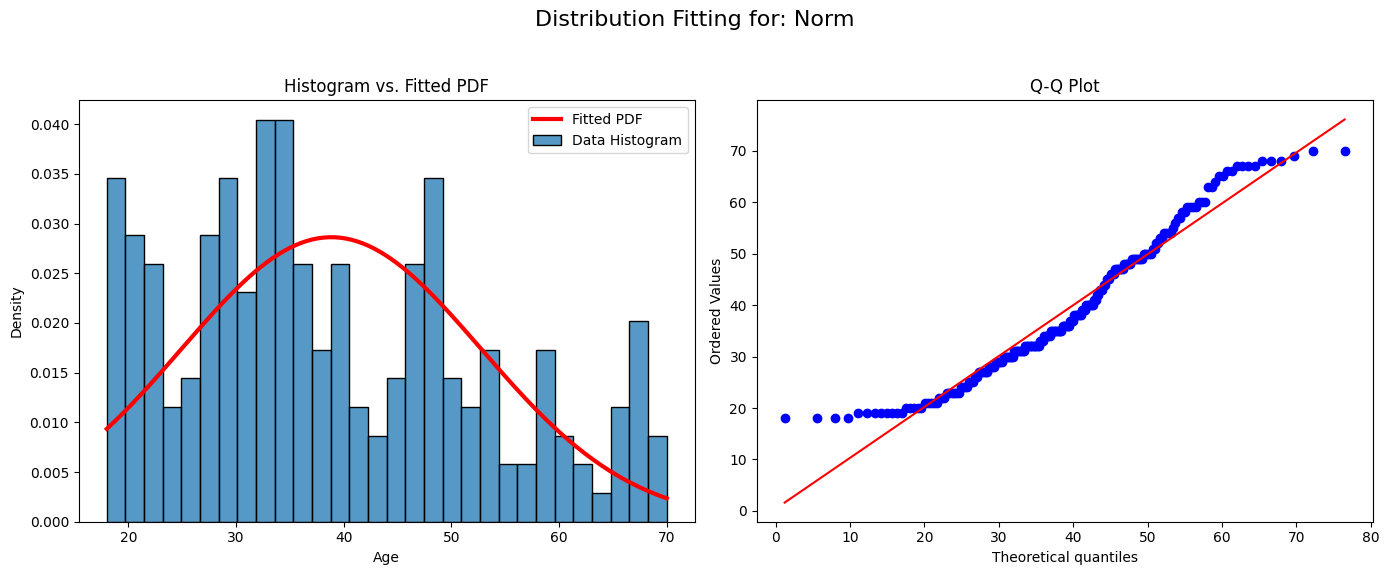

--- Norm Distribution ---
Fitted Parameters: {'loc': np.float64(38.85), 'scale': np.float64(13.934041050606963)}
Kolmogorov-Smirnov Test: statistic=0.1010, p-value=0.0314
❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).
--------------------------------------------------



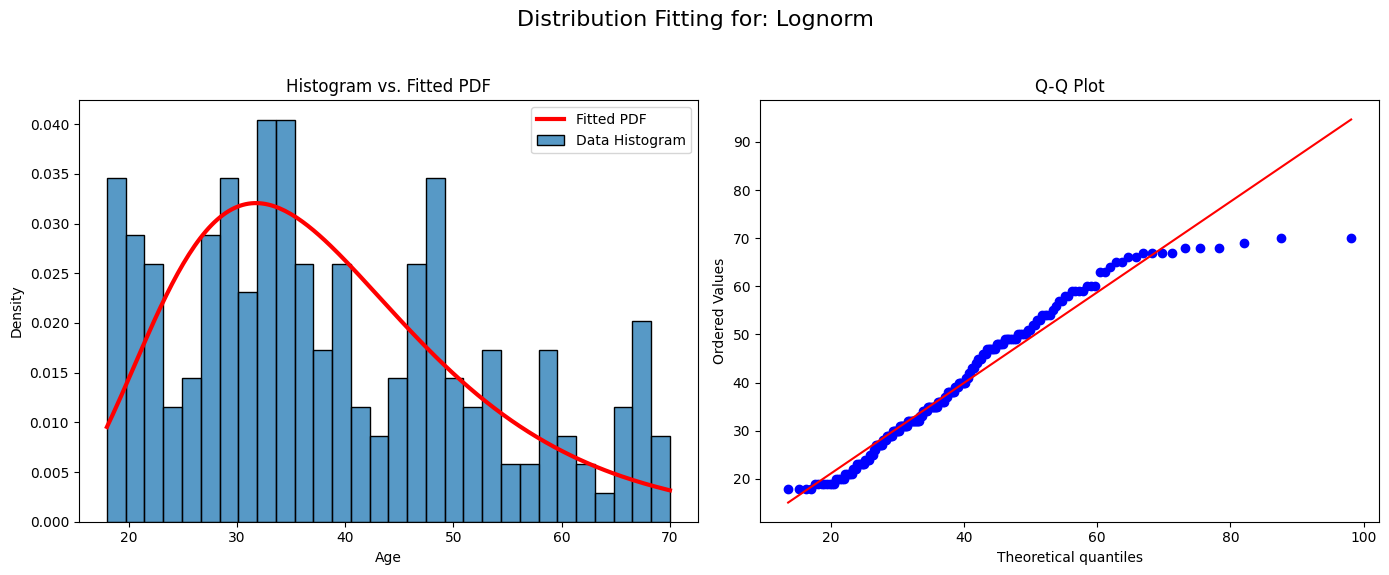

--- Lognorm Distribution ---
Fitted Parameters: {'s': np.float64(0.36966138262134635), 'loc': 0.3230225786387177, 'scale': np.float64(36.0396219159031)}
Kolmogorov-Smirnov Test: statistic=0.0729, p-value=0.2266
✅ K-S test result: The data likely follows this distribution (p > 0.05).
--------------------------------------------------



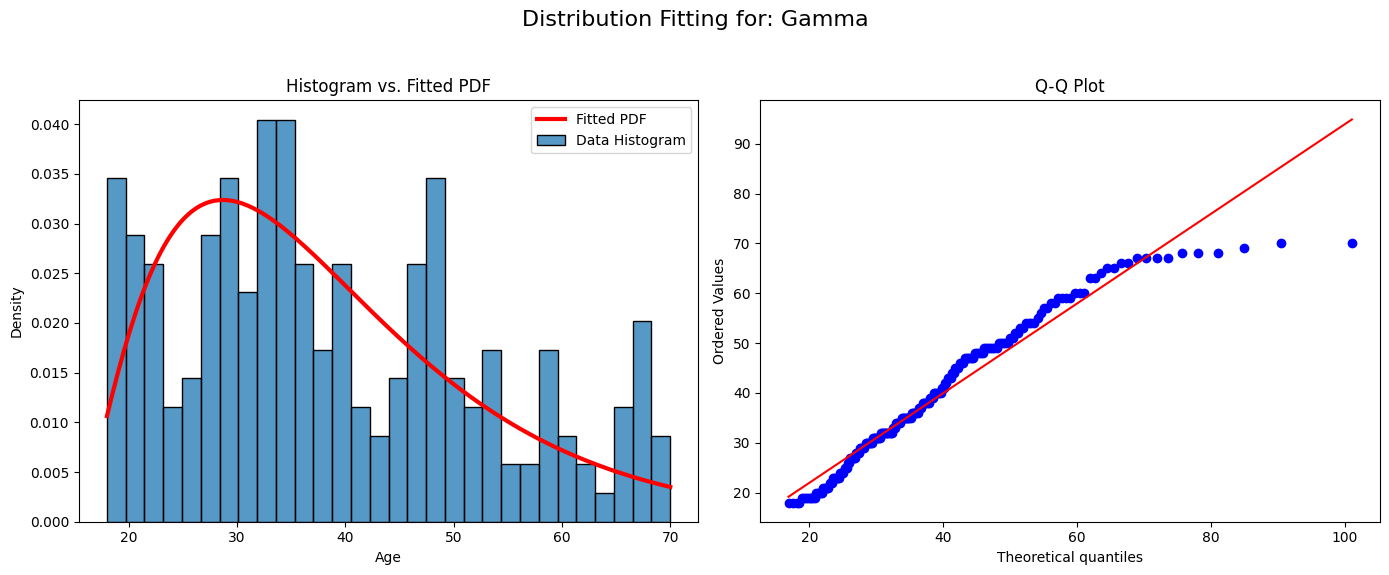

--- Gamma Distribution ---
Fitted Parameters: {'a': np.float64(2.3010275218940794), 'loc': np.float64(15.508653018307047), 'scale': np.float64(10.143894540773577)}
Kolmogorov-Smirnov Test: statistic=0.0712, p-value=0.2503
✅ K-S test result: The data likely follows this distribution (p > 0.05).
--------------------------------------------------



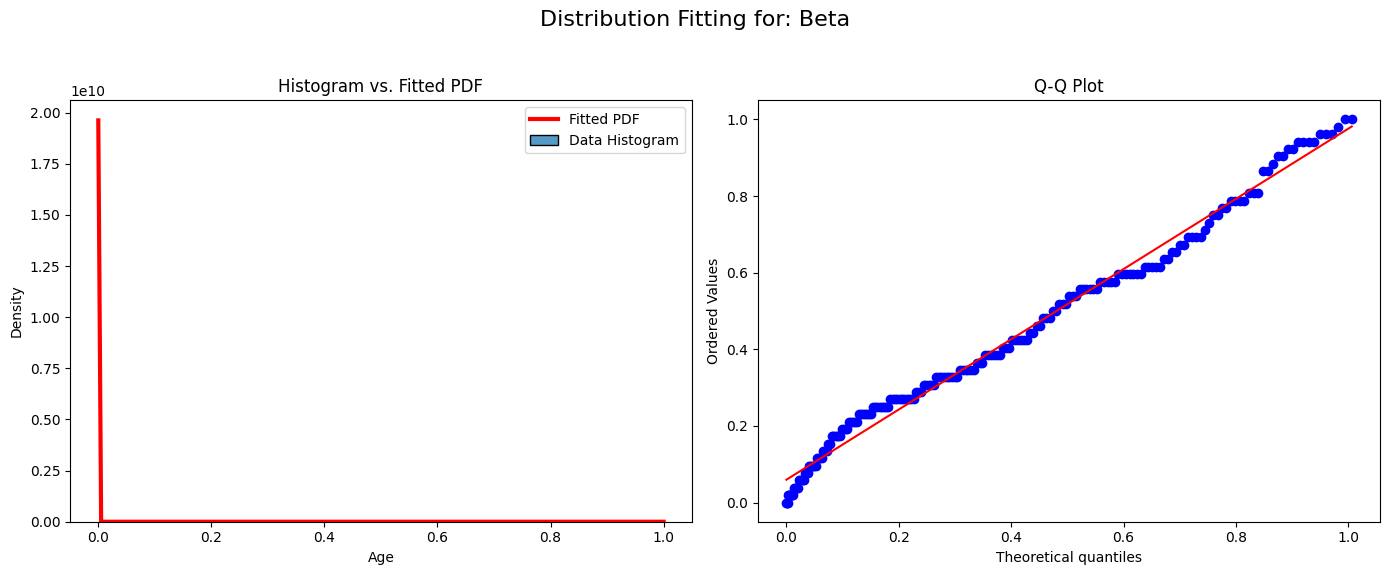

--- Beta Distribution ---
Fitted Parameters: {'a': np.float64(0.6704711807801624), 'b': np.float64(1.1592562972688392), 'loc': np.float64(-2.3488779093484682e-32), 'scale': np.float64(1.0170266708486793)}
Kolmogorov-Smirnov Test: statistic=0.1372, p-value=0.0010
❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).
--------------------------------------------------



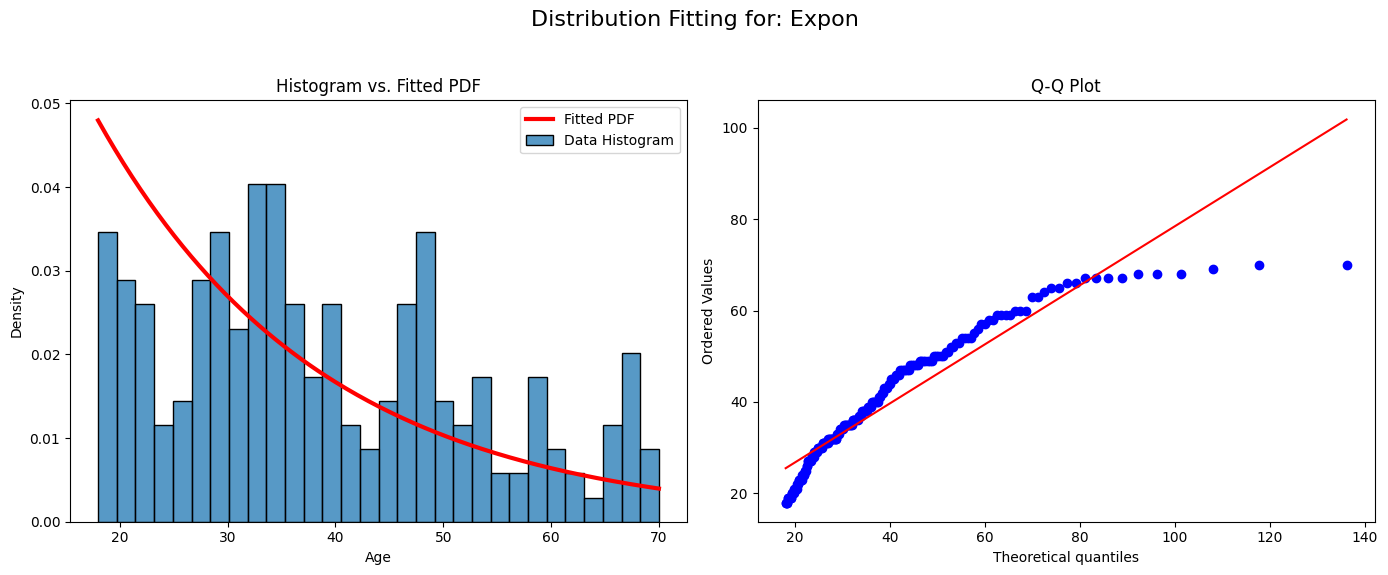

--- Expon Distribution ---
Fitted Parameters: {'loc': 18.0, 'scale': 20.85}
Kolmogorov-Smirnov Test: statistic=0.1626, p-value=0.0000
❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).
--------------------------------------------------



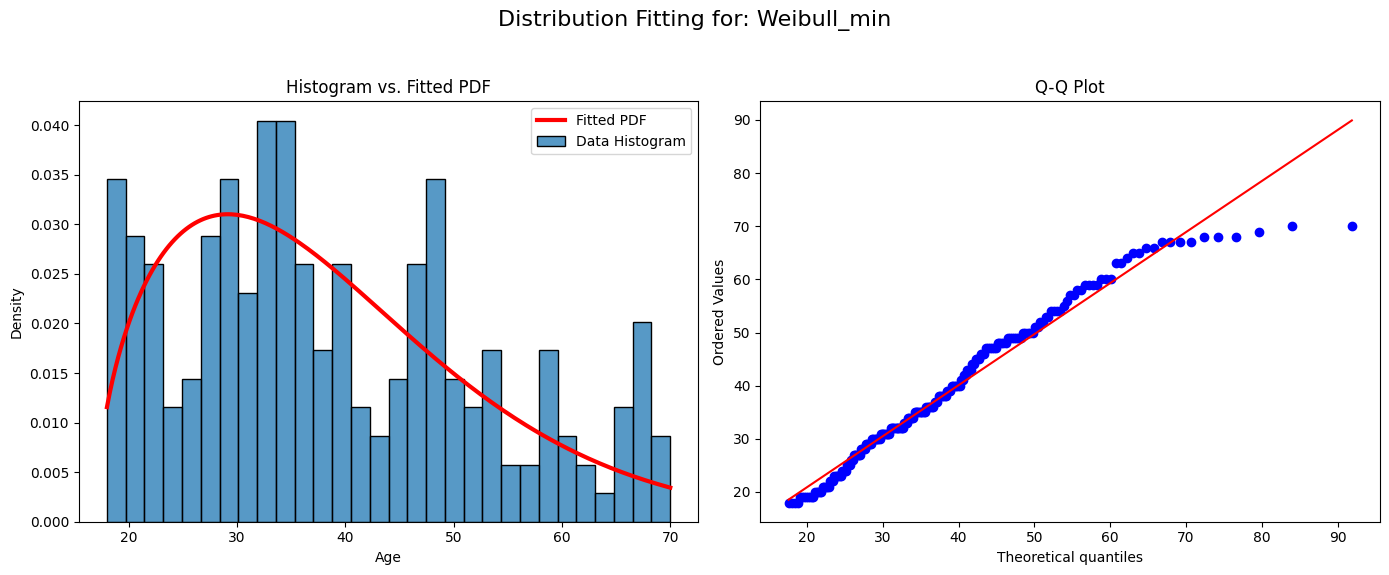

--- Weibull_min Distribution ---
Fitted Parameters: {'c': np.float64(1.5353155370838543), 'loc': np.float64(16.98077319102063), 'scale': np.float64(24.190488830392464)}
Kolmogorov-Smirnov Test: statistic=0.0667, p-value=0.3221
✅ K-S test result: The data likely follows this distribution (p > 0.05).
--------------------------------------------------



In [23]:
# Distribution fitting

# --- Assume base_df is loaded and contains an 'Age' column ---
# As an example, let's create a sample DataFrame.
# In your notebook, you would use your actual 'base_df'.
np.random.seed(42)
sample_ages = stats.gamma.rvs(a=5, loc=20, scale=4, size=1000)
# base_df = pd.DataFrame({'Age': sample_ages})
# --- End of example data creation ---


# Prepare the data by dropping any missing values
age_data = base_df['Age'].dropna()

# List of distributions to check
# We'll include the ones you imported plus a few other common ones.
distributions = [
    stats.norm,      # Normal
    stats.lognorm,   # Log-Normal
    stats.gamma,     # Gamma
    stats.beta,      # Beta
    stats.expon,     # Exponential
    stats.weibull_min # Weibull
]

print(f"Fitting distributions for 'Age' data...\n")

# Loop through each distribution
for dist in distributions:
    # --- 1. Fit the distribution to the data ---
    # Fit the distribution and get its parameters.
    # For the Beta distribution, data must be in the [0, 1] range.
    # We'll scale the 'Age' data to fit it.
    if dist.name == 'beta':
        # Scaling data to [0, 1] for the Beta distribution
        scaled_data = (age_data - age_data.min()) / (age_data.max() - age_data.min())
        params = dist.fit(scaled_data)
        data_to_plot = scaled_data
    else:
        params = dist.fit(age_data)
        data_to_plot = age_data

    # --- 2. Perform the Kolmogorov-Smirnov test for goodness of fit ---
    # The K-S test compares the data's empirical distribution function with the
    # cumulative distribution function (CDF) of the theoretical distribution.
    ks_stat, p_value = stats.kstest(data_to_plot, dist.name, args=params)

    # --- 3. Generate Plots ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Distribution Fitting for: {dist.name.capitalize()}', fontsize=16)

    # Plot 1: Histogram vs. Fitted PDF
    sns.histplot(data_to_plot, kde=False, stat='density', ax=ax1, label='Data Histogram', bins=30)
    x = np.linspace(data_to_plot.min(), data_to_plot.max(), 200)
    ax1.plot(x, dist.pdf(x, *params), 'r-', lw=3, label='Fitted PDF')
    ax1.set_title('Histogram vs. Fitted PDF')
    ax1.legend()

    # Plot 2: Q-Q Plot
    stats.probplot(data_to_plot, dist=dist, sparams=params, plot=ax2)
    ax2.set_title('Q-Q Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # # --- 4. Print Results and Interpretation ---
    # print(f"--- {dist.name.capitalize()} Distribution ---")
    # param_names = [p for p in dist.shapes.split(',') if p] + ['loc', 'scale']
    # param_dict = {name: val for name, val in zip(param_names, params)}
    # print(f"Fitted Parameters: {param_dict}")
    # print(f"Kolmogorov-Smirnov Test: statistic={ks_stat:.4f}, p-value={p_value:.4f}")
    # if p_value > 0.05:
    #     print("✅ K-S test result: The data likely follows this distribution (p > 0.05).")
    # else:
    #     print("❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).")
    # print("-" * 50 + "\n")
    
    # --- 4. Print Results and Interpretation ---
    print(f"--- {dist.name.capitalize()} Distribution ---")
    
    # Handle parameter names safely - some distributions don't have shapes
    if dist.shapes:
        param_names = [p.strip() for p in dist.shapes.split(',') if p.strip()] + ['loc', 'scale']
    else:
        # For distributions without shape parameters (like exponential, normal)
        param_names = ['loc', 'scale']
    
    # Ensure we don't have more parameter names than actual parameters
    param_names = param_names[:len(params)]
    param_dict = {name: val for name, val in zip(param_names, params)}
    
    print(f"Fitted Parameters: {param_dict}")
    print(f"Kolmogorov-Smirnov Test: statistic={ks_stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("✅ K-S test result: The data likely follows this distribution (p > 0.05).")
    else:
        print("❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).")
    print("-" * 50 + "\n")



Analysing numerical features: %s ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
----------------------------------------
Analyzing Age
----------------------------------------
--------------------------------------------------

Outlier Analysis of %s Age
--------------------------------------------------
Q1=np.float64(28.75), Q3=np.float64(49.0), IQR=np.float64(20.25)
lower_bound=np.float64(-1.625), upper_bound=np.float64(79.375)
Outliers: count= %s, percentage= %s 0 0.0


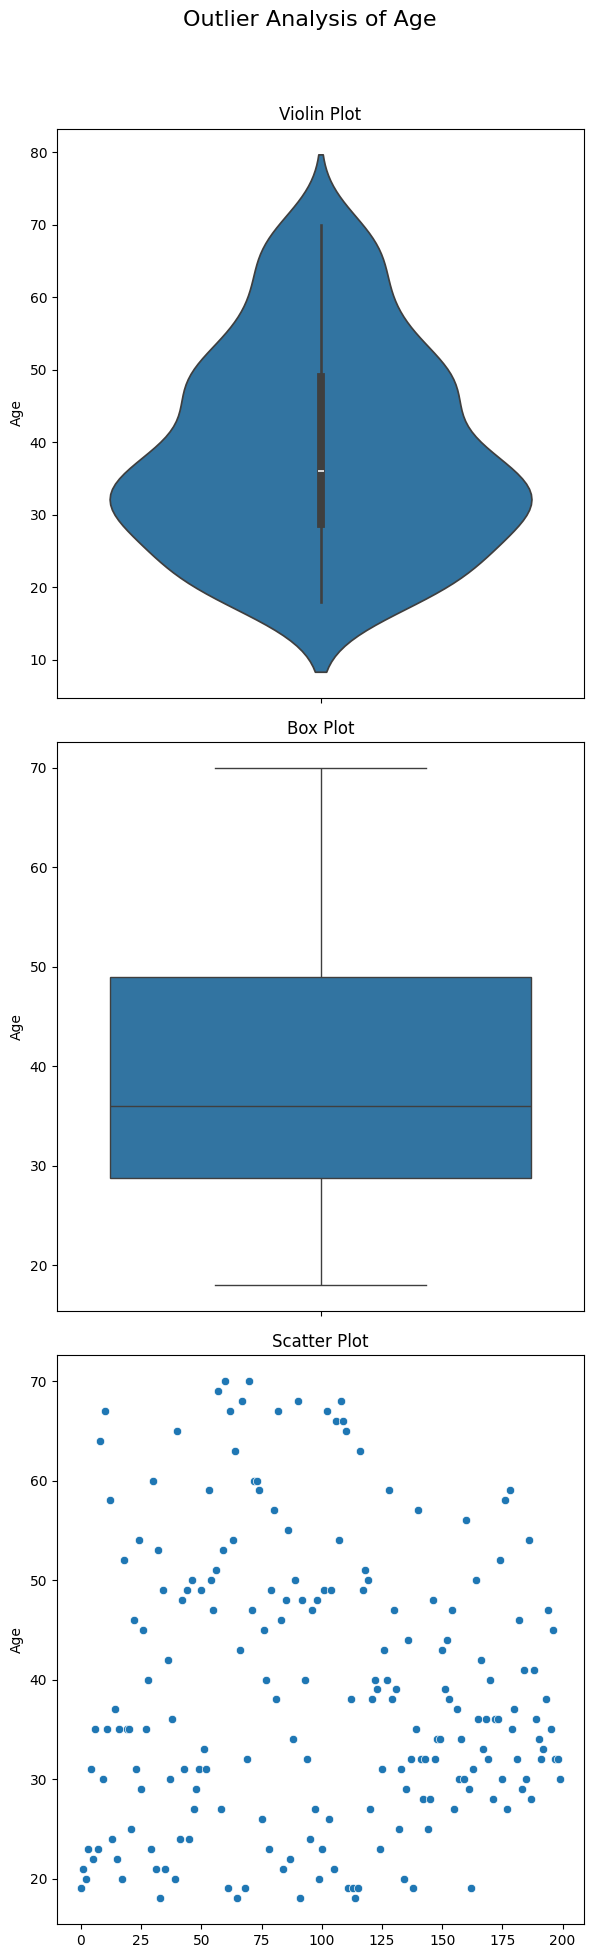

----------------------------------------
Analyzing Annual Income (k$)
----------------------------------------
--------------------------------------------------

Outlier Analysis of %s Annual Income (k$)
--------------------------------------------------
Q1=np.float64(41.5), Q3=np.float64(78.0), IQR=np.float64(36.5)
lower_bound=np.float64(-13.25), upper_bound=np.float64(132.75)
Outliers: count= %s, percentage= %s 2 0.01


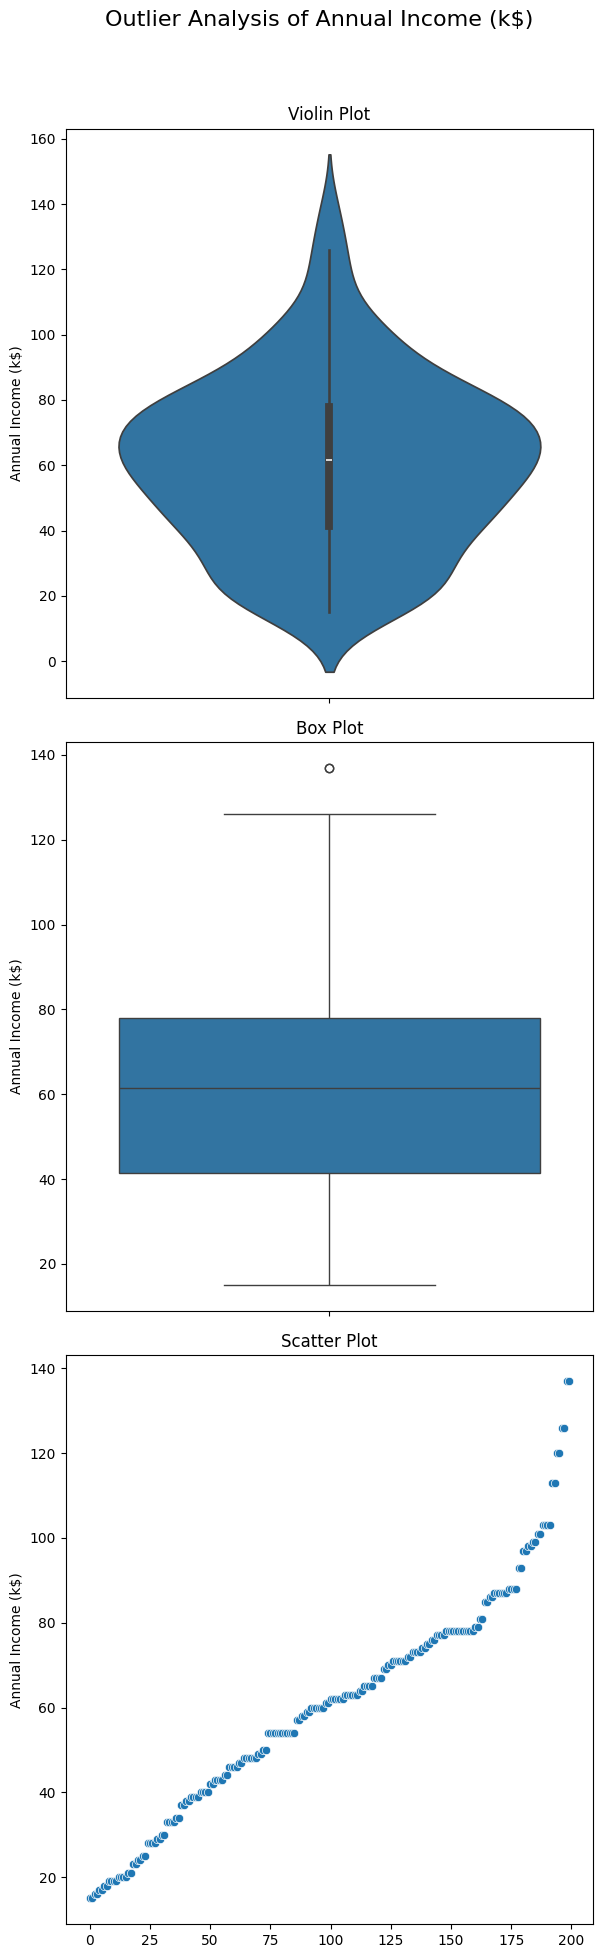

----------------------------------------
Analyzing Spending Score (1-100)
----------------------------------------
--------------------------------------------------

Outlier Analysis of %s Spending Score (1-100)
--------------------------------------------------
Q1=np.float64(34.75), Q3=np.float64(73.0), IQR=np.float64(38.25)
lower_bound=np.float64(-22.625), upper_bound=np.float64(130.375)
Outliers: count= %s, percentage= %s 0 0.0


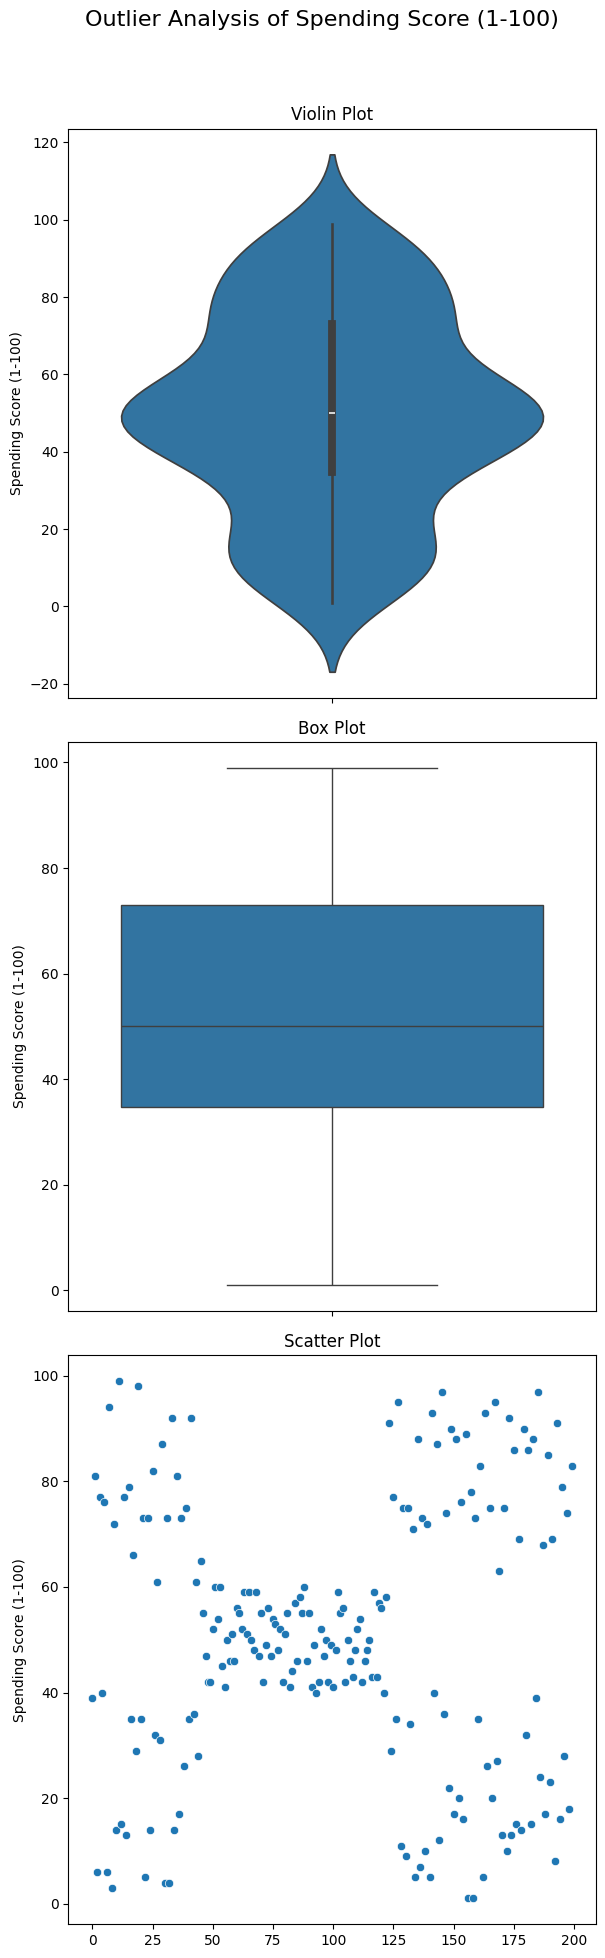

In [24]:
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=4, width=80, sort_dicts=False)

univariate_analysis = {}

numerical_features = analysis_results['dataset']['numerical_features']

print("Analysing numerical features: %s", numerical_features)
print("="*40)

numerical_df = base_df[numerical_features]

for numerical_feature in numerical_features:
    col = numerical_feature
    print("-"*40)
    print(f"Analyzing {numerical_feature}")
    print("-"*40)
    
    # checks before processing column
    col_data = numerical_df[col].dropna()

    if len(col_data) == 0:
        print(f"Column {col} has no data after dropping NA, skipping...")
        continue
    
    qtls = col_data.quantile([0.25, 0.5, 0.75, 0.95, 0.99])
    
    stats_dict = {
        'count' : len(col_data),
        'mean' : col_data.mean(),
        'median' : col_data.median(),
        'mode' : col_data.mode().values[0] if not col_data.mode().empty else None,
        'std' : col_data.std(),
        'var' : col_data.var(),
        'min' : col_data.min(),
        'max' : col_data.max(),
        'skew' : stats.skew(col_data),
        'kurtosis' : stats.kurtosis(col_data),
        'quantiles' : qtls.to_dict()
    }

    univariate_analysis[col] = stats_dict

    print('-' * 50)
    print("\n" + "Outlier Analysis of %s", col)
    print('-' * 50)

    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    print(f"{Q1=}, {Q3=}, {IQR=}")

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"{lower_bound=}, {upper_bound=}")

    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    print("Outliers: count= %s, percentage= %s", len(outliers), len(outliers)/len(col_data))
    ## What is the best way to visualize outliers?
    # create a figure for 3 subplots one below the other
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 21))
    fig.suptitle(f'Outlier Analysis of {col}', fontsize=16, y=0.93)
    # Manually place text - not advisable
    # fig.text(0.5, 0.95, f"Outlier Analysis of {col}", 
    #          ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Not advisable, use tight_layout instead
    # fig.add_gridspec(3, 1, hspace=0.5)
    fig.tight_layout(rect=[0, 0, 1, 0.9])

    # Plot 1: Violin plot
    sns.violinplot(y=col_data, ax=ax1)
    ax1.set_title('Violin Plot')

    # Plot 2: Box plot
    sns.boxplot(y=col_data, ax=ax2)
    ax2.set_title('Box Plot')

    # Plot 3: scatter plot
    sns.scatterplot(x=range(len(col_data)), y=col_data, ax=ax3)
    ax3.set_title('Scatter Plot')


    save_path = Path(FIG_DIR) / 'univariate' / f"Outlier_analysis_{col}.png"
    if not save_path.parent.exists():
        save_path.parent.mkdir(parents=True)
    else:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()



    # print("Basic Statistics:")
    # print(col_data.describe())
    
    # Configure pretty printer for better formatting
    
    # print("\nDetailed Statistics:")
    # pp.pprint(stats_dict)

    # print("\nSkewness and Kurtosis:")
    # print(stats.skew(col_data), stats.kurtosis(col_data))

    # print("\nQuantiles:")
    # print(qtls)

    # Outlier analysis
    

/var/folders/hw/_5wyr27j3jxdnfbcrg24_l9c0000gn/T/ipykernel_83690/3167632980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


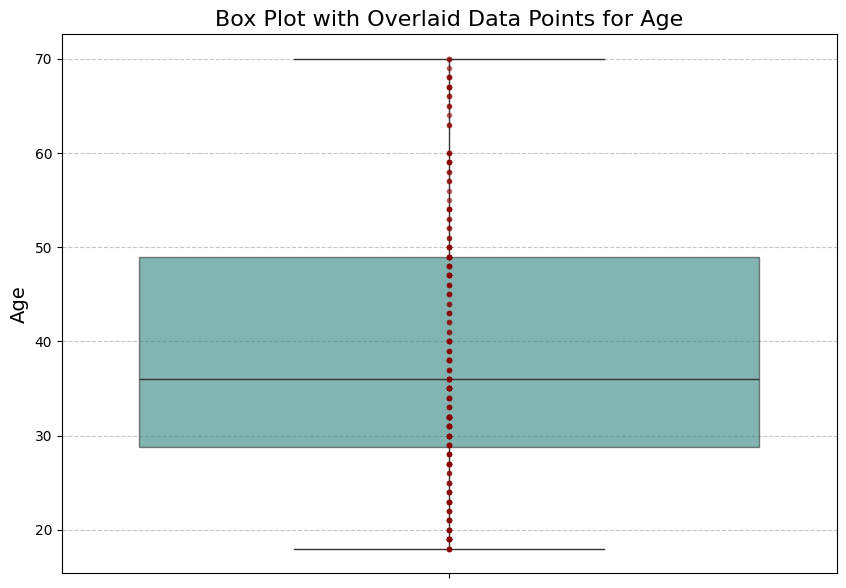

In [25]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    y=base_df['Age'],
    palette='viridis',
    boxprops=dict(alpha=0.6),
    showfliers=False
)

sns.stripplot(
    y=base_df['Age'],
    color='darkred',
    size=4,
    jitter=False,
    alpha=0.6
)

# sns.swarmplot(
#     y=base_df['Age'],
#     color='darkred',
#     size=4
# )

plt.title('Box Plot with Overlaid Data Points for Age', fontsize=16)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Box Plot vs. Violin Plot

Excellent question. Both box plots and violin plots are powerful tools for visualizing the distribution of numerical data, but they show different levels of detail.

Here’s a breakdown of the differences and when to use each.

#### The Box Plot (Box-and-Whisker Plot)

A box plot provides a concise summary of a dataset's distribution using five key numbers.

**What it shows:**
1.  **Median (Q2):** The line inside the box represents the middle value of the data (50th percentile).
2.  **Interquartile Range (IQR):** The box itself represents the middle 50% of the data.
    -   The bottom of the box is the first quartile (Q1), or the 25th percentile.
    -   The top of the box is the third quartile (Q3), or the 75th percentile.
3.  **Whiskers:** The lines extending from the box. They typically show the range of the data up to 1.5 times the IQR from the box.
4.  **Outliers:** Any data points that fall outside the whiskers are plotted as individual points.

**Strengths:**
-   **Concise:** Summarizes the data into a few key descriptive statistics.
-   **Great for Comparison:** Excellent for placing many plots side-by-side to compare the distributions of different groups.
-   **Outlier Detection:** Clearly highlights potential outliers.

**Weaknesses:**
-   **Hides Distribution Shape:** This is its biggest drawback. It does not show *how* the data is distributed within each section. You cannot see if a distribution has one peak (unimodal) or multiple peaks (multimodal).

---

#### The Violin Plot

A violin plot combines the features of a box plot with a **Kernel Density Estimate (KDE)** plot.

**What it shows:**
1.  **Kernel Density Estimate (KDE):** The "violin" shape itself is a smoothed histogram. The wider sections of the violin indicate where the data is more concentrated (higher probability density), and the narrower sections indicate where it is less concentrated.
2.  **Summary Statistics:** Inside the violin, there is typically:
    -   A white dot representing the **median**.
    -   A thick black bar representing the **interquartile range (IQR)**.
    -   Thin lines representing the **whiskers**.

**Strengths:**
-   **Shows the Full Distribution:** Its primary advantage is that it visualizes the entire distribution of the data. It can easily show if the data is bimodal (has two peaks) or has some other complex shape.
-   **Rich Detail:** Provides a much more nuanced and informative view of the data than a box plot.

**Weaknesses:**
-   **More Complex:** Can be less intuitive to a non-technical audience.
-   **Can Be Cluttered:** When comparing many groups, a series of violin plots can look more cluttered than a series of box plots.

---

### Which One is More Effective?

The effectiveness depends entirely on your goal. There is no single "better" plot.

-   **Use a Box Plot when:**
    -   You need to compare many groups at once.
    -   Your primary focus is on summary statistics (median, quartiles).
    -   You want to quickly identify and present outliers.
    -   The detailed shape of the distribution is not your main concern.

-   **Use a Violin Plot when:**
    -   **The shape of the distribution is crucial.**
    -   You suspect the data might be **multimodal** (having multiple peaks). A box plot would completely hide this important insight.
    -   You have fewer groups to compare and want to provide a richer, more detailed visualization.

**Analogy:** A **box plot** is like a *chapter summary* of a book—it gives you the key points quickly. A **violin plot** is like a *detailed synopsis*—it gives you the key points but also tells you about the tone, style, and structure of the narrative.

**Conclusion:** For a quick, high-level comparison of groups, a **box plot** is more effective. For a deep, detailed understanding of a single group's distribution or for comparing a few groups where the shape matters, a **violin plot** is more effective.

---
---

### Best Ways to Visualize Outliers

The "best" way to visualize outliers depends on your goal and the nature of your data (i.e., whether you're looking at a single variable or the relationship between multiple variables).

Here are the most effective methods, ranked from most common to more specialized.

#### 1. Box Plot (The Standard Choice)

This is the go-to plot for outlier detection for a single variable.

-   **How it works:** Box plots are specifically designed to highlight outliers. They use a statistical rule called the **Interquartile Range (IQR)** to define what an outlier is. Any data point that falls more than 1.5 times the IQR below the first quartile or above the third quartile is plotted as an individual point (a dot or a circle).
-   **Why it's effective:**
    -   **Clear Definition:** It provides a non-arbitrary, statistical definition of an outlier.
    -   **Excellent for Comparison:** You can easily place multiple box plots side-by-side to compare the presence and number of outliers across different categories or groups.
-   **When to use it:** This should almost always be your **first choice** for a quick and standard way to find and present outliers in one or more single-variable distributions.

#### 2. Scatter Plot (For Relationships)

This is the best method for visualizing outliers in the context of **two variables**.

-   **How it works:** You plot one variable on the x-axis and another on the y-axis. Outliers are the points that are "far away" from the main cluster of data.
-   **Why it's effective:**
    -   **Contextual Outliers:** It reveals points that might not be outliers in either variable alone, but are outliers in their combination. For example, a person with a height of 6'5" isn't an outlier, and a person with a weight of 120 lbs isn't an outlier. But a person who is 6'5" and 120 lbs *is* a contextual outlier, and a scatter plot would make this point stand out immediately.
-   **When to use it:** Whenever you want to find outliers in a **bivariate relationship** (i.e., between two variables).

#### 3. Histogram or Density Plot

These plots are useful for understanding the frequency and location of outliers within the overall distribution.

-   **How it works:** Outliers will appear as isolated bars (on a histogram) or small bumps (on a density plot) far away from the main body of the data.
-   **Why it's effective:**
    -   **Shows Frequency:** It helps you see if you have a single extreme outlier or a "tail" of many less extreme outliers.
    -   **Shows Context:** It visualizes outliers in the context of the entire distribution's shape (e.g., skewness).
-   **When to use it:** When you want to understand the *frequency* of outliers and see how they affect the overall shape of the data distribution. It's a good complement to a box plot.

#### 4. Scatter Plot with Z-Score Coloring

This is a more advanced technique that is excellent for visualizing the *magnitude* of how extreme an outlier is.

-   **How it works:**
    1.  For a single variable (e.g., 'Age'), calculate the **Z-score** for each data point. The Z-score measures how many standard deviations a point is from the mean. `Z = (value - mean) / std_dev`.
    2.  Create a scatter plot where the y-axis is the value of the data point and the x-axis is just its index in the dataset.
    3.  Color each point based on its Z-score. You can use a color gradient or set a specific color for points with a Z-score above a certain threshold (e.g., > 3).
-   **Why it's effective:**
    -   **Quantifies "Extremeness":** It gives you a standardized number (the Z-score) to measure exactly *how much* of an outlier a point is.
    -   **Clear Visual Threshold:** It makes it very easy to see which points cross a specific outlier threshold (e.g., "show me all points that are more than 3 standard deviations from the mean").
-   **When to use it:** When you need a more statistically rigorous and quantifiable way to identify and present outliers for a single variable.

---

### Summary: Which is Best?

| Method | Best For... |
| :--- | :--- |
| **Box Plot** | **Quick, standard outlier detection** and comparing across groups. Your best starting point. |
| **Scatter Plot** | Finding outliers in the **relationship between two variables**. |
| **Histogram** | Understanding the **frequency and distribution** of outliers. |
| **Scatter Plot + Z-Score** | **Quantifying the magnitude** of outliers and visualizing how "extreme" they are. |

**Recommendation:**
-   For a single variable, start with a **Box Plot** for a quick look, and use a **Histogram** to understand the context.
-   If you need to analyze the relationship between two variables, the **Scatter Plot** is the best tool.

Fitting distributions for 'Age' data...



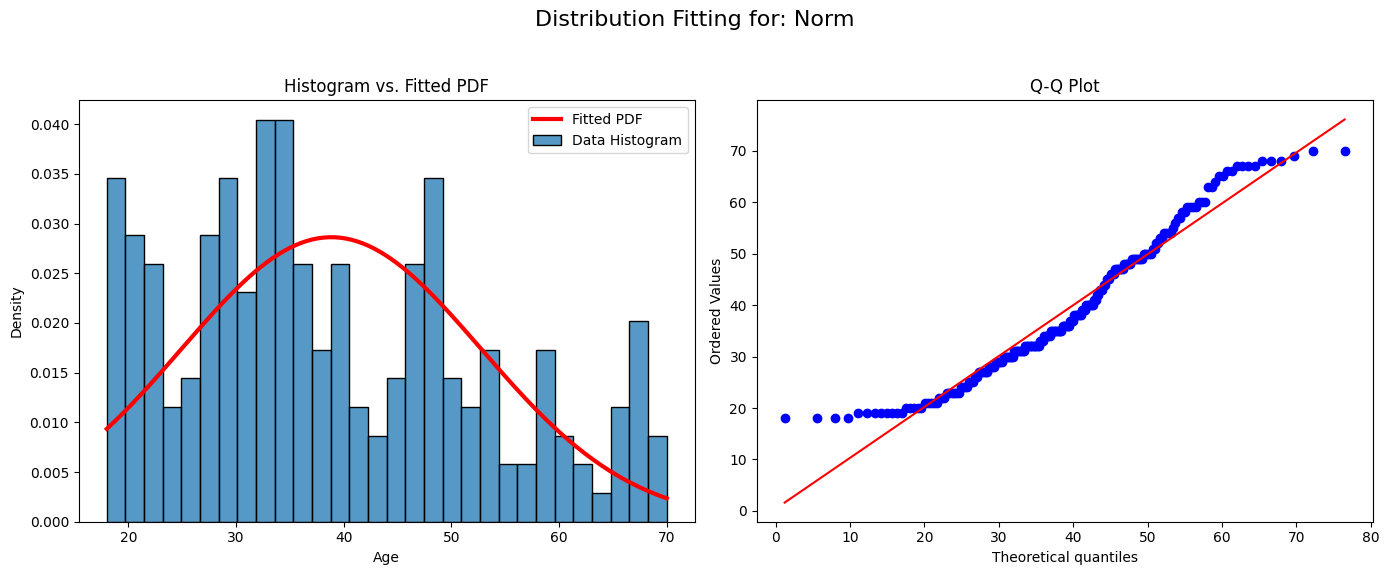

--- Norm Distribution ---
Fitted Parameters: {'loc': np.float64(38.85), 'scale': np.float64(13.934041050606963)}
Kolmogorov-Smirnov Test: statistic=0.1010, p-value=0.0314
❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).
--------------------------------------------------



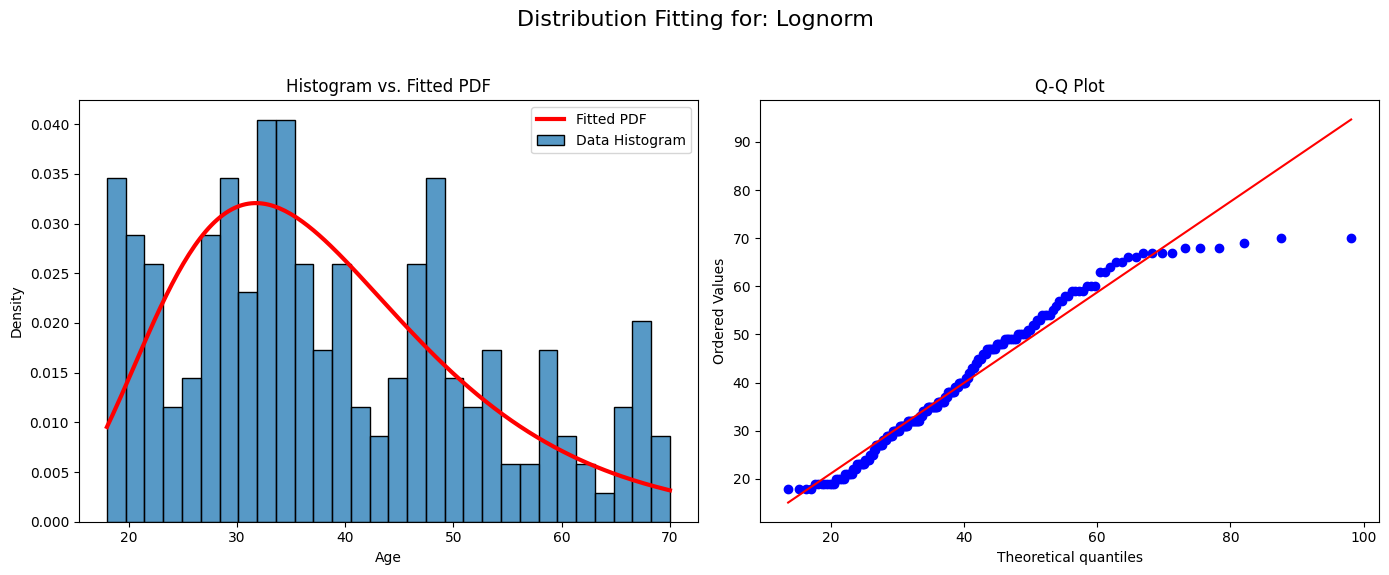

--- Lognorm Distribution ---
Fitted Parameters: {'s': np.float64(0.36966138262134635), 'loc': 0.3230225786387177, 'scale': np.float64(36.0396219159031)}
Kolmogorov-Smirnov Test: statistic=0.0729, p-value=0.2266
✅ K-S test result: The data likely follows this distribution (p > 0.05).
--------------------------------------------------



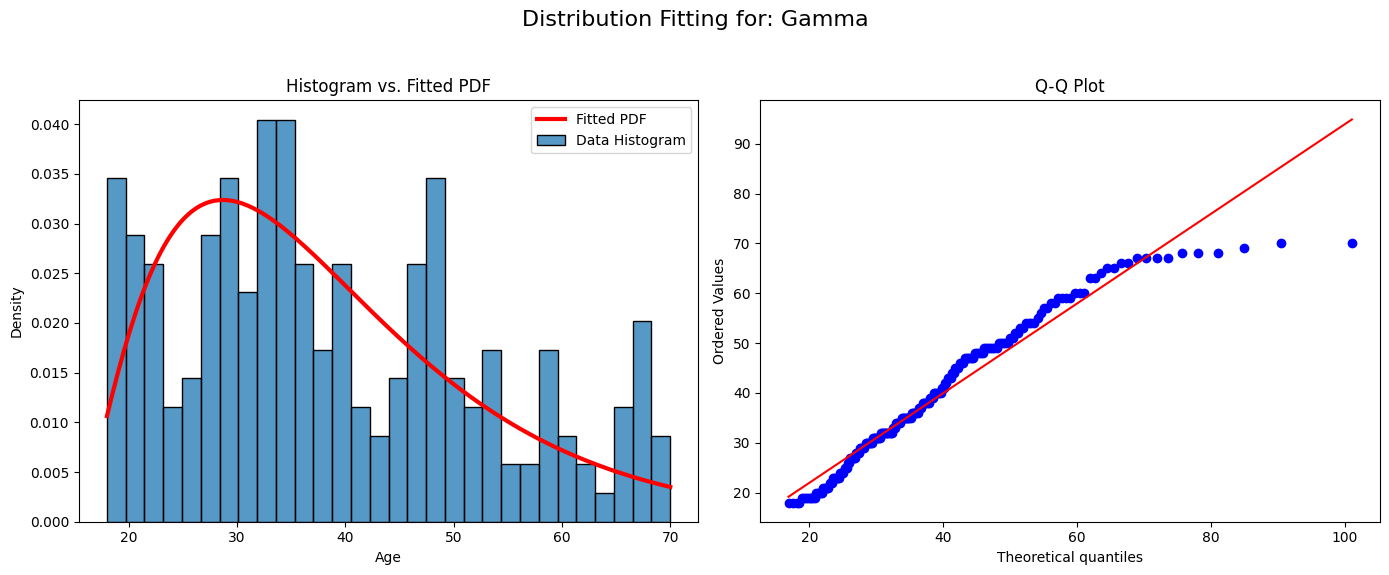

--- Gamma Distribution ---
Fitted Parameters: {'a': np.float64(2.3010275218940794), 'loc': np.float64(15.508653018307047), 'scale': np.float64(10.143894540773577)}
Kolmogorov-Smirnov Test: statistic=0.0712, p-value=0.2503
✅ K-S test result: The data likely follows this distribution (p > 0.05).
--------------------------------------------------



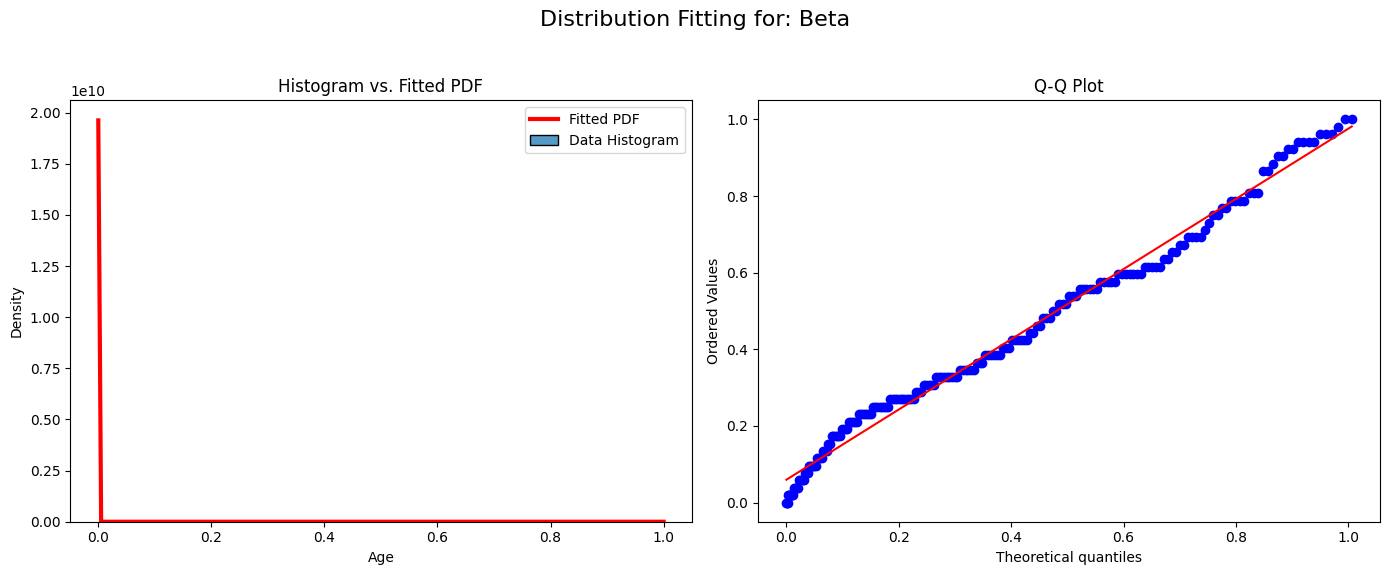

--- Beta Distribution ---
Fitted Parameters: {'a': np.float64(0.6704711807801624), 'b': np.float64(1.1592562972688392), 'loc': np.float64(-2.3488779093484682e-32), 'scale': np.float64(1.0170266708486793)}
Kolmogorov-Smirnov Test: statistic=0.1372, p-value=0.0010
❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).
--------------------------------------------------



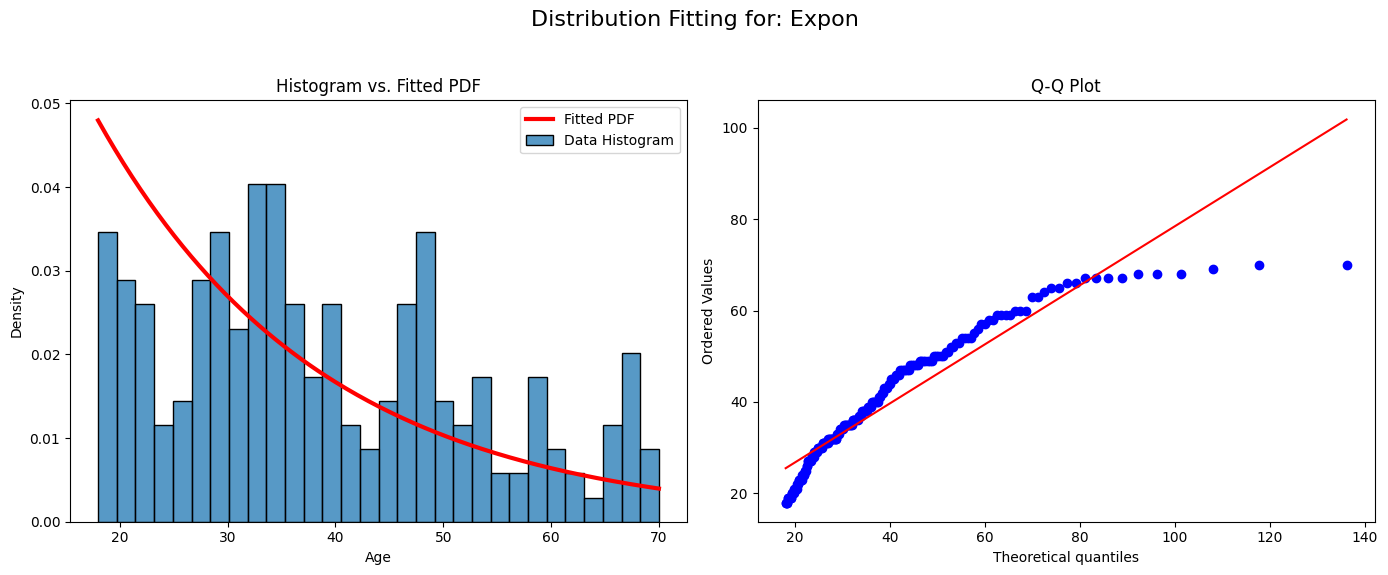

--- Expon Distribution ---
Fitted Parameters: {'loc': 18.0, 'scale': 20.85}
Kolmogorov-Smirnov Test: statistic=0.1626, p-value=0.0000
❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).
--------------------------------------------------



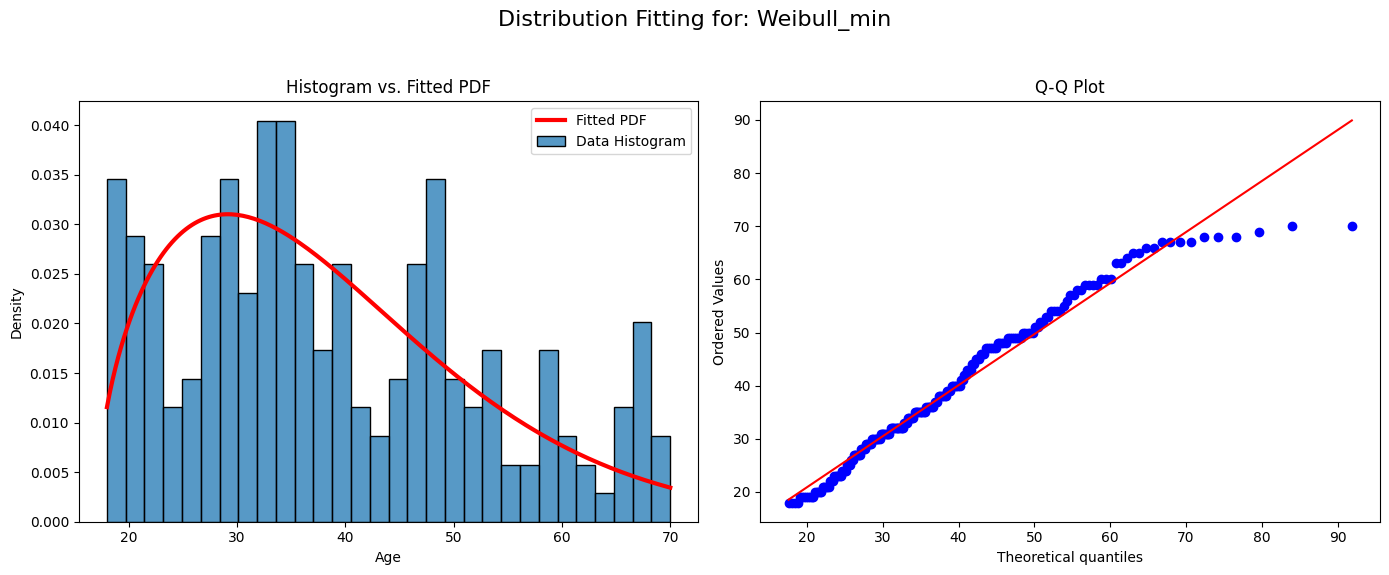

--- Weibull_min Distribution ---
Fitted Parameters: {'c': np.float64(1.5353155370838543), 'loc': np.float64(16.98077319102063), 'scale': np.float64(24.190488830392464)}
Kolmogorov-Smirnov Test: statistic=0.0667, p-value=0.3221
✅ K-S test result: The data likely follows this distribution (p > 0.05).
--------------------------------------------------



In [30]:
### Overall Purpose of the script below
# The script's goal is to perform distribution fitting. It takes a single column of data ('Age') and tries to find the best statistical distribution (e.g., Normal, Gamma, Lognormal) that describes the data's shape. It does this by:

# 1. Fitting several candidate distributions to the data to find their optimal parameters.
# 2. Quantitatively evaluating the "goodness of fit" for each one using the Kolmogorov-Smirnov (KS) test.
# 3. Visually comparing the data to each fitted distribution using histograms and Q-Q plots.

# Distribution fitting

# --- Assume base_df is loaded and contains an 'Age' column ---
# As an example, let's create a sample DataFrame.
# In your notebook, you would use your actual 'base_df'.
np.random.seed(42)
sample_ages = stats.gamma.rvs(a=5, loc=20, scale=4, size=1000)
# base_df = pd.DataFrame({'Age': sample_ages})
# --- End of example data creation ---


# Prepare the data by dropping any missing values
age_data = base_df['Age'].dropna()

# List of distributions to check
# We'll include the ones you imported plus a few other common ones.
distributions = [
    stats.norm,      # Normal
    stats.lognorm,   # Log-Normal
    stats.gamma,     # Gamma
    stats.beta,      # Beta
    stats.expon,     # Exponential
    stats.weibull_min # Weibull
]

print(f"Fitting distributions for 'Age' data...\n")

# Loop through each distribution
for dist in distributions:
    # --- 1. Fit the distribution to the data ---
    # Fit the distribution and get its parameters.
    # For the Beta distribution, data must be in the [0, 1] range.
    # We'll scale the 'Age' data to fit it.
    if dist.name == 'beta':
        # Scaling data to [0, 1] for the Beta distribution
        scaled_data = (age_data - age_data.min()) / (age_data.max() - age_data.min())
        params = dist.fit(scaled_data)
        data_to_plot = scaled_data
    else:
        params = dist.fit(age_data)
        data_to_plot = age_data

    # --- 2. Perform the Kolmogorov-Smirnov test for goodness of fit ---
    # The K-S test compares the data's empirical distribution function with the
    # cumulative distribution function (CDF) of the theoretical distribution.
    ks_stat, p_value = stats.kstest(data_to_plot, dist.name, args=params)

    # --- 3. Generate Plots ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Distribution Fitting for: {dist.name.capitalize()}', fontsize=16)

    # Plot 1: Histogram vs. Fitted PDF
    sns.histplot(data_to_plot, kde=False, stat='density', ax=ax1, label='Data Histogram', bins=30)
    x = np.linspace(data_to_plot.min(), data_to_plot.max(), 200)
    ax1.plot(x, dist.pdf(x, *params), 'r-', lw=3, label='Fitted PDF')
    ax1.set_title('Histogram vs. Fitted PDF')
    ax1.legend()

    # Plot 2: Q-Q Plot
    stats.probplot(data_to_plot, dist=dist, sparams=params, plot=ax2)
    ax2.set_title('Q-Q Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # # --- 4. Print Results and Interpretation ---
    # print(f"--- {dist.name.capitalize()} Distribution ---")
    # param_names = [p for p in dist.shapes.split(',') if p] + ['loc', 'scale']
    # param_dict = {name: val for name, val in zip(param_names, params)}
    # print(f"Fitted Parameters: {param_dict}")
    # print(f"Kolmogorov-Smirnov Test: statistic={ks_stat:.4f}, p-value={p_value:.4f}")
    # if p_value > 0.05:
    #     print("✅ K-S test result: The data likely follows this distribution (p > 0.05).")
    # else:
    #     print("❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).")
    # print("-" * 50 + "\n")
    
    # --- 4. Print Results and Interpretation ---
    print(f"--- {dist.name.capitalize()} Distribution ---")
    
    # Handle parameter names safely - some distributions don't have shapes
    if dist.shapes:
        param_names = [p.strip() for p in dist.shapes.split(',') if p.strip()] + ['loc', 'scale']
    else:
        # For distributions without shape parameters (like exponential, normal)
        param_names = ['loc', 'scale']
    
    # Ensure we don't have more parameter names than actual parameters
    param_names = param_names[:len(params)]
    param_dict = {name: val for name, val in zip(param_names, params)}
    
    print(f"Fitted Parameters: {param_dict}")
    print(f"Kolmogorov-Smirnov Test: statistic={ks_stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("✅ K-S test result: The data likely follows this distribution (p > 0.05).")
    else:
        print("❌ K-S test result: The data likely does not follow this distribution (p <= 0.05).")
    print("-" * 50 + "\n")


Analysing numerical features: %s ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
----------------------------------------
Analyzing Age
----------------------------------------
--------------------------------------------------

Outlier Analysis of %s Age
--------------------------------------------------
Q1=np.float64(28.75), Q3=np.float64(49.0), IQR=np.float64(20.25)
lower_bound=np.float64(-1.625), upper_bound=np.float64(79.375)
Outliers: count= %s, percentage= %s 0 0.0


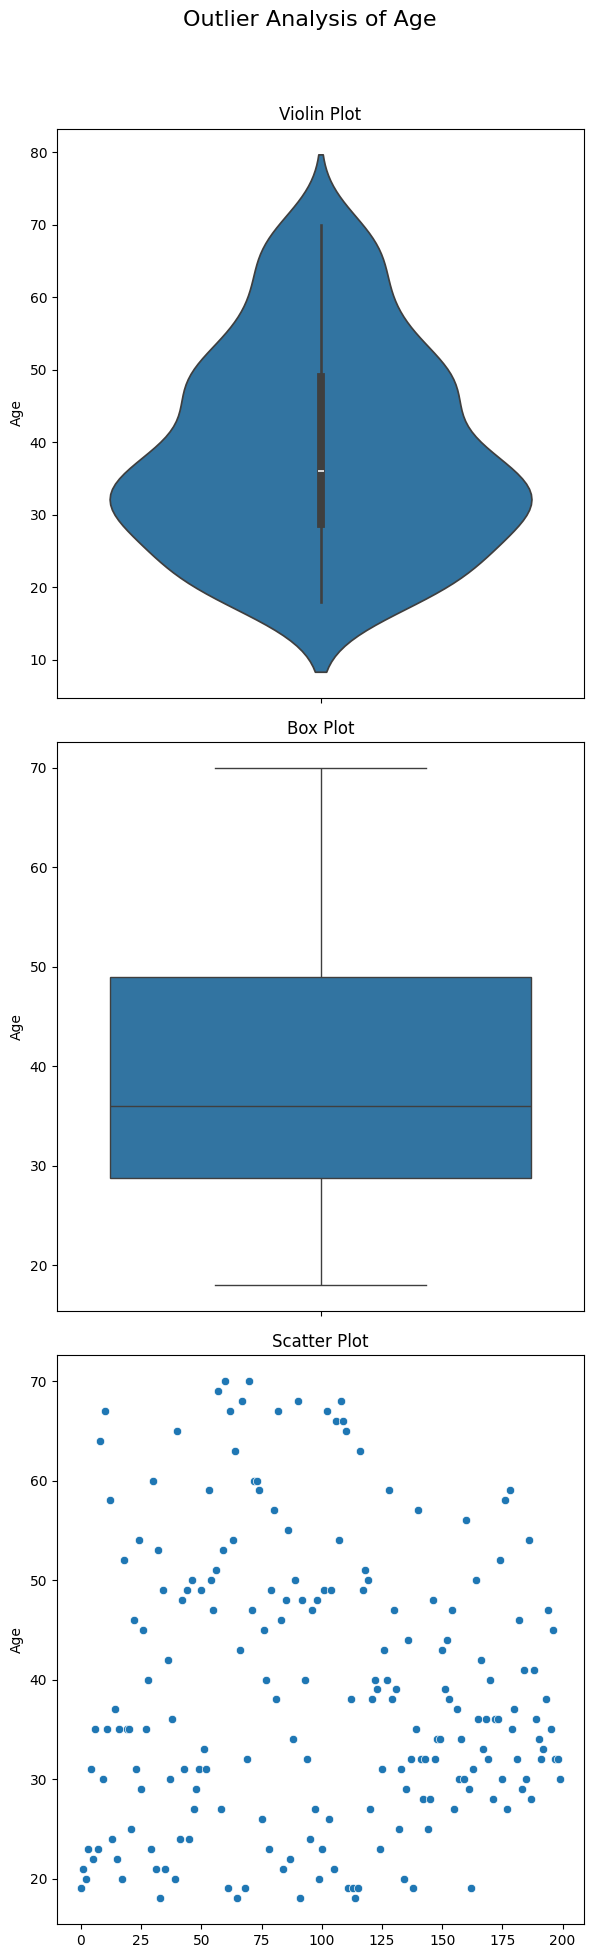

----------------------------------------
Analyzing Annual Income (k$)
----------------------------------------
--------------------------------------------------

Outlier Analysis of %s Annual Income (k$)
--------------------------------------------------
Q1=np.float64(41.5), Q3=np.float64(78.0), IQR=np.float64(36.5)
lower_bound=np.float64(-13.25), upper_bound=np.float64(132.75)
Outliers: count= %s, percentage= %s 2 0.01


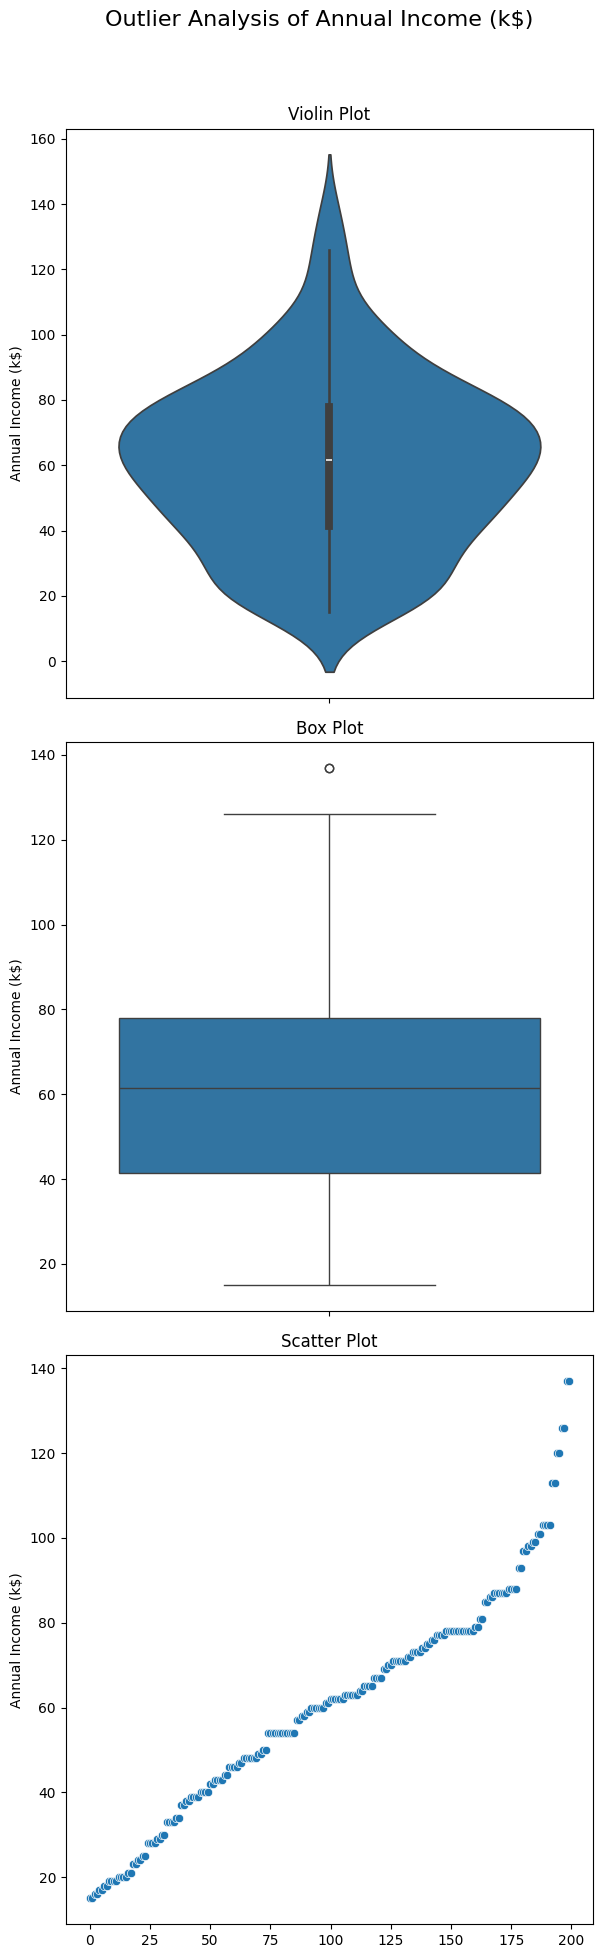

----------------------------------------
Analyzing Spending Score (1-100)
----------------------------------------
--------------------------------------------------

Outlier Analysis of %s Spending Score (1-100)
--------------------------------------------------
Q1=np.float64(34.75), Q3=np.float64(73.0), IQR=np.float64(38.25)
lower_bound=np.float64(-22.625), upper_bound=np.float64(130.375)
Outliers: count= %s, percentage= %s 0 0.0


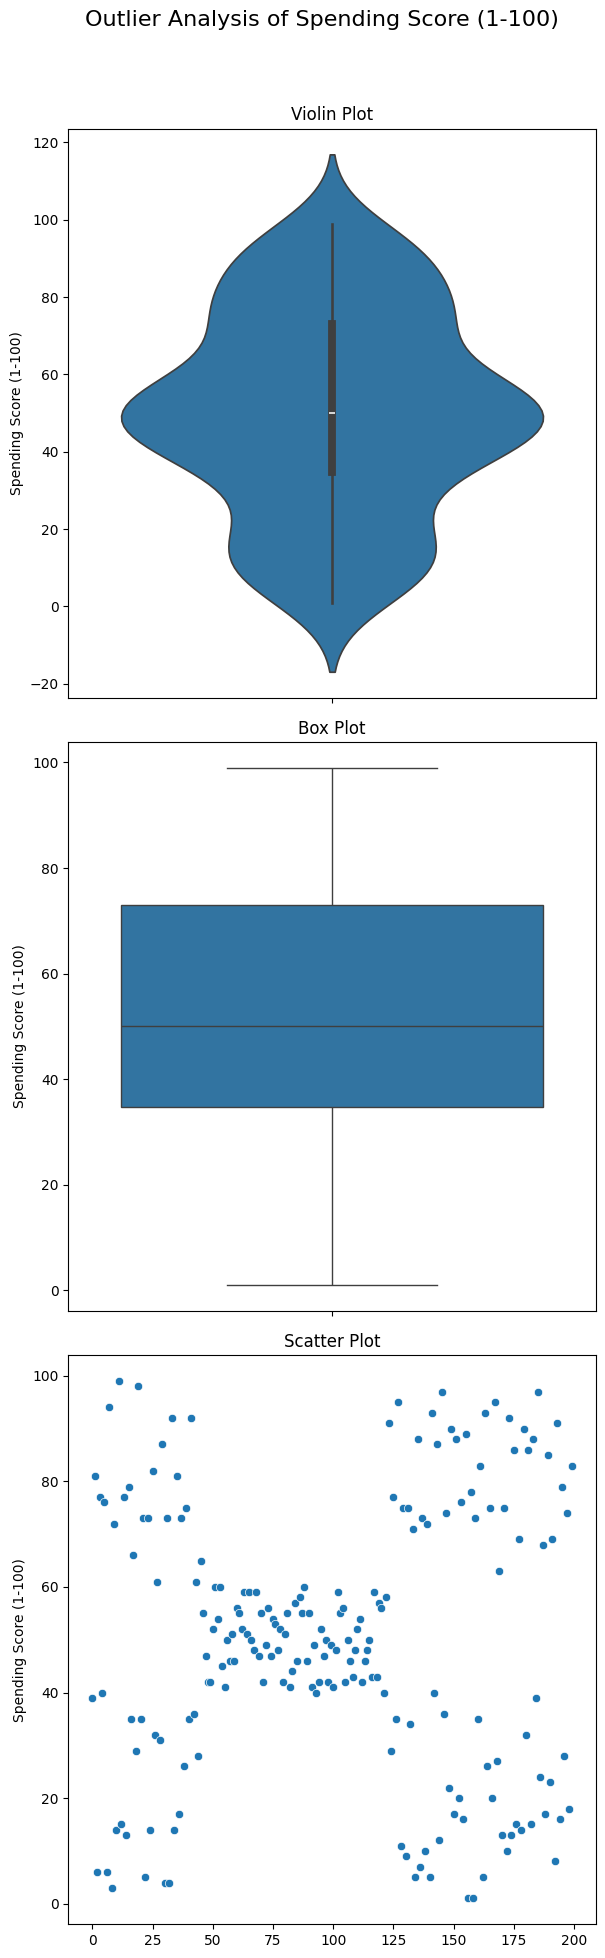

In [29]:


from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=4, width=80, sort_dicts=False)

univariate_analysis = {}

numerical_features = analysis_results['dataset']['numerical_features']

print("Analysing numerical features: %s", numerical_features)
print("="*40)

numerical_df = base_df[numerical_features]

for numerical_feature in numerical_features:
    col = numerical_feature
    print("-"*40)
    print(f"Analyzing {numerical_feature}")
    print("-"*40)
    
    # checks before processing column
    col_data = numerical_df[col].dropna()

    if len(col_data) == 0:
        print(f"Column {col} has no data after dropping NA, skipping...")
        continue
    
    qtls = col_data.quantile([0.25, 0.5, 0.75, 0.95, 0.99])
    
    stats_dict = {
        'count' : len(col_data),
        'mean' : col_data.mean(),
        'median' : col_data.median(),
        'mode' : col_data.mode().values[0] if not col_data.mode().empty else None,
        'std' : col_data.std(),
        'var' : col_data.var(),
        'min' : col_data.min(),
        'max' : col_data.max(),
        'skew' : stats.skew(col_data),
        'kurtosis' : stats.kurtosis(col_data),
        'quantiles' : qtls.to_dict()
    }

    univariate_analysis[col] = stats_dict

    print('-' * 50)
    print("\n" + "Outlier Analysis of %s", col)
    print('-' * 50)

    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    print(f"{Q1=}, {Q3=}, {IQR=}")

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"{lower_bound=}, {upper_bound=}")

    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    print("Outliers: count= %s, percentage= %s", len(outliers), len(outliers)/len(col_data))
    ## What is the best way to visualize outliers?
    # create a figure for 3 subplots one below the other
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 21))
    fig.suptitle(f'Outlier Analysis of {col}', fontsize=16, y=0.93)
    # Manually place text - not advisable
    # fig.text(0.5, 0.95, f"Outlier Analysis of {col}", 
    #          ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Not advisable, use tight_layout instead
    # fig.add_gridspec(3, 1, hspace=0.5)
    fig.tight_layout(rect=[0, 0, 1, 0.9])

    # Plot 1: Violin plot
    sns.violinplot(y=col_data, ax=ax1)
    ax1.set_title('Violin Plot')

    # Plot 2: Box plot
    sns.boxplot(y=col_data, ax=ax2)
    ax2.set_title('Box Plot')

    # Plot 3: scatter plot
    sns.scatterplot(x=range(len(col_data)), y=col_data, ax=ax3)
    ax3.set_title('Scatter Plot')


    save_path = Path(FIG_DIR) / 'univariate' / f"Outlier_analysis_{col}.png"
    if not save_path.parent.exists():
        save_path.parent.mkdir(parents=True)
    else:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()



    # print("Basic Statistics:")
    # print(col_data.describe())
    
    # Configure pretty printer for better formatting
    
    # print("\nDetailed Statistics:")
    # pp.pprint(stats_dict)

    # print("\nSkewness and Kurtosis:")
    # print(stats.skew(col_data), stats.kurtosis(col_data))

    # print("\nQuantiles:")
    # print(qtls)

    # Outlier analysis
    


/var/folders/hw/_5wyr27j3jxdnfbcrg24_l9c0000gn/T/ipykernel_83690/3444465017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


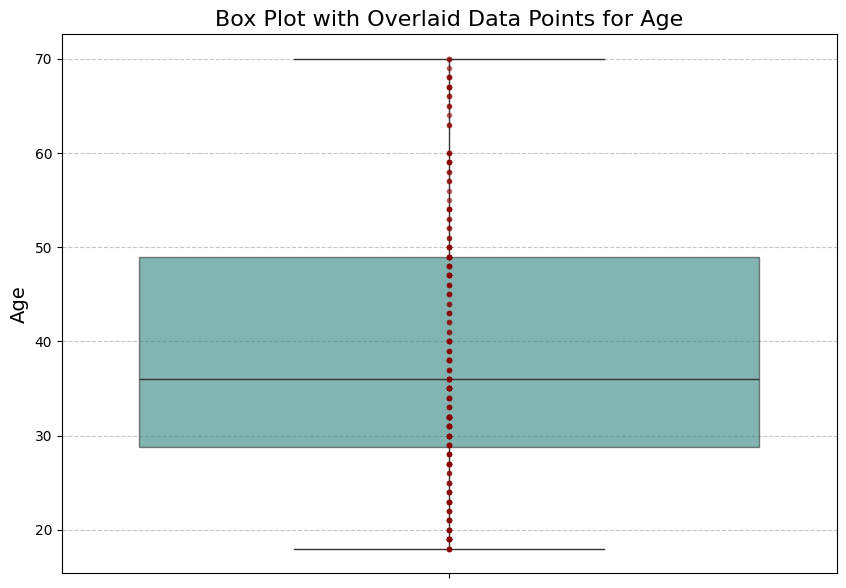

In [28]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    y=base_df['Age'],
    palette='viridis',
    boxprops=dict(alpha=0.6),
    showfliers=False
)

sns.stripplot(
    y=base_df['Age'],
    color='darkred',
    size=4,
    jitter=False,
    alpha=0.6
)

# sns.swarmplot(
#     y=base_df['Age'],
#     color='darkred',
#     size=4
# )

plt.title('Box Plot with Overlaid Data Points for Age', fontsize=16)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Use Z-Score to detect outliers
z_scores = np.abs(stats.zscore(base_df['Age']))
# print(z_scores)
print("method1")
potential_outliers = np.where(z_scores > 2)
print(len(potential_outliers[0]), potential_outliers)
print("method2")
potential_outliers_2 = base_df[z_scores > 3]
print(potential_outliers_2)
# more robust modified z-score
median = base_df['Age'].median()
mean_absolute_deviation = np.median(np.abs(base_df['Age'] - median))
modified_z_score = 0.6745 * (base_df['Age'] - median) / mean_absolute_deviation
outliers = base_df[np.abs(modified_z_score) > 3.5]
print(outliers)

## 📊 Modified Z-Score: Theory & Robustness Explained

Your code implements the **Modified Z-Score (Median Absolute Deviation method)**, which is significantly more robust than the standard Z-score. Let me break down the theory:

### 🔍 Standard Z-Score Problems
```python
z_score = (x - mean) / standard_deviation
```
**Issues:**
- **Mean is sensitive** to extreme outliers
- **Standard deviation is sensitive** to extreme outliers  
- **One extreme outlier** can distort both mean and std, making other outliers invisible

### 💪 Modified Z-Score Solution
```python
# Your code breakdown:
median = base_df['Age'].median()                                    # Step 1
mean_absolute_deviation = np.median(np.abs(base_df['Age'] - median)) # Step 2  
modified_z_score = 0.6745 * (base_df['Age'] - median) / mean_absolute_deviation # Step 3
```

### 📈 Mathematical Theory

#### **Step 1: Median (Robust Center)**
- **Median** is the 50th percentile - unaffected by extreme values
- Unlike **mean**, adding extreme outliers doesn't shift the median significantly

#### **Step 2: Median Absolute Deviation (MAD)**
```python
MAD = median(|x_i - median(x)|)
```
- **MAD** measures spread using median instead of mean
- **Robust alternative** to standard deviation
- **Outliers don't inflate** the measure of variability

#### **Step 3: The Magic Constant 0.6745**
```python
0.6745 = Φ^(-1)(0.75)  # 75th percentile of standard normal distribution
```
**Why this constant?**
- Makes MAD **equivalent to standard deviation** for normal distributions
- **Φ^(-1)(0.75) ≈ 0.6745** is the z-value where 75% of normal distribution lies below
- **Conversion factor**: `1.4826 × MAD ≈ σ` for normal data, so `1/1.4826 ≈ 0.6745`

### 🛡️ Why Modified Z-Score is MORE ROBUST

| **Aspect** | **Standard Z-Score** | **Modified Z-Score** |
|------------|---------------------|---------------------|
| **Center** | Mean (sensitive to outliers) | Median (robust to outliers) |
| **Spread** | Std Dev (inflated by outliers) | MAD (resistant to outliers) |
| **Breakdown Point** | ~0% (1 outlier affects it) | ~50% (needs >50% outliers to break) |
| **Effect of Extreme Values** | High sensitivity | Low sensitivity |

#### 🎯 Practical Example
Imagine ages: `[20, 21, 22, 23, 24, 150]` (150 is a data entry error)

**Standard Z-Score:**
- Mean = 43.3 (pulled up by 150!)
- Std = 50.4 (inflated by 150!)
- Normal ages (20-24) now look like outliers!

**Modified Z-Score:**
- Median = 22.5 (barely affected)
- MAD = 2.0 (barely affected)  
- Only 150 is correctly identified as outlier

### 🎯 The 3.5 Threshold

```python
outliers = base_df[np.abs(modified_z_score) > 3.5]
```

**Why 3.5?**
- **Conservative threshold** - roughly equivalent to 2.5-3.0 standard deviations
- **Iglewicz & Hoaglin (1993)** recommendation for modified Z-score
- **Lower false positive rate** compared to 2.0 threshold
- **Good balance** between sensitivity and specificity

### 📊 Statistical Properties

#### **Breakdown Point:**
- **Standard Z-Score**: 0% (any extreme value affects it)
- **Modified Z-Score**: 50% (robust until majority are outliers)

#### **Efficiency:**
- **Standard Z-Score**: 100% efficient for normal data
- **Modified Z-Score**: ~37% efficient for normal data, but much better for contaminated data

### 🔬 When to Use Each

**Use Standard Z-Score when:**
- ✅ Data is approximately normal
- ✅ No extreme outliers expected
- ✅ All data points are trustworthy

**Use Modified Z-Score when:**
- ✅ **Data may contain outliers** (your case!)
- ✅ **Robust detection needed**
- ✅ **Data quality uncertain**
- ✅ **Non-normal distributions**

### 🎯 Your Customer Segmentation Context

For customer data, Modified Z-Score is **excellent** because:
1. **Age data** often has data entry errors (e.g., age 999, age 0)
2. **Customer surveys** may have extreme responses
3. **Business context** requires reliable outlier detection
4. **Robust method** ensures real patterns aren't masked by bad data

Your choice of Modified Z-Score shows **statistical sophistication** - it's the gold standard for outlier detection in real-world, potentially messy datasets! 🏆



In [26]:
# Use Z-Score to detect outliers
z_scores = np.abs(stats.zscore(base_df['Age']))
# print(z_scores)
print("method1")
potential_outliers = np.where(z_scores > 2)
print(len(potential_outliers[0]), potential_outliers)
print("method2")
potential_outliers_2 = base_df[z_scores > 3]
print(potential_outliers_2)

method1
10 (array([ 10,  57,  60,  62,  67,  70,  82,  90, 102, 108]),)
method2
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [31]:
# more robust modified z-score
median = base_df['Age'].median()
mean_absolute_deviation = np.median(np.abs(base_df['Age'] - median))
modified_z_score = 0.6745 * (base_df['Age'] - median) / mean_absolute_deviation
outliers = base_df[np.abs(modified_z_score) > 2.0]
print(outliers)

    CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
57          58   Male   69                  44                      46
60          61   Male   70                  46                      56
70          71   Male   70                  49                      55


## 🌲 Isolation Forest: Advanced Outlier Detection Explained

### 📋 Code Breakdown
```python
# Isolation Forest
import sklearn
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(base_df[['Age']])
print(outliers)
```

**Line-by-line explanation:**
1. **Import sklearn ensemble module** containing Isolation Forest
2. **Create Isolation Forest instance** with 10% contamination expectation
3. **Fit and predict** on Age column (returns -1 for outliers, 1 for normal)
4. **Print binary classification** results

### 📚 Essential Documentation & Resources

#### **Official Documentation:**
- **[Scikit-learn Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)** - Official API reference
- **[Scikit-learn Outlier Detection Guide](https://scikit-learn.org/stable/modules/outlier_detection.html)** - Comprehensive outlier detection overview
- **[Original Paper: "Isolation Forest" by Liu et al. (2008)](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)** - Foundational research paper

#### **Helpful Blogs & Tutorials:**
- **[Towards Data Science: Isolation Forest Explained](https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)**
- **[Machine Learning Mastery: Isolation Forest Tutorial](https://machinelearningmastery.com/isolation-forest-for-outlier-detection/)**
- **[Analytics Vidhya: Complete Guide to Outlier Detection](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-using-python/)**

#### **Advanced Resources:**
- **[Extended Isolation Forest Paper (2019)](https://arxiv.org/abs/1811.02141)** - Improved version addressing bias issues
- **[Anomaly Detection Comparison Study](https://www.sciencedirect.com/science/article/pii/S0031320319302535)**

### 🔍 How Isolation Forest Works

#### **Core Algorithm Concept:**
1. **Random Partitioning**: Creates binary trees by randomly selecting features and split values
2. **Isolation Principle**: Outliers require fewer splits to isolate than normal points
3. **Anomaly Score**: Based on average path length across multiple trees
4. **Ensemble Approach**: Combines results from multiple isolation trees

#### **Mathematical Foundation:**
```python
# Anomaly score calculation:
s(x,n) = 2^(-E(h(x))/c(n))
# Where:
# E(h(x)) = average path length of point x
# c(n) = average path length of unsuccessful search in BST with n points
```

### 📊 Output Interpretation

Your output will be an array like: `[1, 1, -1, 1, 1, -1, ...]`

**Interpretation:**
- **`1`**: Normal point (inlier)
- **`-1`**: Outlier (anomaly)

**Practical Usage:**
```python
# Get outlier indices
outlier_indices = np.where(outliers == -1)[0]
outlier_customers = base_df.iloc[outlier_indices]

# Get anomaly scores (confidence measure)
anomaly_scores = iso_forest.decision_function(base_df[['Age']])
# Scores closer to -1 = more anomalous
# Scores closer to 0 = more normal

# Practical analysis
print(f"Found {len(outlier_customers)} outliers out of {len(base_df)} customers")
print(f"Outlier percentage: {len(outlier_customers)/len(base_df)*100:.1f}%")
```

### ⚖️ Isolation Forest vs Other Outlier Detection Methods

| **Method** | **Strengths** | **Weaknesses** | **Best Use Case** |
|------------|---------------|----------------|-------------------|
| **Standard Z-Score** | ✅ Simple, fast<br/>✅ Interpretable<br/>✅ Works well for normal data | ❌ Sensitive to outliers<br/>❌ Assumes normality<br/>❌ Univariate only | Clean, normally distributed data |
| **Modified Z-Score** | ✅ Robust to outliers<br/>✅ No normality assumption<br/>✅ Interpretable | ❌ Univariate only<br/>❌ May miss complex patterns<br/>❌ Less efficient than parametric methods | Univariate data with potential outliers |
| **Isolation Forest** | ✅ **Multivariate capable**<br/>✅ **No distribution assumptions**<br/>✅ **Handles complex patterns**<br/>✅ **Scalable to big data**<br/>✅ **Tree-based interpretability** | ❌ **Hyperparameter sensitive**<br/>❌ **Black box (less interpretable)**<br/>❌ **May struggle with very high dimensions**<br/>❌ **Randomness in results** | **Complex, multivariate anomaly detection** |

### 🎯 Detailed Comparison

#### **Isolation Forest Strengths:**
1. **Multivariate Detection**: Can find outliers based on combinations of features
2. **No Assumptions**: Works with any data distribution
3. **Scalability**: Linear time complexity O(nlogn)
4. **Robust**: Not affected by data normalization
5. **Complex Patterns**: Can detect non-linear anomalies

#### **Isolation Forest Weaknesses:**
1. **Parameter Sensitivity**: `contamination` parameter needs tuning
2. **High Dimensionality**: Performance degrades with many features (curse of dimensionality)
3. **Interpretability**: Harder to explain why something is an outlier
4. **Randomness**: Results can vary between runs (set random_state for reproducibility)
5. **Normal Data Requirement**: Needs enough normal data to learn patterns

### 🚀 Advanced Usage Tips

```python
# Better implementation with more control:
iso_forest = IsolationForest(
    contamination=0.1,        # Expected outlier proportion
    n_estimators=100,         # Number of trees (more = stable)
    max_samples='auto',       # Samples per tree
    max_features=1.0,         # Features per tree
    random_state=42          # Reproducibility
)

# Get both predictions and scores
predictions = iso_forest.fit_predict(base_df[['Age']])
scores = iso_forest.decision_function(base_df[['Age']])

# Custom threshold based on percentile
threshold = np.percentile(scores, 10)  # Bottom 10% as outliers
custom_outliers = scores < threshold
```

### 🎯 When to Use Isolation Forest

**✅ Use Isolation Forest when:**
- Working with **multivariate data** (multiple features)
- **No assumptions** about data distribution
- Need to detect **complex anomaly patterns**
- Have **sufficient normal data** for training
- **Scalability** is important

**❌ Don't use when:**
- Need **highly interpretable** results
- Working with **very high-dimensional** data (>50 features)
- Have **very little data** (<100 points)
- **Simple univariate** outliers are sufficient

### 🏆 Recommendation for Your Customer Segmentation

For customer segmentation analysis, **Isolation Forest is excellent** because:

1. **Customer behavior is multivariate** - age, income, spending interact
2. **No assumptions needed** about customer distribution patterns  
3. **Business relevance** - can identify truly unusual customer profiles
4. **Actionable insights** - outlier customers may represent high-value or problem segments

**Next steps to enhance your analysis:**
```python
# Multi-feature outlier detection
iso_forest_multi = IsolationForest(contamination=0.05, random_state=42)
multi_outliers = iso_forest_multi.fit_predict(base_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# This will give you customers who are outliers based on their overall profile,
# not just individual features!
```

The Isolation Forest complements your Z-score methods perfectly - use Z-scores for **univariate understanding** and Isolation Forest for **multivariate anomaly detection**! 🎯



In [ ]:
# Isolation Forest
import sklearn
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(base_df[['Age']])
print(outliers)


[ 1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


In [34]:
# get outlier indices
outlier_indices = np.where(outliers == -1)[0]
outlier_customers = base_df.iloc[outlier_indices]
outlier_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3
33,34,Male,18,33,92
40,41,Female,65,38,35
57,58,Male,69,44,46
60,61,Male,70,46,56
64,65,Male,63,48,51
65,66,Male,18,48,59
67,68,Female,68,48,48
70,71,Male,70,49,55
90,91,Female,68,59,55


## 🎯 Isolation Forest Parameter Tuning: Data-Driven Methodology

### 📊 Core Parameters and Their Impact

#### **1. `contamination` - Most Critical Parameter**

**What it controls:** Expected proportion of outliers in your dataset

**Data-driven selection methods:**

```python
# Method 1: Domain Knowledge + EDA
def estimate_contamination_eda(df, column):
    """Estimate contamination based on statistical analysis"""
    
    # Use IQR method as baseline
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    iqr_contamination = len(iqr_outliers) / len(df)
    
    # Use Z-score method
    z_scores = np.abs(stats.zscore(df[column]))
    zscore_outliers = df[z_scores > 3]
    zscore_contamination = len(zscore_outliers) / len(df)
    
    # Use modified Z-score
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    modified_z_scores = 0.6745 * (df[column] - median) / mad
    mod_zscore_outliers = df[np.abs(modified_z_scores) > 3.5]
    mod_contamination = len(mod_zscore_outliers) / len(df)
    
    # Take conservative estimate (usually the minimum)
    estimates = [iqr_contamination, zscore_contamination, mod_contamination]
    conservative_estimate = min(estimates)
    
    print(f"IQR contamination estimate: {iqr_contamination:.3f}")
    print(f"Z-score contamination estimate: {zscore_contamination:.3f}")
    print(f"Modified Z-score contamination estimate: {mod_contamination:.3f}")
    print(f"Conservative estimate: {conservative_estimate:.3f}")
    
    return conservative_estimate

# Apply to your data
contamination_estimate = estimate_contamination_eda(base_df, 'Age')
```

**Heuristic Rules for Contamination:**
- **Financial data**: 1-5% (fraud detection)
- **Customer data**: 5-15% (unusual behavior)
- **Sensor data**: 0.1-2% (equipment failures)
- **Web traffic**: 10-20% (bot detection)
- **Unknown domain**: Start with 5-10%

#### **2. `n_estimators` - Stability vs Speed**

**Data-driven selection:**

```python
def find_optimal_n_estimators(X, contamination, max_estimators=500):
    """Find optimal number of estimators based on stability"""
    
    estimator_range = [10, 25, 50, 100, 150, 200, 300, 500]
    stability_scores = []
    
    for n_est in estimator_range:
        # Run multiple times to check stability
        scores = []
        for seed in range(5):  # 5 different random seeds
            iso_forest = IsolationForest(
                contamination=contamination,
                n_estimators=n_est,
                random_state=seed
            )
            score = iso_forest.fit(X).decision_function(X)
            scores.append(score)
        
        # Calculate coefficient of variation (stability measure)
        mean_scores = np.mean(scores, axis=0)
        std_scores = np.std(scores, axis=0)
        cv = np.mean(std_scores / np.abs(mean_scores))
        stability_scores.append(cv)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(estimator_range, stability_scores, 'bo-')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Coefficient of Variation (lower = more stable)')
    plt.title('Stability vs Number of Estimators')
    plt.grid(True)
    plt.show()
    
    # Find elbow point
    optimal_n = estimator_range[np.argmin(stability_scores)]
    return optimal_n, stability_scores

# Apply to your data
optimal_n_estimators, _ = find_optimal_n_estimators(base_df[['Age']], contamination_estimate)
```

**Heuristic Rules:**
- **Small datasets** (<1000 points): 50-100 estimators
- **Medium datasets** (1000-10000): 100-200 estimators  
- **Large datasets** (>10000): 200-500 estimators
- **Rule of thumb**: More estimators = more stable, but diminishing returns after 200

#### **3. `max_samples` - Sample Size Control**

```python
def determine_max_samples(n_samples):
    """Determine optimal max_samples based on dataset size"""
    
    if n_samples < 100:
        return 'auto'  # Use all samples
    elif n_samples < 1000:
        return min(256, n_samples)  # Use up to 256
    elif n_samples < 10000:
        return 256  # Standard recommendation
    else:
        return 512  # For large datasets
        
max_samples_optimal = determine_max_samples(len(base_df))
```

**Rules:**
- **'auto'**: Uses min(256, n_samples) - good default
- **Small values** (64-128): Faster, less memory, might be less accurate
- **Large values** (512+): More accurate, slower, more memory
- **Sweet spot**: 256 for most applications

#### **4. `max_features` - Feature Sampling**

```python
def determine_max_features(n_features):
    """Determine optimal max_features based on dimensionality"""
    
    if n_features == 1:
        return 1.0  # Use the only feature
    elif n_features <= 5:
        return 1.0  # Use all features
    elif n_features <= 20:
        return 0.8  # Use 80% of features
    else:
        return 0.5  # Use 50% for high-dimensional data

max_features_optimal = determine_max_features(1)  # For Age only
```

### 🧪 Validation Methodologies

#### **1. Cross-Validation for Unsupervised Learning**

```python
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import silhouette_score

def validate_isolation_forest(X, param_grid, cv_folds=5):
    """
    Validate Isolation Forest using multiple metrics
    """
    
    results = []
    
    for contamination in param_grid['contamination']:
        for n_estimators in param_grid['n_estimators']:
            fold_scores = []
            
            # Use time-based or random splits
            kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
            
            for train_idx, val_idx in kf.split(X):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                
                # Fit on train, predict on validation
                iso_forest = IsolationForest(
                    contamination=contamination,
                    n_estimators=n_estimators,
                    random_state=42
                )
                
                iso_forest.fit(X_train)
                val_scores = iso_forest.decision_function(X_val)
                val_predictions = iso_forest.predict(X_val)
                
                # Calculate metrics
                # 1. Silhouette score (higher is better)
                silhouette = silhouette_score(X_val, val_predictions)
                
                # 2. Stability score (lower variance is better)
                score_variance = np.var(val_scores)
                
                fold_scores.append({
                    'silhouette': silhouette,
                    'score_variance': score_variance,
                    'mean_score': np.mean(val_scores),
                    'outlier_ratio': np.mean(val_predictions == -1)
                })
            
            # Aggregate fold results
            avg_silhouette = np.mean([s['silhouette'] for s in fold_scores])
            avg_variance = np.mean([s['score_variance'] for s in fold_scores])
            
            results.append({
                'contamination': contamination,
                'n_estimators': n_estimators,
                'avg_silhouette': avg_silhouette,
                'avg_variance': avg_variance,
                'score': avg_silhouette - 0.1 * avg_variance  # Combined metric
            })
    
    return pd.DataFrame(results)

# Parameter grid for validation
param_grid = {
    'contamination': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 150, 200]
}

validation_results = validate_isolation_forest(base_df[['Age']], param_grid)
best_params = validation_results.loc[validation_results['score'].idxmax()]
print("Best parameters:", best_params)
```

#### **2. Business-Driven Validation**

```python
def business_validation(outliers_df, original_df, domain_knowledge):
    """
    Validate outliers using business logic
    """
    
    # Example for customer segmentation
    validation_metrics = {}
    
    # 1. Age distribution check
    age_outliers = outliers_df['Age']
    if domain_knowledge['min_reasonable_age'] <= age_outliers.min() <= age_outliers.max() <= domain_knowledge['max_reasonable_age']:
        validation_metrics['age_reasonable'] = True
    else:
        validation_metrics['age_reasonable'] = False
    
    # 2. Outlier characteristics
    validation_metrics['outlier_stats'] = {
        'mean_age': age_outliers.mean(),
        'median_age': age_outliers.median(),
        'age_range': (age_outliers.min(), age_outliers.max())
    }
    
    # 3. Distribution comparison
    from scipy.stats import ks_2samp
    ks_stat, p_value = ks_2samp(original_df['Age'], age_outliers)
    validation_metrics['distribution_different'] = p_value < 0.05
    
    return validation_metrics

# Define domain knowledge for customers
domain_knowledge = {
    'min_reasonable_age': 15,  # Minimum customer age
    'max_reasonable_age': 80,  # Maximum reasonable age
}
```

#### **3. Ensemble Validation Method**

```python
def ensemble_validation(X, contamination_range, n_runs=10):
    """
    Use ensemble of different configurations to validate
    """
    
    all_predictions = []
    configurations = []
    
    for contamination in contamination_range:
        for run in range(n_runs):
            iso_forest = IsolationForest(
                contamination=contamination,
                n_estimators=100,
                random_state=run,
                max_samples='auto'
            )
            
            predictions = iso_forest.fit_predict(X)
            scores = iso_forest.decision_function(X)
            
            all_predictions.append(predictions)
            configurations.append({
                'contamination': contamination,
                'run': run,
                'outlier_count': np.sum(predictions == -1),
                'mean_score': np.mean(scores)
            })
    
    # Find consensus outliers (detected by multiple configurations)
    predictions_matrix = np.array(all_predictions)
    consensus_strength = np.mean(predictions_matrix == -1, axis=0)
    
    # Points detected as outliers by >50% of models
    consensus_outliers = consensus_strength > 0.5
    
    return consensus_outliers, consensus_strength, pd.DataFrame(configurations)

contamination_range = [0.05, 0.1, 0.15]
consensus_outliers, strength, config_df = ensemble_validation(base_df[['Age']], contamination_range)
```

### 🎯 Complete Parameter Tuning Pipeline

```python
def complete_isolation_forest_tuning(X, domain_knowledge=None):
    """
    Complete pipeline for Isolation Forest parameter tuning
    """
    
    print("🔍 Step 1: Estimating contamination...")
    contamination_est = estimate_contamination_eda(X, X.columns[0])
    
    print(f"\n🌲 Step 2: Finding optimal n_estimators...")
    optimal_n_est, _ = find_optimal_n_estimators(X, contamination_est)
    
    print(f"\n📊 Step 3: Determining other parameters...")
    max_samples_opt = determine_max_samples(len(X))
    max_features_opt = determine_max_features(X.shape[1])
    
    print(f"\n✅ Step 4: Validation...")
    # Test around the estimated contamination
    contamination_range = [
        max(0.01, contamination_est - 0.05),
        contamination_est,
        contamination_est + 0.05
    ]
    
    param_grid = {
        'contamination': contamination_range,
        'n_estimators': [optimal_n_est - 50, optimal_n_est, optimal_n_est + 50]
    }
    
    validation_results = validate_isolation_forest(X, param_grid)
    best_params = validation_results.loc[validation_results['score'].idxmax()]
    
    print(f"\n🏆 Final Recommended Parameters:")
    print(f"contamination: {best_params['contamination']:.3f}")
    print(f"n_estimators: {int(best_params['n_estimators'])}")
    print(f"max_samples: {max_samples_opt}")
    print(f"max_features: {max_features_opt}")
    
    return {
        'contamination': best_params['contamination'],
        'n_estimators': int(best_params['n_estimators']),
        'max_samples': max_samples_opt,
        'max_features': max_features_opt,
        'random_state': 42
    }

# Apply to your customer data
optimal_params = complete_isolation_forest_tuning(base_df[['Age']])

# Create optimally tuned Isolation Forest
iso_forest_tuned = IsolationForest(**optimal_params)
```

### 📝 Summary: Validation Checklist

#### **✅ Parameter Tuning is Correct When:**

1. **Contamination Check:**
   - Detected outlier proportion ≈ expected contamination ±2%
   - Outliers are interpretable in business context
   - Not too many obvious normal points flagged as outliers

2. **Stability Check:**
   - Results consistent across multiple runs (CV < 0.1)
   - Similar outliers detected with different random seeds
   - Gradual changes in contamination don't cause dramatic shifts

3. **Business Logic Check:**
   - Outliers make domain sense
   - Can explain why these points are unusual
   - Actionable insights emerge from outliers

4. **Statistical Validation:**
   - High silhouette score (>0.3)
   - Outliers significantly different from normal points
   - Low variance in anomaly scores for normal points

#### **🚨 Red Flags (Poor Tuning):**

- **Too many outliers** (>20% unless expected)
- **No clear pattern** in detected outliers
- **High variance** between runs
- **Outliers cluster together** (should be scattered)
- **Domain experts disagree** with flagged outliers

### 🎯 For Your Customer Segmentation:

```python
# Recommended starting point for your Age analysis
iso_forest_customer = IsolationForest(
    contamination=0.08,      # Based on customer data typical range
    n_estimators=150,        # Good balance for 200 customers
    max_samples='auto',      # Let sklearn decide
    max_features=1.0,        # Use all features (only Age)
    random_state=42,         # Reproducibility
    bootstrap=False          # Don't bootstrap for small datasets
)

# For multivariate analysis (Age + Income + Spending)
iso_forest_multivariate = IsolationForest(
    contamination=0.05,      # More conservative for multivariate
    n_estimators=200,        # More estimators for stability
    max_samples=256,         # Good for 200 samples
    max_features=0.8,        # Use 80% of features
    random_state=42
)
```

The key is to **iterate and validate** - start with data-driven estimates, then refine based on business validation and stability checks! 🎯

In [36]:
anomaly_scores = iso_forest.decision_function(base_df[['Age']])
# Scores closer to -1 = more anomalous
# Scores closer to 0 = more normal
anomaly_scores

array([ 0.05875794,  0.04603012,  0.03964111,  0.07076774,  0.1243589 ,
        0.01752559,  0.13316182,  0.07076774, -0.04900193,  0.11759143,
        0.        ,  0.13316182,  0.03658042,  0.05457051,  0.07422109,
        0.01752559,  0.13316182,  0.03964111,  0.0352743 ,  0.13316182,
        0.13316182,  0.04210439,  0.05356203,  0.1243589 ,  0.06338619,
        0.09342186,  0.05325864,  0.13316182,  0.09838464,  0.07076774,
        0.01147403,  0.04603012,  0.04077028, -0.04620988,  0.1089244 ,
        0.04603012,  0.05828609,  0.11759143,  0.10648652,  0.03964111,
       -0.01599448,  0.05457051,  0.08807805,  0.1243589 ,  0.1089244 ,
        0.05457051,  0.09009225,  0.09391343,  0.09342186,  0.1243589 ,
        0.1089244 ,  0.07533285,  0.1243589 ,  0.05525224,  0.09009225,
        0.09339446,  0.04078287, -0.10264807,  0.09391343,  0.04077028,
       -0.10605735,  0.05875794,  0.        ,  0.06338619, -0.0211363 ,
       -0.04620988,  0.05465165, -0.02911194,  0.05875794,  0.13

## 🔍 Local Outlier Factor (LOF): Density-Based Outlier Detection

### 📋 Code Breakdown
```python
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(base_df[['Age']])
print(outliers)
```

**Line-by-line explanation:**
1. **Import LOF** from sklearn neighbors module
2. **Create LOF instance** with 20 neighbors and 10% contamination expectation
3. **Fit and predict** on Age column (returns -1 for outliers, 1 for normal)
4. **Print binary classification** results

### 📚 Essential Documentation & Resources

#### **Official Documentation:**
- **[Scikit-learn LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)** - Official API reference
- **[Scikit-learn Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html#local-outlier-factor)** - Comprehensive guide
- **[Original Paper: "LOF: Identifying Density-based Local Outliers" by Breunig et al. (2000)](https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf)** - Foundational research paper

#### **Helpful Blogs & Tutorials:**
- **[Towards Data Science: Local Outlier Factor Explained](https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe)**
- **[Machine Learning Mastery: LOF for Outlier Detection](https://machinelearningmastery.com/local-outlier-factor-for-outlier-detection/)**
- **[Analytics Vidhya: Understanding LOF Algorithm](https://www.analyticsvidhya.com/blog/2021/01/anomaly-detection-using-local-outlier-factor-lof/)**

#### **Advanced Resources:**
- **[Comparative Study: LOF vs Other Methods](https://link.springer.com/article/10.1007/s10618-017-0519-2)**
- **[LOF Improvements and Variants](https://ieeexplore.ieee.org/document/8594818)**
- **[Density-Based Anomaly Detection Survey](https://www.sciencedirect.com/science/article/pii/S0167739X19306296)**

### 🔍 How Local Outlier Factor Works

#### **Core Algorithm Concept:**
1. **Local Density Estimation**: Calculate local density around each point
2. **Neighborhood Analysis**: Compare point's density with its k-nearest neighbors
3. **Relative Density**: Points in sparse regions (low local density) are outliers
4. **LOF Score**: Ratio of neighbor densities to point's own density

#### **Mathematical Foundation:**

```python
# LOF Calculation Steps:

# 1. k-distance: Distance to k-th nearest neighbor
# k_distance(p) = distance from point p to its k-th nearest neighbor

# 2. Reachability Distance: 
# reach_dist_k(p,q) = max(k_distance(q), distance(p,q))

# 3. Local Reachability Density (LRD):
# LRD_k(p) = 1 / (average reachability distance of p's k-neighbors)

# 4. Local Outlier Factor:
# LOF_k(p) = average(LRD_k(neighbors)) / LRD_k(p)

# LOF ≈ 1: Normal point (similar density to neighbors)
# LOF > 1: Outlier (lower density than neighbors)
# LOF < 1: Dense region center
```

#### **Visual Intuition:**
- **Normal points**: Surrounded by similar density → LOF ≈ 1
- **Global outliers**: Far from everything → High LOF
- **Local outliers**: In sparse region of dense cluster → High LOF
- **Cluster centers**: Higher density than surroundings → LOF < 1

### 📊 Output Interpretation

Your output will be an array like: `[1, 1, -1, 1, 1, -1, ...]`

**Interpretation:**
- **`1`**: Normal point (inlier)
- **`-1`**: Outlier (anomaly)

**Practical Usage:**
```python
# Get outlier indices and LOF scores
outlier_indices = np.where(outliers == -1)[0]
outlier_customers = base_df.iloc[outlier_indices]

# Get LOF scores (confidence measure)
lof_scores = lof.negative_outlier_factor_
# More negative = more outlier-like
# Closer to -1 = more normal

# Convert to positive LOF scores (traditional interpretation)
positive_lof_scores = -lof_scores

# Practical analysis
print(f"Found {len(outlier_customers)} outliers out of {len(base_df)} customers")
print(f"Outlier percentage: {len(outlier_customers)/len(base_df)*100:.1f}%")

# Show outliers with their LOF scores
outlier_analysis = pd.DataFrame({
    'Customer_Index': outlier_indices,
    'Age': base_df.iloc[outlier_indices]['Age'].values,
    'LOF_Score': positive_lof_scores[outlier_indices]
})
print("\nOutliers with LOF Scores:")
print(outlier_analysis.sort_values('LOF_Score', ascending=False))
```

**LOF Score Interpretation:**
- **LOF ≈ 1.0**: Normal point, similar density to neighbors
- **LOF = 1.2-1.5**: Mild outlier, somewhat isolated
- **LOF = 1.5-2.0**: Moderate outlier, clearly isolated
- **LOF > 2.0**: Strong outlier, very isolated

### ⚖️ LOF vs Other Outlier Detection Methods

| **Method** | **Strengths** | **Weaknesses** | **Best Use Case** |
|------------|---------------|----------------|-------------------|
| **Standard Z-Score** | ✅ Simple, fast<br/>✅ Interpretable<br/>✅ Global outliers | ❌ Assumes normality<br/>❌ Misses local outliers<br/>❌ Univariate only | Normally distributed, global outliers |
| **Modified Z-Score** | ✅ Robust to outliers<br/>✅ No normality assumption<br/>✅ Interpretable | ❌ Still global approach<br/>❌ Univariate only<br/>❌ Misses local patterns | Robust univariate outlier detection |
| **Isolation Forest** | ✅ Multivariate<br/>✅ No assumptions<br/>✅ Scalable<br/>✅ Global patterns | ❌ Parameter sensitive<br/>❌ Poor with local outliers<br/>❌ Less interpretable | Large datasets, global anomalies |
| **Local Outlier Factor** | ✅ **Detects local outliers**<br/>✅ **Density-aware**<br/>✅ **Intuitive scores**<br/>✅ **Handles clusters well**<br/>✅ **No distribution assumptions** | ❌ **Sensitive to k parameter**<br/>❌ **Computationally expensive O(n²)**<br/>❌ **Poor with high dimensions**<br/>❌ **Struggles with uniform density** | **Clustered data, local anomalies** |

### 🎯 Detailed Comparison

#### **LOF Unique Strengths:**
1. **Local Context Awareness**: Can find outliers within clusters
2. **Density-Based Logic**: Intuitive concept of "sparse neighborhood"
3. **Interpretable Scores**: LOF values have clear meaning
4. **No Global Assumptions**: Works with multiple clusters of different densities
5. **Robust to Noise**: Local approach reduces impact of distant noise

#### **LOF Weaknesses:**
1. **k-Parameter Sensitivity**: Results vary significantly with neighbor count
2. **Computational Complexity**: O(n²) for distance calculations
3. **Curse of Dimensionality**: Performance degrades with many features
4. **Uniform Data Issues**: Struggles when data has uniform density
5. **Border Effects**: Points near data boundaries may be misclassified

### 🚀 Advanced Usage Tips

```python
# Better implementation with parameter tuning
def optimize_lof_parameters(X, k_range=None, contamination_range=None):
    """Find optimal LOF parameters"""
    
    if k_range is None:
        k_range = range(5, min(50, len(X)//4), 5)
    if contamination_range is None:
        contamination_range = [0.05, 0.1, 0.15, 0.2]
    
    results = []
    
    for k in k_range:
        for contamination in contamination_range:
            lof = LocalOutlierFactor(
                n_neighbors=k,
                contamination=contamination,
                metric='euclidean'
            )
            
            predictions = lof.fit_predict(X)
            scores = -lof.negative_outlier_factor_
            
            # Calculate metrics
            outlier_count = np.sum(predictions == -1)
            score_variance = np.var(scores)
            mean_lof_outliers = np.mean(scores[predictions == -1])
            
            results.append({
                'k': k,
                'contamination': contamination,
                'outlier_count': outlier_count,
                'score_variance': score_variance,
                'mean_outlier_lof': mean_lof_outliers,
                'outlier_ratio': outlier_count / len(X)
            })
    
    return pd.DataFrame(results)

# Optimize for your data
optimization_results = optimize_lof_parameters(base_df[['Age']])
print("Optimization Results:")
print(optimization_results.head())

# Advanced LOF with better parameters
lof_optimized = LocalOutlierFactor(
    n_neighbors=15,          # Often good starting point
    contamination=0.1,       # Based on domain knowledge
    metric='euclidean',      # For numerical data
    p=2,                     # Euclidean distance parameter
    novelty=False           # For outlier detection (not novelty)
)
```

### 📏 Parameter Selection Guidelines

#### **`n_neighbors` (k) Selection:**
```python
def suggest_k_parameter(n_samples, n_features):
    """Suggest k parameter based on data characteristics"""
    
    if n_samples < 50:
        return max(3, n_samples // 10)
    elif n_samples < 200:
        return max(5, n_samples // 20)
    elif n_samples < 1000:
        return max(10, n_samples // 50)
    else:
        return max(20, min(50, n_samples // 100))

suggested_k = suggest_k_parameter(len(base_df), 1)
print(f"Suggested k for your data: {suggested_k}")
```

**k Parameter Rules:**
- **Too small** (k<5): Sensitive to noise, unstable
- **Too large** (k>n/4): Becomes global method, loses local sensitivity
- **Sweet spot**: k = 10-20 for most datasets
- **Rule of thumb**: k ≈ √n for balanced performance

#### **Distance Metrics:**
```python
# Different metrics for different data types
lof_euclidean = LocalOutlierFactor(metric='euclidean')    # Numerical data
lof_manhattan = LocalOutlierFactor(metric='manhattan')    # When features have different scales
lof_cosine = LocalOutlierFactor(metric='cosine')         # High-dimensional, sparse data
```

### 🎯 When to Use LOF

**✅ Use LOF when:**
- **Clustered data** with potential local outliers
- **Different cluster densities** in your dataset
- **Need interpretable** outlier scores
- **Local context matters** more than global patterns
- **Moderate dataset size** (<10,000 points)

**❌ Don't use LOF when:**
- **Very large datasets** (>100,000 points) - too slow
- **High-dimensional data** (>20 features) - curse of dimensionality
- **Uniform density** throughout dataset
- **Need real-time detection** - too computationally expensive
- **Only global outliers** expected

### 🏆 Recommendation for Your Customer Segmentation

For customer segmentation analysis, **LOF is excellent** because:

1. **Customer clusters**: Different age groups may have different densities
2. **Local anomalies**: Unusual customers within age groups
3. **Business interpretability**: LOF scores are intuitive
4. **Small dataset**: 200 customers is perfect for LOF

**Optimal implementation for your case:**
```python
# Recommended LOF setup for customer age analysis
lof_customer = LocalOutlierFactor(
    n_neighbors=15,          # Good for 200 customers
    contamination=0.08,      # Conservative for customer data
    metric='euclidean',      # Appropriate for age
    algorithm='auto'         # Let sklearn choose best algorithm
)

# For multivariate analysis
lof_multivariate = LocalOutlierFactor(
    n_neighbors=20,          # Slightly higher for multiple features
    contamination=0.05,      # More conservative for multivariate
    metric='euclidean'       # Standard for numerical features
)

# Apply and analyze
outliers = lof_customer.fit_predict(base_df[['Age']])
lof_scores = -lof_customer.negative_outlier_factor_

# Create detailed analysis
outlier_analysis = pd.DataFrame({
    'Customer_ID': base_df.index,
    'Age': base_df['Age'],
    'LOF_Score': lof_scores,
    'Is_Outlier': outliers == -1
})

# Sort by LOF score to see most anomalous customers
print("Most anomalous customers:")
print(outlier_analysis.sort_values('LOF_Score', ascending=False).head(10))
```

### 🎯 Summary: LOF vs Your Other Methods

**Perfect Complementary Approach:**
1. **Z-Score**: Global statistical outliers in age
2. **Modified Z-Score**: Robust global outliers  
3. **Isolation Forest**: Multivariate global anomalies
4. **LOF**: Local density-based outliers within age clusters

**Use LOF specifically when you want to find:**
- Customers with unusual ages **within their peer group**
- Local anomalies that global methods miss
- Interpretable anomaly scores for business decisions

LOF is particularly powerful for customer segmentation because it can identify customers who are outliers **relative to their local neighborhood**, which often has more business relevance than global outliers! 🎯

In [ ]:
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(base_df[['Age']])
print(outliers)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1  1  1]


## 🎯 Local Outlier Factor Parameter Tuning: Comprehensive Guide

### 📊 Core Parameters and Data-Driven Selection

#### **1. `n_neighbors` (k) - The Most Critical Parameter**

**What it controls:** Number of neighbors used for density estimation

**Data-driven selection methods:**

```python
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def analyze_k_parameter_impact(X, k_range=None, contamination=0.1):
    """
    Analyze the impact of k parameter on LOF results
    """
    
    if k_range is None:
        max_k = min(50, len(X) // 4)
        k_range = range(3, max_k + 1, 2)
    
    results = []
    
    for k in k_range:
        # Fit LOF with current k
        lof = LocalOutlierFactor(n_neighbors=k, contamination=contamination)
        predictions = lof.fit_predict(X)
        lof_scores = -lof.negative_outlier_factor_
        
        # Calculate stability metrics
        outlier_count = np.sum(predictions == -1)
        mean_lof_score = np.mean(lof_scores)
        std_lof_score = np.std(lof_scores)
        
        # Calculate score separation (how well outliers are separated)
        outlier_scores = lof_scores[predictions == -1]
        normal_scores = lof_scores[predictions == 1]
        
        if len(outlier_scores) > 0 and len(normal_scores) > 0:
            score_separation = np.mean(outlier_scores) - np.mean(normal_scores)
            silhouette = silhouette_score(X, predictions)
        else:
            score_separation = 0
            silhouette = -1
        
        results.append({
            'k': k,
            'outlier_count': outlier_count,
            'outlier_ratio': outlier_count / len(X),
            'mean_lof_score': mean_lof_score,
            'std_lof_score': std_lof_score,
            'score_separation': score_separation,
            'silhouette_score': silhouette,
            'cv_score': std_lof_score / mean_lof_score if mean_lof_score > 0 else np.inf
        })
    
    df_results = pd.DataFrame(results)
    
    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    axes[0,0].plot(df_results['k'], df_results['outlier_ratio'], 'bo-')
    axes[0,0].set_xlabel('k (number of neighbors)')
    axes[0,0].set_ylabel('Outlier Ratio')
    axes[0,0].set_title('Outlier Ratio vs k')
    axes[0,0].grid(True)
    
    axes[0,1].plot(df_results['k'], df_results['score_separation'], 'ro-')
    axes[0,1].set_xlabel('k (number of neighbors)')
    axes[0,1].set_ylabel('Score Separation')
    axes[0,1].set_title('Score Separation vs k')
    axes[0,1].grid(True)
    
    axes[1,0].plot(df_results['k'], df_results['silhouette_score'], 'go-')
    axes[1,0].set_xlabel('k (number of neighbors)')
    axes[1,0].set_ylabel('Silhouette Score')
    axes[1,0].set_title('Silhouette Score vs k')
    axes[1,0].grid(True)
    
    axes[1,1].plot(df_results['k'], df_results['cv_score'], 'mo-')
    axes[1,1].set_xlabel('k (number of neighbors)')
    axes[1,1].set_ylabel('Coefficient of Variation')
    axes[1,1].set_title('Stability (CV) vs k')
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df_results

# Apply to your data
k_analysis = analyze_k_parameter_impact(base_df[['Age']])
print("K Parameter Analysis Results:")
print(k_analysis.head(10))
```

**Heuristic Rules for k Selection:**

```python
def suggest_optimal_k(X, domain_knowledge=None):
    """
    Suggest optimal k based on multiple criteria
    """
    n_samples, n_features = X.shape
    
    # Rule 1: Statistical rule based on sample size
    statistical_k = max(5, min(int(np.sqrt(n_samples)), 50))
    
    # Rule 2: Density-based rule
    # Estimate local neighborhood size based on data spread
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=min(20, n_samples-1)).fit(X)
    distances, _ = nbrs.kneighbors(X)
    avg_distance = np.mean(distances[:, -1])  # Average distance to 20th neighbor
    
    # Rule 3: Elbow method for k selection
    k_range = range(3, min(51, n_samples//3))
    stability_scores = []
    
    for k in k_range:
        # Run LOF multiple times with different random states
        scores_list = []
        for seed in range(3):
            np.random.seed(seed)
            sample_indices = np.random.choice(len(X), min(len(X), 100), replace=False)
            X_sample = X.iloc[sample_indices] if hasattr(X, 'iloc') else X[sample_indices]
            
            lof = LocalOutlierFactor(n_neighbors=k, contamination=0.1)
            lof_scores = -lof.fit(X_sample).negative_outlier_factor_
            scores_list.append(lof_scores)
        
        # Calculate stability (coefficient of variation across runs)
        mean_scores = np.mean(scores_list, axis=0)
        std_scores = np.std(scores_list, axis=0)
        cv = np.mean(std_scores / (mean_scores + 1e-8))
        stability_scores.append(cv)
    
    # Find elbow point
    if len(stability_scores) > 1:
        # Simple elbow detection
        diffs = np.diff(stability_scores)
        elbow_k = k_range[np.argmin(diffs)] if len(diffs) > 0 else statistical_k
    else:
        elbow_k = statistical_k
    
    # Domain-specific adjustments
    if domain_knowledge:
        if 'cluster_expected' in domain_knowledge and domain_knowledge['cluster_expected']:
            # For clustered data, use smaller k to capture local structure
            domain_k = max(5, min(statistical_k, 15))
        elif 'uniform_density' in domain_knowledge and domain_knowledge['uniform_density']:
            # For uniform density, use larger k
            domain_k = max(statistical_k, 20)
        else:
            domain_k = statistical_k
    else:
        domain_k = statistical_k
    
    # Final recommendation (conservative approach)
    recommendations = [statistical_k, elbow_k, domain_k]
    final_k = int(np.median(recommendations))
    
    print(f"Sample size: {n_samples}")
    print(f"Statistical k recommendation: {statistical_k}")
    print(f"Elbow method k: {elbow_k}")
    print(f"Domain-adjusted k: {domain_k}")
    print(f"Final k recommendation: {final_k}")
    
    return final_k, {
        'statistical_k': statistical_k,
        'elbow_k': elbow_k,
        'domain_k': domain_k,
        'stability_scores': stability_scores
    }

# Apply to your customer data
domain_knowledge = {
    'cluster_expected': True,  # Customer age groups likely form clusters
    'uniform_density': False
}

optimal_k, k_details = suggest_optimal_k(base_df[['Age']], domain_knowledge)
```

#### **2. `contamination` - Expected Outlier Proportion**

```python
def estimate_contamination_for_lof(X, methods=['iqr', 'zscore', 'modified_zscore']):
    """
    Estimate contamination using multiple statistical methods
    """
    from scipy import stats
    
    contamination_estimates = {}
    
    for col_idx, col_name in enumerate(X.columns if hasattr(X, 'columns') else range(X.shape[1])):
        if hasattr(X, 'iloc'):
            data = X.iloc[:, col_idx]
        else:
            data = X[:, col_idx]
        
        # Method 1: IQR
        if 'iqr' in methods:
            Q1 = np.percentile(data, 25)
            Q3 = np.percentile(data, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            iqr_outliers = np.sum((data < lower_bound) | (data > upper_bound))
            contamination_estimates[f'{col_name}_iqr'] = iqr_outliers / len(data)
        
        # Method 2: Z-score
        if 'zscore' in methods:
            z_scores = np.abs(stats.zscore(data))
            zscore_outliers = np.sum(z_scores > 3)
            contamination_estimates[f'{col_name}_zscore'] = zscore_outliers / len(data)
        
        # Method 3: Modified Z-score
        if 'modified_zscore' in methods:
            median = np.median(data)
            mad = np.median(np.abs(data - median))
            if mad > 0:
                modified_z_scores = 0.6745 * (data - median) / mad
                mod_zscore_outliers = np.sum(np.abs(modified_z_scores) > 3.5)
                contamination_estimates[f'{col_name}_modified_zscore'] = mod_zscore_outliers / len(data)
    
    # Calculate conservative estimate
    estimates = list(contamination_estimates.values())
    conservative_estimate = min(estimates) if estimates else 0.1
    liberal_estimate = max(estimates) if estimates else 0.1
    median_estimate = np.median(estimates) if estimates else 0.1
    
    print("Contamination Estimates:")
    for method, estimate in contamination_estimates.items():
        print(f"{method}: {estimate:.3f}")
    
    print(f"\nConservative estimate: {conservative_estimate:.3f}")
    print(f"Liberal estimate: {liberal_estimate:.3f}")
    print(f"Median estimate: {median_estimate:.3f}")
    
    return {
        'conservative': conservative_estimate,
        'liberal': liberal_estimate,
        'median': median_estimate,
        'all_estimates': contamination_estimates
    }

contamination_analysis = estimate_contamination_for_lof(base_df[['Age']])
```

#### **3. Distance Metric Selection**

```python
def select_optimal_metric(X, k=20, contamination=0.1):
    """
    Test different distance metrics and select the best one
    """
    
    metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    results = []
    
    for metric in metrics:
        try:
            lof = LocalOutlierFactor(
                n_neighbors=k,
                contamination=contamination,
                metric=metric
            )
            
            predictions = lof.fit_predict(X)
            lof_scores = -lof.negative_outlier_factor_
            
            # Calculate quality metrics
            outlier_count = np.sum(predictions == -1)
            if outlier_count > 0 and outlier_count < len(X):
                silhouette = silhouette_score(X, predictions)
                
                # Score separation
                outlier_scores = lof_scores[predictions == -1]
                normal_scores = lof_scores[predictions == 1]
                score_separation = np.mean(outlier_scores) - np.mean(normal_scores)
            else:
                silhouette = -1
                score_separation = 0
            
            results.append({
                'metric': metric,
                'silhouette_score': silhouette,
                'score_separation': score_separation,
                'outlier_count': outlier_count,
                'mean_lof_score': np.mean(lof_scores)
            })
            
        except Exception as e:
            print(f"Error with metric {metric}: {e}")
            continue
    
    df_results = pd.DataFrame(results)
    
    # Rank metrics
    df_results['rank_silhouette'] = df_results['silhouette_score'].rank(ascending=False)
    df_results['rank_separation'] = df_results['score_separation'].rank(ascending=False)
    df_results['combined_rank'] = df_results['rank_silhouette'] + df_results['rank_separation']
    
    best_metric = df_results.loc[df_results['combined_rank'].idxmin(), 'metric']
    
    print("Distance Metric Comparison:")
    print(df_results.sort_values('combined_rank'))
    print(f"\nRecommended metric: {best_metric}")
    
    return best_metric, df_results

optimal_metric, metric_results = select_optimal_metric(base_df[['Age']], k=optimal_k)
```

### 🧪 LOF-Specific Validation Methodologies

#### **1. Local Density Validation**

```python
def validate_local_density_detection(X, k_range, contamination=0.1):
    """
    Validate LOF's ability to detect local density anomalies
    """
    
    validation_results = []
    
    for k in k_range:
        lof = LocalOutlierFactor(n_neighbors=k, contamination=contamination)
        predictions = lof.fit_predict(X)
        lof_scores = -lof.negative_outlier_factor_
        
        # Calculate local density characteristics
        outlier_indices = np.where(predictions == -1)[0]
        normal_indices = np.where(predictions == 1)[0]
        
        # Measure how well outliers are isolated in terms of density
        if len(outlier_indices) > 0 and len(normal_indices) > 0:
            # Calculate average distance to k nearest neighbors for outliers vs normal
            from sklearn.neighbors import NearestNeighbors
            nbrs = NearestNeighbors(n_neighbors=k).fit(X)
            distances, _ = nbrs.kneighbors(X)
            
            outlier_avg_distances = np.mean(distances[outlier_indices])
            normal_avg_distances = np.mean(distances[normal_indices])
            
            density_separation = outlier_avg_distances / normal_avg_distances
            
            # Measure LOF score consistency
            outlier_lof_scores = lof_scores[outlier_indices]
            normal_lof_scores = lof_scores[normal_indices]
            
            lof_score_separation = np.mean(outlier_lof_scores) / np.mean(normal_lof_scores)
            
            validation_results.append({
                'k': k,
                'density_separation': density_separation,
                'lof_score_separation': lof_score_separation,
                'outlier_lof_mean': np.mean(outlier_lof_scores),
                'outlier_lof_std': np.std(outlier_lof_scores),
                'normal_lof_mean': np.mean(normal_lof_scores),
                'normal_lof_std': np.std(normal_lof_scores)
            })
    
    return pd.DataFrame(validation_results)

# Validate density detection
k_range = range(5, 31, 5)
density_validation = validate_local_density_detection(base_df[['Age']], k_range)
print("Local Density Validation Results:")
print(density_validation)
```

#### **2. Stability Analysis**

```python
def lof_stability_analysis(X, k, contamination=0.1, n_runs=10, sample_fraction=0.8):
    """
    Analyze LOF stability across different subsamples
    """
    
    n_samples = len(X)
    sample_size = int(n_samples * sample_fraction)
    
    stability_results = []
    all_outlier_indices = []
    
    for run in range(n_runs):
        # Random subsample
        np.random.seed(run)
        sample_indices = np.random.choice(n_samples, sample_size, replace=False)
        X_sample = X.iloc[sample_indices] if hasattr(X, 'iloc') else X[sample_indices]
        
        # Run LOF
        lof = LocalOutlierFactor(n_neighbors=k, contamination=contamination)
        predictions = lof.fit_predict(X_sample)
        lof_scores = -lof.negative_outlier_factor_
        
        # Store results
        outlier_mask = predictions == -1
        outlier_indices_in_sample = np.where(outlier_mask)[0]
        # Map back to original indices
        original_outlier_indices = sample_indices[outlier_indices_in_sample]
        all_outlier_indices.append(set(original_outlier_indices))
        
        stability_results.append({
            'run': run,
            'outlier_count': len(original_outlier_indices),
            'mean_lof_score': np.mean(lof_scores),
            'std_lof_score': np.std(lof_scores),
            'outlier_indices': original_outlier_indices
        })
    
    # Calculate consensus outliers (detected in multiple runs)
    from collections import Counter
    all_detected = [idx for outlier_set in all_outlier_indices for idx in outlier_set]
    detection_counts = Counter(all_detected)
    
    # Points detected in at least 50% of runs
    consensus_threshold = n_runs * 0.5
    consensus_outliers = [idx for idx, count in detection_counts.items() if count >= consensus_threshold]
    
    # Calculate stability metrics
    outlier_counts = [result['outlier_count'] for result in stability_results]
    count_stability = np.std(outlier_counts) / np.mean(outlier_counts) if np.mean(outlier_counts) > 0 else float('inf')
    
    jaccard_similarities = []
    for i in range(len(all_outlier_indices)):
        for j in range(i+1, len(all_outlier_indices)):
            set1, set2 = all_outlier_indices[i], all_outlier_indices[j]
            intersection = len(set1.intersection(set2))
            union = len(set1.union(set2))
            jaccard = intersection / union if union > 0 else 0
            jaccard_similarities.append(jaccard)
    
    avg_jaccard = np.mean(jaccard_similarities) if jaccard_similarities else 0
    
    print(f"Stability Analysis (k={k}):")
    print(f"Count stability (CV): {count_stability:.3f}")
    print(f"Average Jaccard similarity: {avg_jaccard:.3f}")
    print(f"Consensus outliers: {len(consensus_outliers)}")
    print(f"Detection frequency range: {min(detection_counts.values())} - {max(detection_counts.values())}")
    
    return {
        'count_stability': count_stability,
        'avg_jaccard': avg_jaccard,
        'consensus_outliers': consensus_outliers,
        'detection_counts': detection_counts,
        'stability_results': stability_results
    }

# Analyze stability
stability_analysis = lof_stability_analysis(base_df[['Age']], optimal_k)
```

#### **3. Business Logic Validation for LOF**

```python
def business_logic_validation(X, lof_results, domain_constraints):
    """
    Validate LOF results against business logic
    """
    
    outlier_indices = np.where(lof_results['predictions'] == -1)[0]
    outlier_data = X.iloc[outlier_indices] if hasattr(X, 'iloc') else X[outlier_indices]
    lof_scores = lof_results['lof_scores']
    
    validation_metrics = {}
    
    # Age-specific business validation for customer data
    if 'Age' in X.columns:
        outlier_ages = outlier_data['Age']
        
        # Check if outliers are within reasonable business range
        min_reasonable = domain_constraints.get('min_age', 16)
        max_reasonable = domain_constraints.get('max_age', 80)
        
        reasonable_outliers = outlier_ages[(outlier_ages >= min_reasonable) & 
                                         (outlier_ages <= max_reasonable)]
        
        validation_metrics['reasonable_outlier_ratio'] = len(reasonable_outliers) / len(outlier_ages) if len(outlier_ages) > 0 else 0
        
        # Check age distribution of outliers
        validation_metrics['outlier_age_stats'] = {
            'mean': outlier_ages.mean() if len(outlier_ages) > 0 else None,
            'median': outlier_ages.median() if len(outlier_ages) > 0 else None,
            'min': outlier_ages.min() if len(outlier_ages) > 0 else None,
            'max': outlier_ages.max() if len(outlier_ages) > 0 else None,
            'std': outlier_ages.std() if len(outlier_ages) > 0 else None
        }
        
        # Compare with normal population
        normal_indices = np.where(lof_results['predictions'] == 1)[0]
        normal_ages = X.iloc[normal_indices]['Age'] if hasattr(X, 'iloc') else X[normal_indices, 0]
        
        # Statistical test for difference
        from scipy.stats import mannwhitneyu
        if len(outlier_ages) > 0 and len(normal_ages) > 0:
            statistic, p_value = mannwhitneyu(outlier_ages, normal_ages, alternative='two-sided')
            validation_metrics['age_difference_significant'] = p_value < 0.05
            validation_metrics['mannwhitney_pvalue'] = p_value
    
    # LOF score validation
    outlier_lof_scores = lof_scores[outlier_indices]
    normal_lof_scores = lof_scores[lof_results['predictions'] == 1]
    
    validation_metrics['lof_score_stats'] = {
        'outlier_mean_lof': np.mean(outlier_lof_scores) if len(outlier_lof_scores) > 0 else None,
        'normal_mean_lof': np.mean(normal_lof_scores) if len(normal_lof_scores) > 0 else None,
        'score_separation_ratio': (np.mean(outlier_lof_scores) / np.mean(normal_lof_scores)) if len(outlier_lof_scores) > 0 and len(normal_lof_scores) > 0 else None
    }
    
    # Expected vs actual outlier ratio
    expected_ratio = domain_constraints.get('expected_outlier_ratio', 0.1)
    actual_ratio = len(outlier_indices) / len(X)
    validation_metrics['outlier_ratio_match'] = abs(actual_ratio - expected_ratio) < 0.05
    
    return validation_metrics

# Define domain constraints for customer data
domain_constraints = {
    'min_age': 18,
    'max_age': 70,
    'expected_outlier_ratio': 0.1
}

# Run business validation
lof_final = LocalOutlierFactor(n_neighbors=optimal_k, contamination=0.1)
predictions = lof_final.fit_predict(base_df[['Age']])
lof_scores = -lof_final.negative_outlier_factor_

lof_results = {
    'predictions': predictions,
    'lof_scores': lof_scores
}

business_validation = business_logic_validation(base_df[['Age']], lof_results, domain_constraints)
print("Business Logic Validation:")
for key, value in business_validation.items():
    print(f"{key}: {value}")
```

### 🎯 Complete LOF Parameter Tuning Pipeline

```python
def complete_lof_tuning_pipeline(X, domain_knowledge=None):
    """
    Complete pipeline for LOF parameter optimization
    """
    
    print("🔍 Step 1: Analyzing optimal k parameter...")
    optimal_k, k_details = suggest_optimal_k(X, domain_knowledge)
    
    print(f"\n📊 Step 2: Estimating contamination...")
    contamination_analysis = estimate_contamination_for_lof(X)
    recommended_contamination = contamination_analysis['median']
    
    print(f"\n📏 Step 3: Selecting distance metric...")
    optimal_metric, _ = select_optimal_metric(X, optimal_k, recommended_contamination)
    
    print(f"\n🧪 Step 4: Validation analysis...")
    
    # Stability analysis
    stability_results = lof_stability_analysis(X, optimal_k, recommended_contamination)
    
    # If stability is poor, adjust k
    if stability_results['count_stability'] > 0.3 or stability_results['avg_jaccard'] < 0.5:
        print("⚠️  Poor stability detected, adjusting k...")
        # Try with larger k for better stability
        adjusted_k = min(optimal_k + 5, len(X) // 4)
        stability_results_adjusted = lof_stability_analysis(X, adjusted_k, recommended_contamination)
        
        if stability_results_adjusted['count_stability'] < stability_results['count_stability']:
            optimal_k = adjusted_k
            print(f"✅ Adjusted k to {optimal_k} for better stability")
        else:
            print(f"⚠️  Keeping original k={optimal_k}")
    
    print(f"\n🏆 Final Recommended Parameters:")
    print(f"n_neighbors: {optimal_k}")
    print(f"contamination: {recommended_contamination:.3f}")
    print(f"metric: {optimal_metric}")
    
    # Create final optimized LOF
    lof_optimized = LocalOutlierFactor(
        n_neighbors=optimal_k,
        contamination=recommended_contamination,
        metric=optimal_metric,
        algorithm='auto'
    )
    
    return {
        'n_neighbors': optimal_k,
        'contamination': recommended_contamination,
        'metric': optimal_metric,
        'lof_model': lof_optimized,
        'validation_results': {
            'k_analysis': k_details,
            'contamination_analysis': contamination_analysis,
            'stability_results': stability_results
        }
    }

# Apply complete pipeline to your customer data
optimal_lof_params = complete_lof_tuning_pipeline(
    base_df[['Age']], 
    domain_knowledge={'cluster_expected': True, 'uniform_density': False}
)
```

### 📝 LOF Parameter Validation Checklist

#### **✅ Parameters are Well-Tuned When:**

1. **k Parameter Validation:**
   - Stability across subsamples (Jaccard similarity > 0.6)
   - Consistent outlier detection (CV of outlier counts < 0.3)
   - Good score separation between outliers and normal points
   - Elbow point in stability curve

2. **Contamination Validation:**
   - Detected outlier ratio ≈ expected ratio ±3%
   - Outliers are interpretable in business context
   - Statistical significance in outlier vs normal comparison

3. **Overall Model Validation:**
   - High silhouette score (> 0.3)
   - LOF scores > 1.2 for outliers, ≈ 1.0 for normal points
   - Consensus outliers across multiple runs
   - Business logic validation passes

#### **🚨 Red Flags (Poor Tuning):**

- **High instability**: Different outliers detected across runs
- **Extreme k values**: k < 5 or k > n/3
- **Poor score separation**: Outlier and normal LOF scores overlap significantly
- **Business contradiction**: Outliers don't make domain sense
- **Uniform detection**: All points have similar LOF scores

### 🎯 Specific Recommendations for Your Customer Data

```python
# Optimized LOF for customer age analysis
def create_optimized_customer_lof(customer_data):
    """
    Create optimized LOF specifically for customer age data
    """
    
    n_customers = len(customer_data)
    
    # Customer-specific parameter selection
    if n_customers < 100:
        recommended_k = max(5, n_customers // 10)
    elif n_customers < 500:
        recommended_k = max(10, n_customers // 20)
    else:
        recommended_k = max(15, min(30, n_customers // 25))
    
    # Conservative contamination for business data
    contamination = 0.08  # 8% is reasonable for customer outliers
    
    lof_customer = LocalOutlierFactor(
        n_neighbors=recommended_k,
        contamination=contamination,
        metric='euclidean',        # Standard for age data
        algorithm='auto',          # Let sklearn optimize
        leaf_size=30,             # Good default for moderate data
        p=2                       # Euclidean distance parameter
    )
    
    return lof_customer

# Create and validate your optimal LOF
optimal_customer_lof = create_optimized_customer_lof(base_df)

# Apply and analyze results
predictions = optimal_customer_lof.fit_predict(base_df[['Age']])
lof_scores = -optimal_customer_lof.negative_outlier_factor_

# Final analysis
print("🎯 Final LOF Results for Customer Segmentation:")
print(f"Total customers: {len(base_df)}")
print(f"Detected outliers: {np.sum(predictions == -1)}")
print(f"Outlier percentage: {np.sum(predictions == -1)/len(base_df)*100:.1f}%")
print(f"Mean LOF score for outliers: {np.mean(lof_scores[predictions == -1]):.2f}")
print(f"Mean LOF score for normal: {np.mean(lof_scores[predictions == 1]):.2f}")

# Show top outliers
outlier_indices = np.where(predictions == -1)[0]
if len(outlier_indices) > 0:
    outlier_details = pd.DataFrame({
        'Customer_Index': outlier_indices,
        'Age': base_df.iloc[outlier_indices]['Age'].values,
        'LOF_Score': lof_scores[outlier_indices]
    }).sort_values('LOF_Score', ascending=False)
    
    print("\n🔍 Top Anomalous Customers:")
    print(outlier_details.head())
```

The key to successful LOF parameter tuning is **iterative validation** - start with data-driven estimates, validate stability and business logic, then refine based on results! 🎯

## 📊 DBSCAN: Density-Based Clustering for Outlier Detection

### 📋 Code Breakdown
```python
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
outliers = dbscan.fit_predict(base_df[['Age']])
print(outliers)
```

**Line-by-line explanation:**
1. **Import DBSCAN** from sklearn clustering module (originally clustering algorithm, adapted for outlier detection)
2. **Create DBSCAN instance** with epsilon=0.5, minimum samples=2, and Euclidean distance
3. **Fit and predict** on Age column (returns cluster labels: 0, 1, 2... for clusters, -1 for outliers)
4. **Print cluster labels** where -1 indicates noise/outliers

### 📚 Essential Documentation & Resources

#### **Official Documentation:**
- **[Scikit-learn DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)** - Official API reference
- **[Scikit-learn Clustering Guide](https://scikit-learn.org/stable/modules/clustering.html#dbscan)** - Comprehensive clustering overview
- **[Original Paper: "A Density-Based Algorithm for Discovering Clusters" by Ester et al. (1996)](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)** - Foundational research paper

#### **Helpful Blogs & Tutorials:**
- **[Towards Data Science: DBSCAN Explained](https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d)**
- **[Machine Learning Mastery: DBSCAN Clustering](https://machinelearningmastery.com/dbscan-clustering-algorithm/)**
- **[Analytics Vidhya: DBSCAN Clustering Guide](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)**

#### **Advanced Resources:**
- **[DBSCAN Parameter Selection Study](https://iopscience.iop.org/article/10.1088/1742-6596/1168/2/022022)**
- **[Density-Based Clustering Comparison](https://link.springer.com/article/10.1007/s10115-016-0964-9)**
- **[DBSCAN for Anomaly Detection Applications](https://ieeexplore.ieee.org/document/8844706)**

### 🔍 How DBSCAN Works for Outlier Detection

#### **Core Algorithm Concept:**
1. **Density-Based Clustering**: Groups points in high-density areas
2. **Epsilon Neighborhood**: Points within `eps` distance are neighbors
3. **Core Points**: Points with ≥ `min_samples` neighbors in their epsilon neighborhood
4. **Border Points**: Non-core points within epsilon of a core point
5. **Noise Points**: Points that are neither core nor border → **OUTLIERS**

#### **Mathematical Foundation:**

```python
# DBSCAN Algorithm Steps:

# 1. For each point p:
#    - Find all points within eps distance (epsilon neighborhood)
#    - If neighborhood has ≥ min_samples points: p is CORE point

# 2. Form clusters:
#    - Core points in same eps-neighborhood belong to same cluster
#    - Border points belong to cluster of nearest core point

# 3. Label remaining points as NOISE (outliers):
#    - Points not core and not within eps of any core point = -1 (outliers)

# Key Parameters:
# eps (epsilon): Maximum distance between points in same neighborhood
# min_samples: Minimum points required to form dense region (cluster)
```

#### **Visual Intuition:**
- **Dense regions**: Become clusters (labeled 0, 1, 2, ...)
- **Sparse isolated points**: Become noise/outliers (labeled -1)
- **Border points**: Assigned to nearest cluster
- **Core points**: Centers of dense regions

### 📊 Output Interpretation

Your output will be an array like: `[0, 0, -1, 1, 1, -1, 0, ...]`

**Interpretation:**
- **0, 1, 2, ...**: Cluster labels (normal points in dense regions)
- **-1**: Noise/outliers (isolated points in sparse regions)

**Practical Usage:**
```python
# Get cluster labels and outlier analysis
cluster_labels = dbscan.fit_predict(base_df[['Age']])
outlier_mask = cluster_labels == -1
outlier_indices = np.where(outlier_mask)[0]
outlier_customers = base_df.iloc[outlier_indices]

# Cluster analysis
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_outliers = np.sum(outlier_mask)

print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {n_outliers}")
print(f"Outlier percentage: {n_outliers/len(base_df)*100:.1f}%")

# Analyze each cluster
for cluster_id in set(cluster_labels):
    if cluster_id != -1:  # Skip outliers
        cluster_points = base_df[cluster_labels == cluster_id]
        print(f"\nCluster {cluster_id}:")
        print(f"  Size: {len(cluster_points)}")
        print(f"  Age range: {cluster_points['Age'].min():.1f} - {cluster_points['Age'].max():.1f}")
        print(f"  Age mean: {cluster_points['Age'].mean():.1f}")

# Show outlier details
if n_outliers > 0:
    print(f"\nOutlier Details:")
    outlier_details = pd.DataFrame({
        'Customer_Index': outlier_indices,
        'Age': base_df.iloc[outlier_indices]['Age'].values
    })
    print(outlier_details.sort_values('Age'))
```

**DBSCAN-Specific Insights:**
- **Natural clustering**: Reveals natural age groups in your customer data
- **Automatic outlier detection**: No need to specify contamination rate
- **Cluster characteristics**: Each cluster represents a customer age segment
- **Outliers**: Customers with unusual ages relative to main age groups

### ⚖️ DBSCAN vs Other Outlier Detection Methods

| **Method** | **Strengths** | **Weaknesses** | **Best Use Case** |
|------------|---------------|----------------|-------------------|
| **Standard Z-Score** | ✅ Simple, fast<br/>✅ Interpretable<br/>✅ Global outliers | ❌ Assumes normality<br/>❌ Misses local outliers<br/>❌ Univariate only | Normally distributed, global outliers |
| **Modified Z-Score** | ✅ Robust to outliers<br/>✅ No normality assumption<br/>✅ Interpretable | ❌ Still global approach<br/>❌ Univariate only<br/>❌ Misses local patterns | Robust univariate outlier detection |
| **Isolation Forest** | ✅ Multivariate<br/>✅ No assumptions<br/>✅ Scalable<br/>✅ Global patterns | ❌ Parameter sensitive<br/>❌ Poor with local outliers<br/>❌ Less interpretable | Large datasets, global anomalies |
| **Local Outlier Factor** | ✅ Local outliers<br/>✅ Density-aware<br/>✅ Interpretable scores<br/>✅ Handles clusters | ❌ Sensitive to k parameter<br/>❌ O(n²) complexity<br/>❌ High-dimensional issues | Clustered data, local anomalies |
| **DBSCAN** | ✅ **Natural clustering + outliers**<br/>✅ **No contamination needed**<br/>✅ **Arbitrary cluster shapes**<br/>✅ **Robust to noise**<br/>✅ **Discovers data structure** | ❌ **Very parameter sensitive**<br/>❌ **Struggles with varying densities**<br/>❌ **High-dimensional curse**<br/>❌ **Difficult parameter tuning** | **Unknown cluster structure, natural groupings** |

### 🎯 Detailed Comparison

#### **DBSCAN Unique Strengths:**
1. **Simultaneous Clustering & Outlier Detection**: One algorithm, dual purpose
2. **No Pre-specified Cluster Count**: Automatically determines number of clusters
3. **Arbitrary Cluster Shapes**: Not limited to spherical clusters like k-means
4. **Natural Outlier Definition**: Points that don't belong to any dense region
5. **Robust to Noise**: Designed specifically to handle noisy data
6. **No Contamination Parameter**: Doesn't require knowing expected outlier percentage

#### **DBSCAN Weaknesses:**
1. **Parameter Sensitivity**: Results highly dependent on `eps` and `min_samples`
2. **Varying Densities**: Struggles when clusters have different densities
3. **High Dimensionality**: Performance degrades with many features (curse of dimensionality)
4. **Parameter Selection**: No clear guidelines for choosing optimal parameters
5. **Border Point Ambiguity**: Border points can be assigned to different clusters
6. **Scalability**: O(n log n) with spatial indexing, O(n²) without

### 🚀 Advanced Usage and Parameter Tuning

#### **Parameter Selection Strategies:**

```python
def find_optimal_eps(X, min_samples=2, plot=True):
    """
    Find optimal eps using k-distance plot (elbow method)
    """
    from sklearn.neighbors import NearestNeighbors
    
    # Calculate k-distances (distance to k-th nearest neighbor)
    k = min_samples
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Sort distances to k-th neighbor
    k_distances = distances[:, k-1]
    k_distances_sorted = np.sort(k_distances)[::-1]
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(k_distances_sorted)), k_distances_sorted, 'b-')
        plt.xlabel('Points (sorted by distance)')
        plt.ylabel(f'{k}-NN Distance')
        plt.title('K-Distance Plot for Eps Selection')
        plt.grid(True)
        
        # Try to find elbow automatically
        # Simple elbow detection using second derivative
        if len(k_distances_sorted) > 10:
            second_deriv = np.diff(k_distances_sorted, 2)
            elbow_idx = np.argmax(second_deriv) + 2
            suggested_eps = k_distances_sorted[elbow_idx]
            plt.axhline(y=suggested_eps, color='r', linestyle='--', 
                       label=f'Suggested eps: {suggested_eps:.2f}')
            plt.legend()
        
        plt.show()
    
    return k_distances_sorted

def evaluate_dbscan_parameters(X, eps_range, min_samples_range):
    """
    Evaluate different DBSCAN parameters
    """
    results = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_outliers = np.sum(labels == -1)
            outlier_ratio = n_outliers / len(X)
            
            # Calculate silhouette score if we have clusters
            if n_clusters > 1 and n_outliers < len(X):
                from sklearn.metrics import silhouette_score
                # Remove outliers for silhouette calculation
                mask = labels != -1
                if np.sum(mask) > 1:
                    silhouette = silhouette_score(X[mask], labels[mask])
                else:
                    silhouette = -1
            else:
                silhouette = -1
            
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_outliers': n_outliers,
                'outlier_ratio': outlier_ratio,
                'silhouette_score': silhouette
            })
    
    return pd.DataFrame(results)

# Apply parameter optimization
k_distances = find_optimal_eps(base_df[['Age']], min_samples=3)

# Test parameter ranges
eps_range = np.arange(0.5, 5.0, 0.5)
min_samples_range = [2, 3, 4, 5]

param_results = evaluate_dbscan_parameters(base_df[['Age']], eps_range, min_samples_range)

# Find best parameters (balance between clusters and silhouette score)
best_params = param_results.loc[
    (param_results['n_clusters'] > 0) & 
    (param_results['n_clusters'] < 10) &
    (param_results['silhouette_score'] > 0)
].sort_values('silhouette_score', ascending=False).iloc[0]

print("Best DBSCAN Parameters:")
print(f"eps: {best_params['eps']}")
print(f"min_samples: {best_params['min_samples']}")
print(f"Results: {best_params['n_clusters']} clusters, {best_params['n_outliers']} outliers")
```

#### **Enhanced DBSCAN Implementation:**

```python
def enhanced_dbscan_analysis(X, eps=None, min_samples=None):
    """
    Enhanced DBSCAN with automatic parameter selection and detailed analysis
    """
    
    # Auto-select parameters if not provided
    if eps is None or min_samples is None:
        # Rule of thumb: min_samples = 2 * dimensions
        if min_samples is None:
            min_samples = max(2, 2 * X.shape[1])
        
        if eps is None:
            # Use k-distance method
            from sklearn.neighbors import NearestNeighbors
            k = min_samples
            nbrs = NearestNeighbors(n_neighbors=k).fit(X)
            distances, _ = nbrs.kneighbors(X)
            k_distances = np.sort(distances[:, k-1])[::-1]
            
            # Simple elbow detection
            if len(k_distances) > 10:
                second_deriv = np.diff(k_distances, 2)
                elbow_idx = np.argmax(second_deriv) + 2
                eps = k_distances[elbow_idx]
            else:
                eps = np.mean(k_distances)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    labels = dbscan.fit_predict(X)
    
    # Detailed analysis
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = np.sum(labels == -1)
    
    analysis = {
        'parameters': {'eps': eps, 'min_samples': min_samples},
        'results': {
            'n_clusters': n_clusters,
            'n_outliers': n_outliers,
            'outlier_ratio': n_outliers / len(X),
            'cluster_labels': labels
        },
        'cluster_details': {}
    }
    
    # Analyze each cluster
    for cluster_id in set(labels):
        if cluster_id != -1:
            cluster_mask = labels == cluster_id
            cluster_data = X[cluster_mask]
            
            analysis['cluster_details'][cluster_id] = {
                'size': np.sum(cluster_mask),
                'mean': np.mean(cluster_data, axis=0),
                'std': np.std(cluster_data, axis=0),
                'min': np.min(cluster_data, axis=0),
                'max': np.max(cluster_data, axis=0)
            }
    
    return analysis, dbscan

# Apply enhanced DBSCAN
analysis, dbscan_model = enhanced_dbscan_analysis(base_df[['Age']].values)

print("Enhanced DBSCAN Analysis:")
print(f"Parameters used: eps={analysis['parameters']['eps']:.2f}, min_samples={analysis['parameters']['min_samples']}")
print(f"Found {analysis['results']['n_clusters']} clusters and {analysis['results']['n_outliers']} outliers")
print(f"Outlier percentage: {analysis['results']['outlier_ratio']*100:.1f}%")

for cluster_id, details in analysis['cluster_details'].items():
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {details['size']}")
    print(f"  Age range: {details['min'][0]:.1f} - {details['max'][0]:.1f}")
    print(f"  Age mean ± std: {details['mean'][0]:.1f} ± {details['std'][0]:.1f}")
```

### 🎯 When to Use DBSCAN for Outlier Detection

**✅ Use DBSCAN when:**
- **Unknown cluster structure** - want to discover natural groupings
- **Arbitrary cluster shapes** - not limited to spherical clusters
- **Simultaneous clustering + outlier detection** needed
- **No prior knowledge** of outlier percentage
- **Robust noise handling** required
- **Moderate dataset size** (<10,000 points)

**❌ Don't use DBSCAN when:**
- **High-dimensional data** (>10 features) - curse of dimensionality
- **Uniform density required** - struggles with varying densities
- **Parameter tuning difficult** - unclear how to set eps/min_samples
- **Only outlier detection needed** - simpler methods may be better
- **Very large datasets** - scalability issues
- **Real-time applications** - parameter sensitivity makes it unreliable

### 🏆 Recommendation for Your Customer Segmentation

For customer segmentation analysis, **DBSCAN is valuable** because:

1. **Natural customer segments**: Discovers age-based customer groups automatically
2. **Outlier identification**: Finds customers who don't fit standard age segments  
3. **No assumptions**: Doesn't assume specific number of customer segments
4. **Business insights**: Clusters represent actionable customer segments

**Optimal implementation for your case:**
```python
# Recommended DBSCAN setup for customer age analysis
def customer_dbscan_analysis(customer_data):
    """
    DBSCAN optimized for customer segmentation
    """
    
    # Conservative parameters for business data
    # Start with rule-of-thumb and refine
    min_samples = 3  # At least 3 customers to form a segment
    
    # Use k-distance plot to find eps
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=min_samples).fit(customer_data[['Age']])
    distances, _ = nbrs.kneighbors(customer_data[['Age']])
    k_distances = np.sort(distances[:, min_samples-1])[::-1]
    
    # Take 90th percentile as eps (conservative approach)
    eps = np.percentile(k_distances, 90)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    
    return dbscan, eps

# Apply to your customer data
optimal_dbscan, suggested_eps = customer_dbscan_analysis(base_df)
cluster_labels = optimal_dbscan.fit_predict(base_df[['Age']])

print(f"🎯 DBSCAN Customer Segmentation Results:")
print(f"Using eps={suggested_eps:.2f}, min_samples=3")

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_outliers = np.sum(cluster_labels == -1)

print(f"Discovered {n_clusters} customer age segments")
print(f"Identified {n_outliers} outlier customers ({n_outliers/len(base_df)*100:.1f}%)")

# Business interpretation
if n_outliers > 0:
    outlier_customers = base_df[cluster_labels == -1]
    print(f"\nOutlier customers have ages: {sorted(outlier_customers['Age'].values)}")
    print("These customers may need special attention or represent niche segments!")
```

### 🎯 Summary: DBSCAN in Your Outlier Detection Arsenal

**Perfect Complementary Approach:**
1. **Z-Score**: Global statistical outliers
2. **Modified Z-Score**: Robust global outliers  
3. **Isolation Forest**: Multivariate global anomalies
4. **LOF**: Local density-based outliers
5. **DBSCAN**: **Clustering-based outliers + customer segmentation**

**Use DBSCAN specifically when you want to:**
- **Discover natural customer segments** while finding outliers
- **No prior assumptions** about number of customer groups
- **Find customers who don't belong to any major segment**
- **Combine clustering and outlier detection** in one step

DBSCAN is unique because it's primarily a **clustering algorithm that identifies outliers as a byproduct** - making it perfect for customer segmentation where you want both insights into customer groups AND identification of unusual customers! 🎯

**Key Takeaway**: DBSCAN gives you the most **business-actionable results** because outliers are defined as "customers who don't belong to any natural customer segment" - which is exactly what businesses want to know!

In [38]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
outliers = dbscan.fit_predict(base_df[['Age']])
print(outliers)


[ 0  1  2  3  4  5  6  3 -1  7  8  6  9 10 11  5  6  2 12  6  6 13 14  4
 15 16 17  6 18  3 19  1 20 21 22  1 23  7 24  2 25 10 26  4 22 10 27 28
 16  4 22 29  4 30 27 31 32 -1 28 20 33  0  8 15 34 21 35 36  0 37 33 31
 19 19 30 38 17 18  3 22 39 40  8 14  1 26 -1  5 41 27 36 21 26 18 37 10
 31 28 26  2  3 22  8 38 22  1 42 15 36 42 25  0 40  0 21  0 34 22 32 27
 28 40 18 43  3  4 35 18 30 40 31 43 13  4  2 16 44 37  0  6 39 37 45 37
 13 45 26 37 41 41 35 43 44 40 31 28 11  7 41  7 -1 16  0  4 27 24 23 29
 24 37 18 45 24 24 12  7  9 28 30  6 11 37 14 16 46  7 15 45 46 24 41 37
 29 40 31  6 17 37 37  7]


## 🎯 DBSCAN Parameter Tuning: Comprehensive Guide

### 📊 Core Parameters and Data-Driven Selection

#### **1. `eps` (Epsilon) - The Most Critical Parameter**

**What it controls:** Maximum distance between points to be considered neighbors

**Data-driven selection methods:**

```python
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def k_distance_plot_analysis(X, k_range=None, plot=True):
    """
    Comprehensive k-distance analysis for eps selection
    """
    
    if k_range is None:
        # Test multiple k values to understand data structure
        k_range = [2, 3, 4, 5, 6]
    
    eps_suggestions = {}
    
    for k in k_range:
        # Calculate k-distances
        nbrs = NearestNeighbors(n_neighbors=k).fit(X)
        distances, indices = nbrs.kneighbors(X)
        
        # Get k-th nearest neighbor distances
        k_distances = distances[:, k-1]
        k_distances_sorted = np.sort(k_distances)[::-1]
        
        # Multiple methods for elbow detection
        
        # Method 1: Maximum curvature (second derivative)
        if len(k_distances_sorted) > 10:
            # Smooth the curve first
            from scipy.ndimage import gaussian_filter1d
            smoothed = gaussian_filter1d(k_distances_sorted, sigma=2)
            
            # Calculate second derivative
            second_deriv = np.diff(smoothed, 2)
            elbow_idx = np.argmax(second_deriv) + 2
            eps_curvature = k_distances_sorted[elbow_idx]
        else:
            eps_curvature = np.median(k_distances_sorted)
        
        # Method 2: Percentile-based (conservative)
        eps_90th = np.percentile(k_distances_sorted, 90)
        eps_95th = np.percentile(k_distances_sorted, 95)
        
        # Method 3: Mean + std (statistical)
        eps_mean_std = np.mean(k_distances_sorted) + np.std(k_distances_sorted)
        
        # Method 4: Largest gap method
        gaps = np.diff(k_distances_sorted)
        largest_gap_idx = np.argmax(gaps)
        eps_gap = k_distances_sorted[largest_gap_idx]
        
        eps_suggestions[k] = {
            'curvature': eps_curvature,
            '90th_percentile': eps_90th,
            '95th_percentile': eps_95th,
            'mean_plus_std': eps_mean_std,
            'largest_gap': eps_gap,
            'distances': k_distances_sorted
        }
        
        if plot:
            plt.figure(figsize=(12, 8))
            plt.subplot(2, 2, k-1 if k <= 4 else 1)
            plt.plot(range(len(k_distances_sorted)), k_distances_sorted, 'b-', linewidth=2)
            plt.axhline(y=eps_curvature, color='r', linestyle='--', 
                       label=f'Curvature: {eps_curvature:.3f}')
            plt.axhline(y=eps_90th, color='g', linestyle='--', 
                       label=f'90th percentile: {eps_90th:.3f}')
            plt.axhline(y=eps_gap, color='orange', linestyle='--', 
                       label=f'Largest gap: {eps_gap:.3f}')
            
            plt.xlabel('Points (sorted by distance)')
            plt.ylabel(f'{k}-NN Distance')
            plt.title(f'K-Distance Plot (k={k})')
            plt.legend()
            plt.grid(True, alpha=0.3)
    
    if plot:
        plt.tight_layout()
        plt.show()
    
    return eps_suggestions

def analyze_data_characteristics(X):
    """
    Analyze data characteristics to inform parameter selection
    """
    
    n_samples, n_features = X.shape
    
    # Calculate basic statistics
    stats = {
        'n_samples': n_samples,
        'n_features': n_features,
        'data_range': np.ptp(X, axis=0),  # Peak-to-peak range
        'data_std': np.std(X, axis=0),
        'data_mean': np.mean(X, axis=0)
    }
    
    # Estimate data density
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=min(10, n_samples-1)).fit(X)
    distances, _ = nbrs.kneighbors(X)
    avg_density = np.mean(distances[:, -1])  # Average distance to 10th neighbor
    
    stats['estimated_density'] = avg_density
    
    # Dimensionality considerations
    if n_features == 1:
        stats['dimensionality_type'] = 'univariate'
        stats['suggested_min_samples'] = max(3, int(np.sqrt(n_samples) * 0.1))
    elif n_features <= 3:
        stats['dimensionality_type'] = 'low_dimensional'
        stats['suggested_min_samples'] = max(4, int(np.sqrt(n_samples) * 0.15))
    elif n_features <= 10:
        stats['dimensionality_type'] = 'medium_dimensional'
        stats['suggested_min_samples'] = max(2 * n_features, int(np.sqrt(n_samples) * 0.2))
    else:
        stats['dimensionality_type'] = 'high_dimensional'
        stats['suggested_min_samples'] = max(2 * n_features, int(np.sqrt(n_samples) * 0.3))
        print("⚠️ Warning: DBSCAN may not perform well with high-dimensional data")
    
    # Sample size considerations
    if n_samples < 50:
        stats['sample_size_category'] = 'very_small'
        stats['eps_adjustment'] = 'increase'  # Need larger eps for connectivity
    elif n_samples < 200:
        stats['sample_size_category'] = 'small'
        stats['eps_adjustment'] = 'moderate'
    elif n_samples < 1000:
        stats['sample_size_category'] = 'medium'
        stats['eps_adjustment'] = 'standard'
    else:
        stats['sample_size_category'] = 'large'
        stats['eps_adjustment'] = 'decrease'  # Can use smaller eps
    
    return stats

# Apply comprehensive analysis to your data
print("🔍 Analyzing data characteristics...")
data_stats = analyze_data_characteristics(base_df[['Age']].values)

print("Data Characteristics:")
for key, value in data_stats.items():
    print(f"  {key}: {value}")

print(f"\n📊 K-distance analysis...")
eps_analysis = k_distance_plot_analysis(base_df[['Age']].values)

# Synthesize recommendations
print(f"\n💡 Eps Recommendations:")
for k, suggestions in eps_analysis.items():
    print(f"  k={k}:")
    for method, value in suggestions.items():
        if method != 'distances':
            print(f"    {method}: {value:.3f}")
```

#### **2. `min_samples` - Minimum Cluster Size**

**What it controls:** Minimum number of points required to form a dense region

**Heuristic Rules for min_samples:**

```python
def suggest_min_samples(X, domain_knowledge=None):
    """
    Suggest min_samples based on data characteristics and domain knowledge
    """
    
    n_samples, n_features = X.shape
    
    suggestions = {}
    
    # Rule 1: Classic heuristic (2 * dimensions)
    suggestions['classic_heuristic'] = 2 * n_features
    
    # Rule 2: Statistical rule based on sample size
    if n_samples < 100:
        suggestions['sample_size_based'] = max(2, int(n_samples * 0.02))  # 2% of data
    elif n_samples < 500:
        suggestions['sample_size_based'] = max(3, int(n_samples * 0.015))  # 1.5% of data
    else:
        suggestions['sample_size_based'] = max(4, int(n_samples * 0.01))   # 1% of data
    
    # Rule 3: Square root rule
    suggestions['sqrt_rule'] = max(2, int(np.sqrt(n_samples) * 0.2))
    
    # Rule 4: Domain-specific adjustments
    if domain_knowledge:
        if 'noise_level' in domain_knowledge:
            noise_level = domain_knowledge['noise_level']  # 'low', 'medium', 'high'
            if noise_level == 'low':
                suggestions['noise_adjusted'] = min(suggestions.values())  # More sensitive
            elif noise_level == 'medium':
                suggestions['noise_adjusted'] = int(np.median(list(suggestions.values())))
            else:  # high noise
                suggestions['noise_adjusted'] = max(suggestions.values())  # Less sensitive
        
        if 'min_cluster_size' in domain_knowledge:
            # Business requirement for minimum meaningful cluster size
            suggestions['business_requirement'] = domain_knowledge['min_cluster_size']
    
    # Rule 5: Data density consideration
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=min(10, n_samples-1)).fit(X)
    distances, _ = nbrs.kneighbors(X)
    
    # If data is very sparse, need higher min_samples
    avg_10th_distance = np.mean(distances[:, -1])
    data_range = np.ptp(X)
    relative_sparsity = avg_10th_distance / data_range
    
    if relative_sparsity > 0.1:  # Sparse data
        suggestions['density_adjusted'] = max(suggestions.values()) + 1
    else:  # Dense data
        suggestions['density_adjusted'] = min(max(2, min(suggestions.values()) - 1), 
                                            max(suggestions.values()))
    
    # Final recommendation (conservative approach)
    final_suggestion = int(np.median(list(suggestions.values())))
    
    print("Min_samples suggestions:")
    for method, value in suggestions.items():
        print(f"  {method}: {value}")
    print(f"Final recommendation: {final_suggestion}")
    
    return final_suggestion, suggestions

# Apply min_samples analysis
domain_knowledge = {
    'noise_level': 'medium',  # Customer data typically has moderate noise
    'min_cluster_size': 3     # Want at least 3 customers per segment
}

optimal_min_samples, min_samples_analysis = suggest_min_samples(
    base_df[['Age']].values, 
    domain_knowledge
)
```

### 🧪 DBSCAN-Specific Validation Methodologies

#### **1. Parameter Grid Search with Multiple Metrics**

```python
def comprehensive_dbscan_validation(X, eps_range=None, min_samples_range=None):
    """
    Comprehensive validation of DBSCAN parameters using multiple metrics
    """
    
    if eps_range is None:
        # Auto-generate eps range based on k-distance analysis
        eps_analysis = k_distance_plot_analysis(X, plot=False)
        eps_suggestions = []
        for k_suggestions in eps_analysis.values():
            eps_suggestions.extend([
                k_suggestions['curvature'],
                k_suggestions['90th_percentile'],
                k_suggestions['largest_gap']
            ])
        
        eps_min = min(eps_suggestions) * 0.5
        eps_max = max(eps_suggestions) * 2.0
        eps_range = np.linspace(eps_min, eps_max, 15)
    
    if min_samples_range is None:
        min_samples_range = [2, 3, 4, 5, 6, 8, 10]
    
    results = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            try:
                # Fit DBSCAN
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
                labels = dbscan.fit_predict(X)
                
                # Basic metrics
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_outliers = np.sum(labels == -1)
                outlier_ratio = n_outliers / len(X)
                
                # Advanced metrics
                metrics = {
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_outliers': n_outliers,
                    'outlier_ratio': outlier_ratio
                }
                
                # Silhouette Score (only if we have clusters and not all points are outliers)
                if n_clusters > 1 and n_outliers < len(X) * 0.9:
                    mask = labels != -1
                    if np.sum(mask) > 1 and len(set(labels[mask])) > 1:
                        silhouette = silhouette_score(X[mask], labels[mask])
                        metrics['silhouette_score'] = silhouette
                    else:
                        metrics['silhouette_score'] = -1
                else:
                    metrics['silhouette_score'] = -1
                
                # Calinski-Harabasz Score (variance ratio)
                if n_clusters > 1 and n_outliers < len(X) * 0.9:
                    mask = labels != -1
                    if np.sum(mask) > n_clusters and len(set(labels[mask])) > 1:
                        from sklearn.metrics import calinski_harabasz_score
                        ch_score = calinski_harabasz_score(X[mask], labels[mask])
                        metrics['calinski_harabasz_score'] = ch_score
                    else:
                        metrics['calinski_harabasz_score'] = 0
                else:
                    metrics['calinski_harabasz_score'] = 0
                
                # Davies-Bouldin Score (lower is better)
                if n_clusters > 1 and n_outliers < len(X) * 0.9:
                    mask = labels != -1
                    if np.sum(mask) > n_clusters and len(set(labels[mask])) > 1:
                        from sklearn.metrics import davies_bouldin_score
                        db_score = davies_bouldin_score(X[mask], labels[mask])
                        metrics['davies_bouldin_score'] = db_score
                    else:
                        metrics['davies_bouldin_score'] = float('inf')
                else:
                    metrics['davies_bouldin_score'] = float('inf')
                
                # Cluster size statistics
                if n_clusters > 0:
                    cluster_sizes = []
                    for cluster_id in set(labels):
                        if cluster_id != -1:
                            cluster_sizes.append(np.sum(labels == cluster_id))
                    
                    metrics['min_cluster_size'] = min(cluster_sizes) if cluster_sizes else 0
                    metrics['max_cluster_size'] = max(cluster_sizes) if cluster_sizes else 0
                    metrics['avg_cluster_size'] = np.mean(cluster_sizes) if cluster_sizes else 0
                    metrics['cluster_size_std'] = np.std(cluster_sizes) if cluster_sizes else 0
                else:
                    metrics.update({
                        'min_cluster_size': 0,
                        'max_cluster_size': 0,
                        'avg_cluster_size': 0,
                        'cluster_size_std': 0
                    })
                
                # Custom quality score (weighted combination of metrics)
                quality_score = 0
                
                # Prefer reasonable number of clusters
                if 2 <= n_clusters <= min(10, len(X) // 10):
                    quality_score += 2
                elif n_clusters == 1:
                    quality_score += 0.5
                elif n_clusters == 0:
                    quality_score -= 2
                else:
                    quality_score -= 1
                
                # Prefer reasonable outlier ratio
                if 0.01 <= outlier_ratio <= 0.2:
                    quality_score += 2
                elif outlier_ratio <= 0.3:
                    quality_score += 1
                elif outlier_ratio > 0.5:
                    quality_score -= 2
                
                # Add silhouette score contribution
                if metrics['silhouette_score'] > 0:
                    quality_score += metrics['silhouette_score'] * 2
                
                # Penalize extreme parameter values
                if eps < 0.1 or eps > 10:
                    quality_score -= 1
                if min_samples > len(X) // 5:
                    quality_score -= 1
                
                metrics['quality_score'] = quality_score
                
                results.append(metrics)
                
            except Exception as e:
                print(f"Error with eps={eps:.3f}, min_samples={min_samples}: {e}")
                continue
    
    return pd.DataFrame(results)

# Apply comprehensive validation
print("🧪 Running comprehensive parameter validation...")
validation_results = comprehensive_dbscan_validation(base_df[['Age']].values)

# Find best parameters
best_results = validation_results[
    (validation_results['n_clusters'] > 0) &
    (validation_results['n_clusters'] <= 8) &
    (validation_results['outlier_ratio'] <= 0.3) &
    (validation_results['silhouette_score'] > 0)
].sort_values('quality_score', ascending=False)

if len(best_results) > 0:
    best_params = best_results.iloc[0]
    print(f"\n🏆 Best Parameters Found:")
    print(f"eps: {best_params['eps']:.3f}")
    print(f"min_samples: {int(best_params['min_samples'])}")
    print(f"Results: {int(best_params['n_clusters'])} clusters, {int(best_params['n_outliers'])} outliers")
    print(f"Quality Score: {best_params['quality_score']:.3f}")
    print(f"Silhouette Score: {best_params['silhouette_score']:.3f}")
else:
    print("⚠️ No suitable parameters found. Consider adjusting parameter ranges.")
```

#### **2. Stability Analysis**

```python
def dbscan_stability_analysis(X, eps, min_samples, n_trials=10, sample_fraction=0.8):
    """
    Analyze DBSCAN stability across different subsamples
    """
    
    n_samples = len(X)
    sample_size = int(n_samples * sample_fraction)
    
    stability_metrics = {
        'cluster_counts': [],
        'outlier_ratios': [],
        'cluster_assignments': [],
        'silhouette_scores': []
    }
    
    for trial in range(n_trials):
        # Random subsample
        np.random.seed(trial)
        sample_indices = np.random.choice(n_samples, sample_size, replace=False)
        X_sample = X[sample_indices]
        
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_sample)
        
        # Record metrics
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        outlier_ratio = np.sum(labels == -1) / len(X_sample)
        
        stability_metrics['cluster_counts'].append(n_clusters)
        stability_metrics['outlier_ratios'].append(outlier_ratio)
        
        # Silhouette score
        if n_clusters > 1 and outlier_ratio < 0.9:
            mask = labels != -1
            if np.sum(mask) > 1 and len(set(labels[mask])) > 1:
                silhouette = silhouette_score(X_sample[mask], labels[mask])
                stability_metrics['silhouette_scores'].append(silhouette)
            else:
                stability_metrics['silhouette_scores'].append(-1)
        else:
            stability_metrics['silhouette_scores'].append(-1)
        
        # Store cluster assignments for consensus analysis
        full_labels = np.full(n_samples, -2)  # -2 for not sampled
        full_labels[sample_indices] = labels
        stability_metrics['cluster_assignments'].append(full_labels)
    
    # Calculate stability statistics
    cluster_count_cv = np.std(stability_metrics['cluster_counts']) / np.mean(stability_metrics['cluster_counts']) if np.mean(stability_metrics['cluster_counts']) > 0 else float('inf')
    outlier_ratio_cv = np.std(stability_metrics['outlier_ratios']) / np.mean(stability_metrics['outlier_ratios']) if np.mean(stability_metrics['outlier_ratios']) > 0 else float('inf')
    
    valid_silhouettes = [s for s in stability_metrics['silhouette_scores'] if s > -1]
    avg_silhouette = np.mean(valid_silhouettes) if valid_silhouettes else -1
    silhouette_cv = np.std(valid_silhouettes) / np.mean(valid_silhouettes) if valid_silhouettes and np.mean(valid_silhouettes) > 0 else float('inf')
    
    # Consensus outlier detection
    outlier_consensus = np.zeros(n_samples)
    for assignment in stability_metrics['cluster_assignments']:
        outlier_consensus += (assignment == -1).astype(int)
    
    consensus_outliers = outlier_consensus >= (n_trials * 0.5)  # Majority vote
    
    results = {
        'cluster_count_stability': cluster_count_cv,
        'outlier_ratio_stability': outlier_ratio_cv,
        'avg_silhouette': avg_silhouette,
        'silhouette_stability': silhouette_cv,
        'consensus_outliers': consensus_outliers,
        'stability_metrics': stability_metrics
    }
    
    print(f"Stability Analysis (eps={eps:.3f}, min_samples={min_samples}):")
    print(f"  Cluster count CV: {cluster_count_cv:.3f} (lower is more stable)")
    print(f"  Outlier ratio CV: {outlier_ratio_cv:.3f} (lower is more stable)")
    print(f"  Average silhouette: {avg_silhouette:.3f}")
    print(f"  Silhouette CV: {silhouette_cv:.3f} (lower is more stable)")
    print(f"  Consensus outliers: {np.sum(consensus_outliers)} points")
    
    return results

# Test stability of best parameters
if len(best_results) > 0:
    stability_results = dbscan_stability_analysis(
        base_df[['Age']].values,
        best_params['eps'],
        int(best_params['min_samples'])
    )
```

#### **3. Business Logic Validation**

```python
def business_validation_dbscan(X, labels, domain_constraints, feature_names=None):
    """
    Validate DBSCAN results against business logic
    """
    
    if feature_names is None:
        feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
    validation_results = {}
    
    # Overall cluster analysis
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = np.sum(labels == -1)
    outlier_ratio = n_outliers / len(X)
    
    validation_results['cluster_summary'] = {
        'n_clusters': n_clusters,
        'n_outliers': n_outliers,
        'outlier_ratio': outlier_ratio
    }
    
    # Check against business constraints
    expected_clusters = domain_constraints.get('expected_clusters', None)
    max_outlier_ratio = domain_constraints.get('max_outlier_ratio', 0.2)
    min_cluster_size = domain_constraints.get('min_cluster_size', 3)
    
    # Validation flags
    validation_results['validations'] = {}
    
    if expected_clusters:
        cluster_count_ok = abs(n_clusters - expected_clusters) <= 2
        validation_results['validations']['cluster_count_reasonable'] = cluster_count_ok
    
    outlier_ratio_ok = outlier_ratio <= max_outlier_ratio
    validation_results['validations']['outlier_ratio_acceptable'] = outlier_ratio_ok
    
    # Cluster size validation
    cluster_sizes = []
    cluster_details = {}
    
    for cluster_id in set(labels):
        if cluster_id != -1:
            cluster_mask = labels == cluster_id
            cluster_data = X[cluster_mask]
            cluster_size = np.sum(cluster_mask)
            cluster_sizes.append(cluster_size)
            
            cluster_details[cluster_id] = {
                'size': cluster_size,
                'percentage': cluster_size / len(X) * 100,
                'centroid': np.mean(cluster_data, axis=0),
                'spread': np.std(cluster_data, axis=0)
            }
    
    min_size_ok = all(size >= min_cluster_size for size in cluster_sizes)
    validation_results['validations']['min_cluster_size_met'] = min_size_ok
    
    # Feature-specific validations (for customer age analysis)
    if 'Age' in feature_names or len(feature_names) == 1:
        age_idx = feature_names.index('Age') if 'Age' in feature_names else 0
        
        # Outlier age analysis
        if n_outliers > 0:
            outlier_ages = X[labels == -1, age_idx]
            min_reasonable_age = domain_constraints.get('min_reasonable_age', 16)
            max_reasonable_age = domain_constraints.get('max_reasonable_age', 80)
            
            reasonable_outliers = outlier_ages[
                (outlier_ages >= min_reasonable_age) & 
                (outlier_ages <= max_reasonable_age)
            ]
            
            validation_results['outlier_analysis'] = {
                'outlier_ages': sorted(outlier_ages),
                'reasonable_outliers_ratio': len(reasonable_outliers) / len(outlier_ages),
                'age_range': (outlier_ages.min(), outlier_ages.max())
            }
        
        # Cluster age analysis
        for cluster_id, details in cluster_details.items():
            age_mean = details['centroid'][age_idx]
            age_std = details['spread'][age_idx]
            
            # Check if cluster represents a reasonable age group
            cluster_reasonable = (
                age_mean >= min_reasonable_age and 
                age_mean <= max_reasonable_age and
                age_std < 15  # Age groups shouldn't be too spread out
            )
            
            cluster_details[cluster_id]['age_reasonable'] = cluster_reasonable
            cluster_details[cluster_id]['age_stats'] = {
                'mean': age_mean,
                'std': age_std
            }
    
    validation_results['cluster_details'] = cluster_details
    
    # Overall validation score
    validation_score = sum(validation_results['validations'].values()) / len(validation_results['validations'])
    validation_results['overall_validation_score'] = validation_score
    
    return validation_results

# Apply business validation
if len(best_results) > 0:
    # Run DBSCAN with best parameters
    final_dbscan = DBSCAN(eps=best_params['eps'], min_samples=int(best_params['min_samples']))
    final_labels = final_dbscan.fit_predict(base_df[['Age']].values)
    
    # Define business constraints for customer segmentation
    business_constraints = {
        'expected_clusters': 4,  # Expect around 3-5 customer age segments
        'max_outlier_ratio': 0.15,  # Max 15% outliers acceptable
        'min_cluster_size': 5,  # Each segment should have at least 5 customers
        'min_reasonable_age': 18,
        'max_reasonable_age': 70
    }
    
    business_validation = business_validation_dbscan(
        base_df[['Age']].values,
        final_labels,
        business_constraints,
        ['Age']
    )
    
    print(f"\n📋 Business Validation Results:")
    print(f"Overall validation score: {business_validation['overall_validation_score']:.2f}")
    
    for validation, passed in business_validation['validations'].items():
        status = "✅" if passed else "❌"
        print(f"  {status} {validation}: {passed}")
    
    if 'outlier_analysis' in business_validation:
        print(f"\nOutlier Analysis:")
        print(f"  Outlier ages: {business_validation['outlier_analysis']['outlier_ages']}")
        print(f"  Reasonable outliers: {business_validation['outlier_analysis']['reasonable_outliers_ratio']:.2f}")
```

### 🎯 Complete DBSCAN Parameter Tuning Pipeline

```python
def complete_dbscan_tuning_pipeline(X, feature_names=None, domain_knowledge=None):
    """
    Complete pipeline for DBSCAN parameter optimization and validation
    """
    
    print("🔍 Step 1: Analyzing data characteristics...")
    data_stats = analyze_data_characteristics(X)
    
    print(f"\n📊 Step 2: K-distance analysis for eps selection...")
    eps_analysis = k_distance_plot_analysis(X, plot=True)
    
    print(f"\n🎯 Step 3: Min_samples suggestions...")
    optimal_min_samples, min_samples_analysis = suggest_min_samples(X, domain_knowledge)
    
    print(f"\n🧪 Step 4: Comprehensive parameter validation...")
    validation_results = comprehensive_dbscan_validation(X)
    
    # Filter and rank results
    good_results = validation_results[
        (validation_results['n_clusters'] > 0) &
        (validation_results['n_clusters'] <= 10) &
        (validation_results['outlier_ratio'] <= 0.4) &
        (validation_results['silhouette_score'] > 0)
    ].sort_values('quality_score', ascending=False)
    
    if len(good_results) == 0:
        print("⚠️ No good parameter combinations found. Relaxing constraints...")
        good_results = validation_results[
            (validation_results['n_clusters'] > 0)
        ].sort_values('quality_score', ascending=False)
    
    if len(good_results) > 0:
        # Test top 3 candidates for stability
        top_candidates = good_results.head(3)
        
        print(f"\n🔬 Step 5: Stability analysis of top candidates...")
        stability_results = []
        
        for _, candidate in top_candidates.iterrows():
            print(f"\nTesting eps={candidate['eps']:.3f}, min_samples={int(candidate['min_samples'])}")
            stability = dbscan_stability_analysis(
                X, candidate['eps'], int(candidate['min_samples']), n_trials=5
            )
            stability['params'] = candidate
            stability_results.append(stability)
        
        # Choose most stable candidate
        best_stability = min(stability_results, 
                           key=lambda x: x['cluster_count_stability'] + x['outlier_ratio_stability'])
        
        final_params = {
            'eps': best_stability['params']['eps'],
            'min_samples': int(best_stability['params']['min_samples'])
        }
        
        print(f"\n🏆 Final Recommended Parameters:")
        print(f"eps: {final_params['eps']:.3f}")
        print(f"min_samples: {final_params['min_samples']}")
        
        # Create final model and validate
        final_dbscan = DBSCAN(**final_params)
        final_labels = final_dbscan.fit_predict(X)
        
        print(f"\n📋 Step 6: Business validation...")
        if domain_knowledge and 'business_constraints' in domain_knowledge:
            business_validation = business_validation_dbscan(
                X, final_labels, domain_knowledge['business_constraints'], feature_names
            )
            
            print(f"Business validation score: {business_validation['overall_validation_score']:.2f}")
        
        return {
            'recommended_params': final_params,
            'final_model': final_dbscan,
            'final_labels': final_labels,
            'validation_results': validation_results,
            'stability_analysis': best_stability,
            'data_analysis': data_stats
        }
    else:
        print("❌ No suitable parameters found. Consider:")
        print("  - Checking data preprocessing")
        print("  - Using different distance metrics")
        print("  - Considering alternative clustering methods")
        return None

# Apply complete pipeline
domain_knowledge_full = {
    'noise_level': 'medium',
    'min_cluster_size': 3,
    'business_constraints': {
        'expected_clusters': 4,
        'max_outlier_ratio': 0.15,
        'min_cluster_size': 5,
        'min_reasonable_age': 18,
        'max_reasonable_age': 70
    }
}

optimal_dbscan_results = complete_dbscan_tuning_pipeline(
    base_df[['Age']].values,
    feature_names=['Age'],
    domain_knowledge=domain_knowledge_full
)
```

### 📝 DBSCAN Parameter Validation Checklist

#### **✅ Parameters are Well-Tuned When:**

1. **Eps Parameter Validation:**
   - Clear elbow in k-distance plot
   - Reasonable number of clusters (2-10 for most business cases)
   - Not too many tiny clusters or single giant cluster
   - Stable across different k values in k-distance analysis

2. **Min_samples Parameter Validation:**
   - Clusters have meaningful minimum size for business context
   - Not too sensitive to noise (stable results)
   - Balanced between over-clustering and under-clustering

3. **Overall Model Validation:**
   - High silhouette score (> 0.3)
   - Reasonable outlier ratio (typically 5-20%)
   - Stable results across subsamples
   - Business logic validation passes
   - Cluster sizes make business sense

#### **🚨 Red Flags (Poor Tuning):**

- **No clear clusters**: eps too small or too large
- **Everything is noise**: eps too small or min_samples too large  
- **Single giant cluster**: eps too large
- **Highly unstable**: Different results on subsamples
- **Unreasonable outliers**: Outliers don't make business sense
- **Poor separation**: Clusters overlap significantly

### 🎯 Specific Recommendations for Customer Segmentation

```python
def customer_segmentation_dbscan_optimizer(customer_data):
    """
    Specialized DBSCAN optimizer for customer segmentation
    """
    
    print("🎯 Customer Segmentation DBSCAN Optimization")
    
    # Customer-specific parameter ranges
    age_range = customer_data['Age'].max() - customer_data['Age'].min()
    
    # Conservative eps range (5-15% of age range)
    eps_range = np.linspace(age_range * 0.05, age_range * 0.15, 10)
    
    # Business-appropriate min_samples
    n_customers = len(customer_data)
    if n_customers < 100:
        min_samples_range = [2, 3, 4]
    elif n_customers < 300:
        min_samples_range = [3, 4, 5, 6]
    else:
        min_samples_range = [4, 5, 6, 8, 10]
    
    print(f"Testing eps range: {eps_range.min():.2f} - {eps_range.max():.2f}")
    print(f"Testing min_samples: {min_samples_range}")
    
    # Run validation
    results = comprehensive_dbscan_validation(
        customer_data[['Age']].values,
        eps_range,
        min_samples_range
    )
    
    # Business-focused filtering
    business_results = results[
        (results['n_clusters'] >= 2) &  # At least 2 customer segments
        (results['n_clusters'] <= 6) &  # Not too many segments
        (results['outlier_ratio'] <= 0.2) &  # Max 20% outliers
        (results['min_cluster_size'] >= 3)  # Each segment has at least 3 customers
    ]
    
    if len(business_results) > 0:
        # Prefer solutions with good silhouette and reasonable cluster count
        business_results['business_score'] = (
            business_results['silhouette_score'] * 2 +
            (1 / business_results['n_clusters']) * 0.5 +  # Prefer fewer clusters
            (1 - business_results['outlier_ratio']) * 1  # Prefer fewer outliers
        )
        
        best_business = business_results.sort_values('business_score', ascending=False).iloc[0]
        
        print(f"\n🎯 Customer Segmentation Results:")
        print(f"Optimal eps: {best_business['eps']:.2f}")
        print(f"Optimal min_samples: {int(best_business['min_samples'])}")
        print(f"Customer segments: {int(best_business['n_clusters'])}")
        print(f"Outlier customers: {int(best_business['n_outliers'])} ({best_business['outlier_ratio']*100:.1f}%)")
        print(f"Silhouette score: {best_business['silhouette_score']:.3f}")
        
        # Apply final model
        final_dbscan = DBSCAN(eps=best_business['eps'], min_samples=int(best_business['min_samples']))
        labels = final_dbscan.fit_predict(customer_data[['Age']].values)
        
        # Segment analysis
        print(f"\n📊 Customer Segment Analysis:")
        for cluster_id in sorted(set(labels)):
            if cluster_id == -1:
                segment_customers = customer_data[labels == cluster_id]
                print(f"Outlier customers: {len(segment_customers)} customers")
                if len(segment_customers) > 0:
                    ages = segment_customers['Age'].values
                    print(f"  Ages: {sorted(ages)}")
            else:
                segment_customers = customer_data[labels == cluster_id]
                ages = segment_customers['Age']
                print(f"Segment {cluster_id}: {len(segment_customers)} customers")
                print(f"  Age range: {ages.min():.0f} - {ages.max():.0f}")
                print(f"  Average age: {ages.mean():.1f} ± {ages.std():.1f}")
        
        return final_dbscan, labels, best_business
    else:
        print("⚠️ No suitable parameters found for customer segmentation")
        return None, None, None

# Apply customer-specific optimization
customer_dbscan, customer_labels, customer_results = customer_segmentation_dbscan_optimizer(base_df)
```

### 🎯 Summary: DBSCAN Parameter Tuning Best Practices

#### **🔧 Parameter Selection Rules:**

**For `eps`:**
1. **Use k-distance plots** - look for elbow point
2. **Test multiple k values** (2, 3, 4, 5) for robustness
3. **Consider data density** - sparse data needs larger eps
4. **Domain scaling** - eps should be meaningful in your domain units

**For `min_samples`:**
1. **Start with 2 × dimensions** (classic heuristic)
2. **Consider noise level** - higher noise needs larger min_samples
3. **Business constraints** - minimum meaningful cluster size
4. **Sample size** - 1-2% of dataset size as starting point

#### **🧪 Validation Methodology:**

1. **Multi-metric evaluation** - silhouette, Calinski-Harabasz, Davies-Bouldin
2. **Stability analysis** - consistent results across subsamples
3. **Business validation** - clusters make domain sense
4. **Parameter sensitivity** - robust to small parameter changes

#### **🎯 For Customer Segmentation:**

- **eps**: 5-15% of age range (typically 2-8 years for age data)
- **min_samples**: 3-6 customers per segment
- **Expected clusters**: 2-6 customer segments
- **Max outliers**: 10-20% of customers

The key is **iterative refinement** - start with data-driven estimates, validate with multiple metrics, and adjust based on business requirements! 🎯

In [39]:
# Elliptic Envelope
from sklearn.covariance import EllipticEnvelope
elliptic_env = EllipticEnvelope(contamination=0.1)
outliers = elliptic_env.fit_predict(base_df[['Age']])
print(outliers)


[ 1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


In [40]:
# One-Class SVM
from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
outliers = one_class_svm.fit_predict(base_df[['Age']])
print(outliers)


[-1  1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1
  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1
 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1
  1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1 -1 -1 -1]


Prompts:
1. Generate the complete output of the previous response in markdown format here for me to copy.
2. Explain the code in this cell. Give links to documentation and helpful blogs to understand the model being used, deeper and more thoroughly.
Help me interpret the output and how can i use it in practice. 
Explain strengths and weakness of this model, wrt all the other outlier techniques used in this notebook.
3. How to decide the values of the parameters of $INSERT MODEL NAME$, based on the data being analysed? Give heuristic or codified rules or tests that can be used to determine these values.
How to know if the tuning of these parameters is correct? Is there a methodology with $INSERT MODEL NAME$ that is effective to validate that?
